**4장 – 모델 훈련**

_이 노트북은 4장에 있는 모든 샘플 코드와 연습문제 해답을 가지고 있습니다._

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/handson-ml2/blob/master/04_training_linear_models.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

# 설정

먼저 몇 개의 모듈을 임포트합니다. 맷플롯립 그래프를 인라인으로 출력하도록 만들고 그림을 저장하는 함수를 준비합니다. 또한 파이썬 버전이 3.5 이상인지 확인합니다(파이썬 2.x에서도 동작하지만 곧 지원이 중단되므로 파이썬 3을 사용하는 것이 좋습니다). 사이킷런 버전이 0.20 이상인지도 확인합니다.

In [3]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# 정규 방정식을 사용한 선형 회귀

In [5]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1) # randn은 가우시안 잡음이다.

'''
np.random.randint(x) : 0 ~ x-1의 균일 분포에서 랜덤하게 정수 난수 1개 생성
np.random.randint(x,y) : x부터 y까지 중에서 랜덤 숫자 1개 생성

np.random.rand(m, n) : 0 ~ 1의 균일분포에서 난수 matrix array(m, n) 생성
np.random.rand(m) : 1차원 벡터

np.random.randn(m, n) : 가우시안 표준 정규 분포에서 난수 matrix array(m, n) 생성
np.random.rand(m) : 1차원 벡터
'''

'\nnp.random.randint(x) 0 ~ x-1의 균일 분포에서 랜덤하게 정수 난수 1개 생성\nnp.random.randint(x,y) x부터 y까지 중에서 랜덤 숫자 1개 생성\n\nnp.random.rand(m, n) 0 ~ 1의 균일분포에서 난수 matrix array(m, n) 생성\nnp.random.rand(m) 1행, m열\n\nnp.random.randn(m, n) 가우시안 표준 정규 분포에서 난수 matrix array(m, n) 생성\nnp.random.rand(m) 1행, m열\n'

그림 저장: generated_data_plot


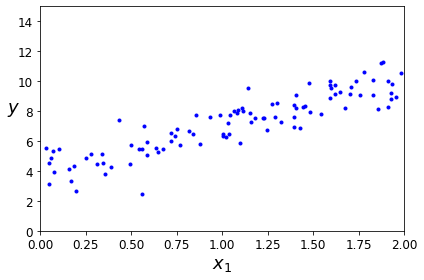

In [8]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig("generated_data_plot")
plt.show()

In [9]:
y.mean()

7.181800334561576

**식 4-4: 정규 방정식**

$\hat{\boldsymbol{\theta}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$

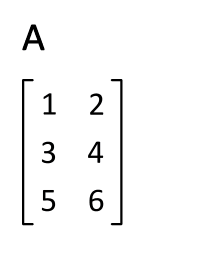

In [28]:
X_b = np.c_[np.ones((100, 1)), X]  # 모든 샘플에 x0 = 1을 추가합니다.
# 컬럼 2개를 옆으로 붙여라.
# np.c_[X, np.ones((100, 1))]나 np.c_[np.ones((100, 1)), X]나 똑같다.
# 다만 theta_best의 1행과 2행의 결과가 바꿔서 나올 뿐이다.

theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) # θ^=(X.TX)−1X.Ty
# 파이썬 numpy.linalg.inv() 함수는 주어진 행렬의 역을 계산

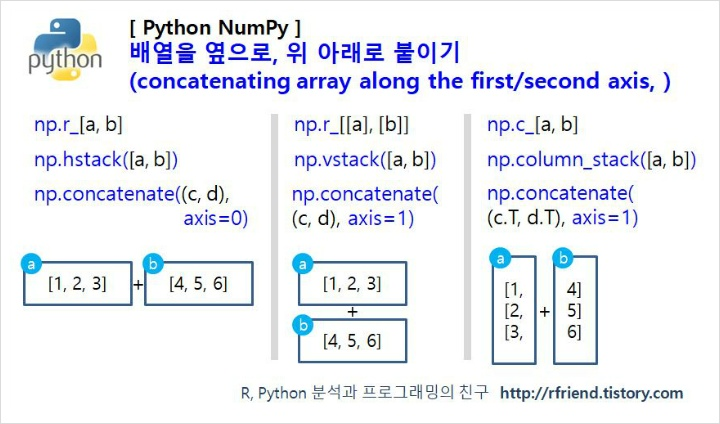

In [29]:
theta_best
# Y = X_bW이므로 [1,X]와 곱할 2행 1열의 theta_best에서
# 1행이 절편인 W0, 2행이 기울기인 W1이다.

'''
복잡하게 생각할 것 없이 위에서 그린 generated_data_plot을 봐라.
데이터 하나하나 마다 다 예측을 해야하기 때문에 각 데이터에
기울기를 곱하고 절편을 더하는 것이다.
또한 행렬곱, 내적은 아래와 같다.
절대로 계산 결과를 다 더해서 하나로 만든다고 생각말자.
'''

array([[3.86501051],
       [3.13916179]])

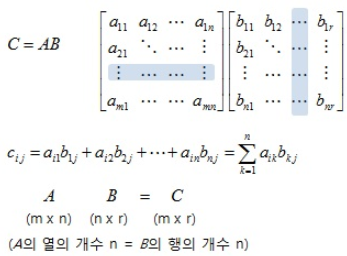

$\hat{y} = \mathbf{X} \boldsymbol{\hat{\theta}}$

In [37]:
X_new = np.array([[0], [2]]) # 데이터 2개 생성
X_new_b = np.c_[np.ones((2, 1)), X_new]  # 모든 샘플에 x0 = 1을 추가합니다.
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.86501051],
       [10.14333409]])

In [38]:
X_new_b

array([[1., 0.],
       [1., 2.]])

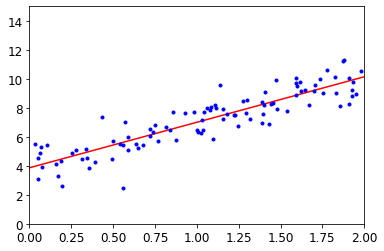

In [41]:
plt.plot(X_new, y_predict, "r-") # 직선
plt.plot(X, y, "b.") # 산포도
plt.axis([0, 2, 0, 15]) # x축은 0~2, y축은 0~15
plt.show()

책에 있는 그림은 범례와 축 레이블이 있는 그래프입니다:

그림 저장: linear_model_predictions_plot


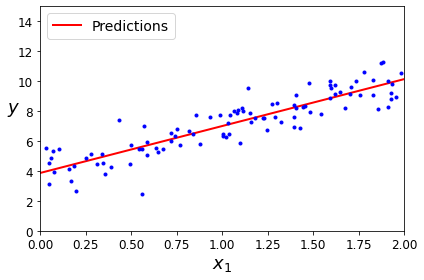

In [42]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
save_fig("linear_model_predictions_plot")
plt.show()

In [43]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.86501051]), array([[3.13916179]]))

In [45]:
lin_reg.predict(X_new)

array([[ 3.86501051],
       [10.14333409]])

`LinearRegression` 클래스는 `scipy.linalg.lstsq()` 함수("least squares"의 약자)를 사용하므로 이 함수를 직접 사용할 수 있습니다:

In [47]:
# 싸이파이 lstsq() 함수를 사용하려면 scipy.linalg.lstsq(X_b, y)와 같이 씁니다.
# https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.86501051],
       [3.13916179]])

이 함수는 $\mathbf{X}^+\mathbf{y}$을 계산합니다. $\mathbf{X}^{+}$는 $\mathbf{X}$의 _유사역행렬_ (pseudoinverse)입니다(Moore–Penrose 유사역행렬입니다). `np.linalg.pinv()`을 사용해서 유사역행렬을 직접 계산할 수 있습니다:

https://pasus.tistory.com/31
- 역행렬은 full rank인  정방 행렬(square matrix)에서만 정의된다. 정방 행렬이 아닌 다른 모양의 행렬에서는 역행렬 대신에 유사 역행렬(pseudo inverse matrix)을 정의할 수 있다.

$\boldsymbol{\hat{\theta}} = \mathbf{X}^{-1}\hat{y}$

In [48]:
np.linalg.pinv(X_b).dot(y)
# linalg 는 Linear Algebra(선형대수)를 의미, 그리고 p 는 psuedo 의 p 를 의미

array([[3.86501051],
       [3.13916179]])

# 배치 경사 하강법을 사용한 선형 회귀

**식 4-6: 비용 함수의 그레이디언트 벡터**

$
\dfrac{\partial}{\partial \boldsymbol{\theta}} \text{MSE}(\boldsymbol{\theta})
 = \dfrac{2}{m} \mathbf{X}^T (\mathbf{X} \boldsymbol{\theta} - \mathbf{y})
$

**식 4-7: 경사 하강법의 스텝**

$
\boldsymbol{\theta}^{(\text{next step})} = \boldsymbol{\theta} - \eta \dfrac{\partial}{\partial \boldsymbol{\theta}} \text{MSE}(\boldsymbol{\theta})
$


In [59]:
eta = 0.1  # 학습률
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # 랜덤 초기화

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [63]:
X_new_b.dot(theta)

array([[ 3.86501051],
       [10.14333409]])

In [69]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 1000:
            # 선은 < 숫자 만틈만 그린다.
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

그림 저장: gradient_descent_plot


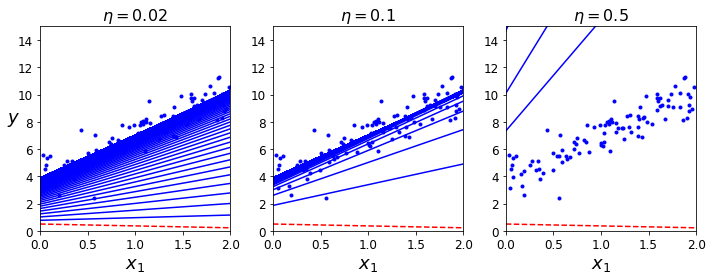

In [71]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

save_fig("gradient_descent_plot")
plt.show()

# 확률적 경사 하강법

In [72]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

그림 저장: sgd_plot


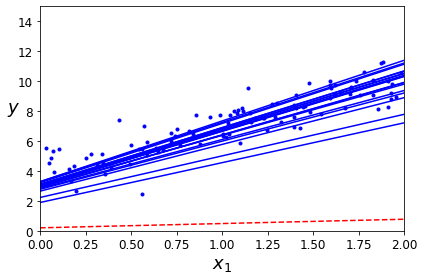

In [84]:
n_epochs = 50
t0, t1 = 5, 50  # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # 랜덤 초기화

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    # 책에는 없음
            y_predict = X_new_b.dot(theta)           # 책에는 없음
            style = "b-" if i > 0 else "r--"         # 책에는 없음
            plt.plot(X_new, y_predict, style)        # 책에는 없음
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        # xi = X_b[random_index]
        # yi = y[random_index]
        # 차원을 맞춰주려고 인덱싱이 아닌 슬라이싱으로 했다.
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 # 책에는 없음

plt.plot(X, y, "b.")                                 # 책에는 없음
plt.xlabel("$x_1$", fontsize=18)                     # 책에는 없음
plt.ylabel("$y$", rotation=0, fontsize=18)           # 책에는 없음
plt.axis([0, 2, 0, 15])                              # 책에는 없음
save_fig("sgd_plot")                                 # 책에는 없음
plt.show()                                           # 책에는 없음

In [79]:
theta

array([[3.86683388],
       [3.06223385]])

In [80]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
# max_iter : 반복 횟수(에폭 횟수), Gradient Descent 방식을 반복해서 몇번 수행할 것인가
# tol : 한 에폭에서 지정한 수보다 적게 손실이 줄어들 때까지 실행
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=42,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [81]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.86256592]), array([3.15101583]))

# 미니배치 경사 하강법

In [82]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # 랜덤 초기화

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [88]:
np.random.permutation(m)

array([35, 63, 61, 82, 26, 76, 36, 64, 11, 44, 74, 59, 67,  4, 32, 96, 95,
       98, 23, 27, 39, 55, 87, 78, 77, 22, 48, 62, 60, 34, 53, 83, 88, 89,
       80,  6, 40, 99, 57, 84, 81, 28, 54, 70, 16, 38, 46, 58, 51, 13,  5,
        3, 41, 30, 50, 72, 97, 29, 25, 92,  9, 79, 56, 17, 20, 66, 19, 91,
       10, 37, 18, 68, 45, 90,  7, 43, 52, 14, 12, 49, 47, 71,  0, 94, 15,
       31, 65,  1, 69, 21, 93, 42, 33, 73, 75, 86, 85,  8,  2, 24])

In [90]:
for i in range(0, m, minibatch_size):
  print(i)

0
20
40
60
80


In [91]:
theta

array([[3.90858135],
       [3.10376936]])

In [92]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

그림 저장: gradient_descent_paths_plot


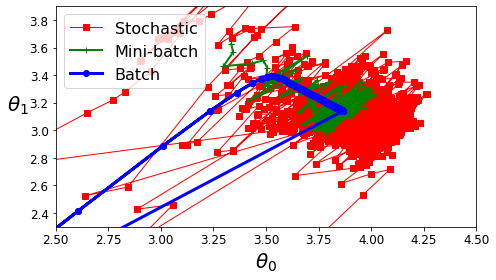

In [93]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
save_fig("gradient_descent_paths_plot")
plt.show()

# 다항 회귀

In [94]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)

In [101]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1) # 맨 뒷항이 노이즈다

그림 저장: quadratic_data_plot


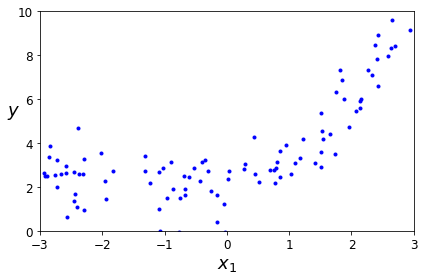

In [102]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
save_fig("quadratic_data_plot")
plt.show()

In [103]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.86416393])

In [104]:
X_poly[0]

array([-0.86416393,  0.74677929])

In [105]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.1163078]), array([[1.04512757, 0.48917003]]))

그림 저장: quadratic_predictions_plot


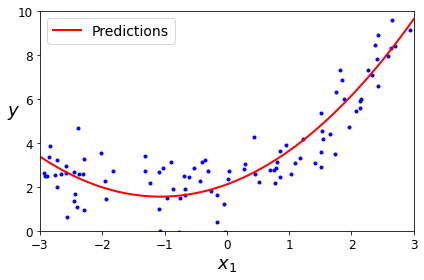

In [106]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
save_fig("quadratic_predictions_plot")
plt.show()

그림 저장: high_degree_polynomials_plot


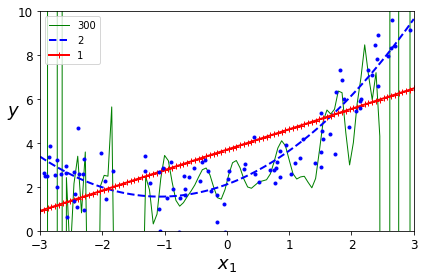

In [107]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
save_fig("high_degree_polynomials_plot")
plt.show()

In [111]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)): # 100개의 데이터에서 80개가 훈련이고 20개가 검증이다.
        model.fit(X_train[:m], y_train[:m]) # 데이터의 숫자가 for문 돌면서 점점 많아진다.
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # 책에는 없음
    plt.xlabel("Training set size", fontsize=14) # 책에는 없음
    plt.ylabel("RMSE", fontsize=14)              # 책에는 없음

그림 저장: underfitting_learning_curves_plot


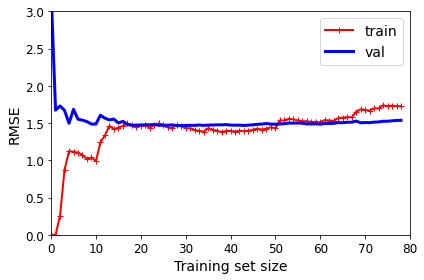

In [112]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         # 책에는 없음
save_fig("underfitting_learning_curves_plot")   # 책에는 없음
plt.show()                                      # 책에는 없음

그림 저장: learning_curves_plot


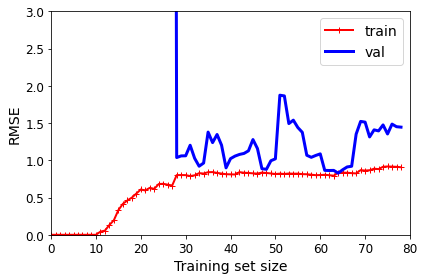

In [113]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           # 책에는 없음
save_fig("learning_curves_plot")  # 책에는 없음
plt.show()                        # 책에는 없음

# 규제가 있는 모델

In [114]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

**식 4-8: 릿지 회귀의 비용 함수**

$
J(\boldsymbol{\theta}) = \text{MSE}(\boldsymbol{\theta}) + \alpha \dfrac{1}{2}\sum\limits_{i=1}^{n}{\theta_i}^2
$

In [115]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [116]:
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.5507201]])

그림 저장: ridge_regression_plot


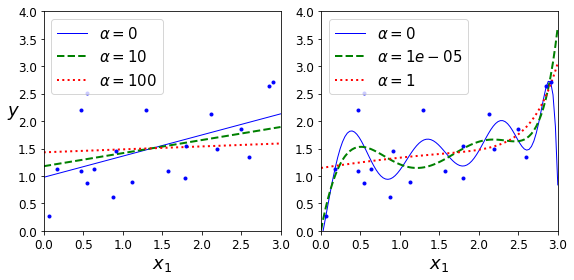

In [117]:
from sklearn.linear_model import Ridge

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

save_fig("ridge_regression_plot")
plt.show()

**노트**: 향후 버전이 바뀌더라도 동일한 결과를 만들기 위해 사이킷런 0.21 버전의 기본값인 `max_iter=1000`과 `tol=1e-3`으로 지정합니다.

In [118]:
sgd_reg = SGDRegressor(penalty="l2", max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.47012588])

**식 4-10: 라쏘 회귀의 비용 함수**

$
J(\boldsymbol{\theta}) = \text{MSE}(\boldsymbol{\theta}) + \alpha \sum\limits_{i=1}^{n}\left| \theta_i \right|
$

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.802867703827423, tolerance: 0.0009294783355207351
  positive)


그림 저장: lasso_regression_plot


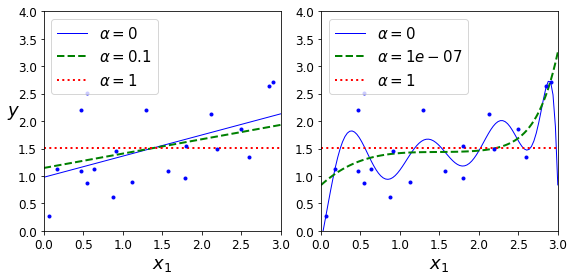

In [119]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)

save_fig("lasso_regression_plot")
plt.show()

In [120]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

**식 4-12: 엘라스틱넷 비용 함수**

$
J(\boldsymbol{\theta}) = \text{MSE}(\boldsymbol{\theta}) + r \alpha \sum\limits_{i=1}^{n}\left| \theta_i \right| + \dfrac{1 - r}{2} \alpha \sum\limits_{i=1}^{n}{{\theta_i}^2}
$

In [122]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

In [123]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

조기 종료 예제:

In [ ]:
from copy import deepcopy

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # 중지된 곳에서 다시 시작합니다
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

그래프를 그립니다:

그림 저장: early_stopping_plot


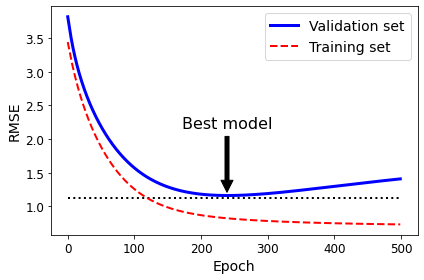

In [ ]:
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
save_fig("early_stopping_plot")
plt.show()

In [ ]:
best_epoch, best_model

(239,
 SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
              random_state=42, tol=-inf, warm_start=True))

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)
T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[1, 1], [1, -1], [1, 0.5]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1/len(Xr) * np.sum((T.dot(Xr.T) - yr.T)**2, axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(np.argmin(J), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

그림 저장: lasso_vs_ridge_plot


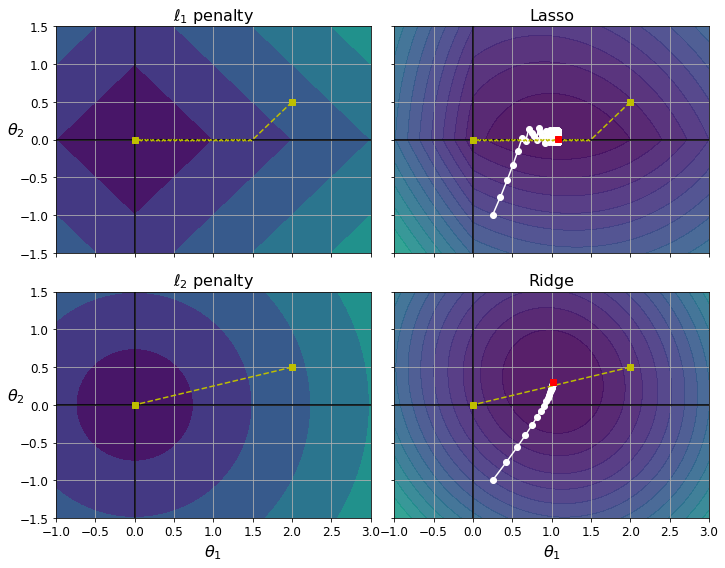

In [ ]:
def bgd_path(theta, X, y, l1, l2, core = 1, eta = 0.05, n_iterations = 200):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = core * 2/len(X) * X.T.dot(X.dot(theta) - y) + l1 * np.sign(theta) + l2 * theta
        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10.1, 8))
for i, N, l1, l2, title in ((0, N1, 2., 0, "Lasso"), (1, N2, 0,  2., "Ridge")):
    JR = J + l1 * N1 + l2 * 0.5 * N2**2
    
    tr_min_idx = np.unravel_index(np.argmin(JR), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levelsJ=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(J) - np.min(J)) + np.min(J)
    levelsJR=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(JR) - np.min(JR)) + np.min(JR)
    levelsN=np.linspace(0, np.max(N), 10)
    
    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(np.array([[2.0], [0.5]]), Xr, yr, np.sign(l1)/3, np.sign(l2), core=0)

    ax = axes[i, 0]
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.contourf(t1, t2, N / 2., levels=levelsN)
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.set_title(r"$\ell_{}$ penalty".format(i + 1), fontsize=16)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$", fontsize=16)
    ax.set_ylabel(r"$\theta_2$", fontsize=16, rotation=0)

    ax = axes[i, 1]
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    ax.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.plot(t1r_min, t2r_min, "rs")
    ax.set_title(title, fontsize=16)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$", fontsize=16)

save_fig("lasso_vs_ridge_plot")
plt.show()

# 로지스틱 회귀

그림 저장: logistic_function_plot


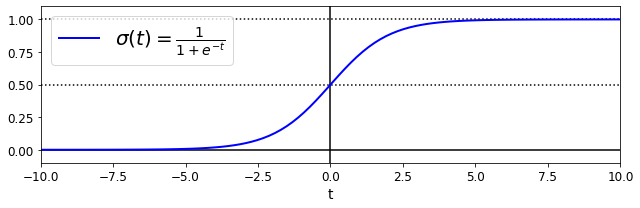

In [ ]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
save_fig("logistic_function_plot")
plt.show()

**식 4-16: 하나의 훈련 샘플에 대한 비용 함수**

$
c(\boldsymbol{\theta}) =
\begin{cases}
  -\log(\hat{p}) & \text{if } y = 1, \\
  -\log(1 - \hat{p}) & \text{if } y = 0.
\end{cases}
$


**식 4-17: 로지스틱 회귀 비용 함수(로그 손실)**

$
J(\boldsymbol{\theta}) = -\dfrac{1}{m} \sum\limits_{i=1}^{m}{\left[ y^{(i)} log\left(\hat{p}^{(i)}\right) + (1 - y^{(i)}) log\left(1 - \hat{p}^{(i)}\right)\right]}
$


**식 4-18: 로지스틱 비용 함수의 편도 함수**

$
\dfrac{\partial}{\partial \theta_j} \text{J}(\boldsymbol{\theta}) = \dfrac{1}{m}\sum\limits_{i=1}^{m}\left(\mathbf{\sigma(\boldsymbol{\theta}}^T \mathbf{x}^{(i)}) - y^{(i)}\right)\, x_j^{(i)}
$

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [ ]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
X = iris["data"][:, 3:]  # 꽃잎 너비
y = (iris["target"] == 2).astype(np.int)  # Iris virginica이면 1 아니면 0

**노트**: 향후 버전이 바뀌더라도 동일한 결과를 만들기 위해 사이킷런 0.22 버전의 기본값인 `solver="lbfgs"`로 지정합니다.

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)

LogisticRegression(random_state=42)

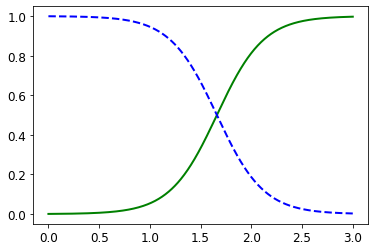

In [ ]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")

책에 실린 그림은 조금 더 예쁘게 꾸몄습니다:

/usr/local/lib/python3.8/dist-packages/matplotlib/patches.py:1338: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  verts = np.dot(coords, M) + (x + dx, y + dy)


그림 저장: logistic_regression_plot


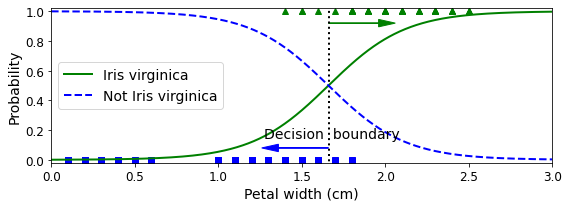

In [ ]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
save_fig("logistic_regression_plot")
plt.show()

In [ ]:
decision_boundary

array([1.66066066])

In [ ]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

그림 저장: logistic_regression_contour_plot


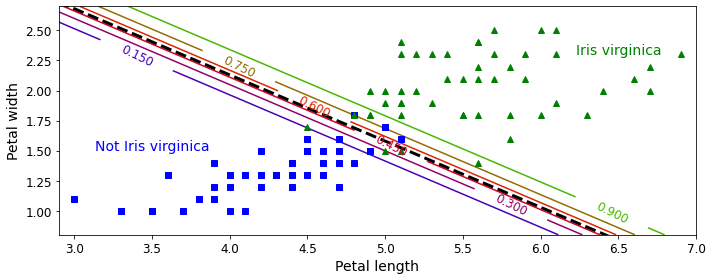

In [ ]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
save_fig("logistic_regression_contour_plot")
plt.show()

**식 4-20: 소프트맥스 함수**

$
\hat{p}_k = \sigma\left(\mathbf{s}(\mathbf{x})\right)_k = \dfrac{\exp\left(s_k(\mathbf{x})\right)}{\sum\limits_{j=1}^{K}{\exp\left(s_j(\mathbf{x})\right)}}
$

**식 4-22: 크로스 엔트로피 비용 함수**

$
J(\boldsymbol{\Theta}) = - \dfrac{1}{m}\sum\limits_{i=1}^{m}\sum\limits_{k=1}^{K}{y_k^{(i)}\log\left(\hat{p}_k^{(i)}\right)}
$

**식 4-23: 클래스 k에 대한 크로스 엔트로피의 그레이디언트 벡터**

$
\nabla_{\boldsymbol{\theta}^{(k)}} \, J(\boldsymbol{\Theta}) = \dfrac{1}{m} \sum\limits_{i=1}^{m}{ \left ( \hat{p}^{(i)}_k - y_k^{(i)} \right ) \mathbf{x}^{(i)}}
$

In [ ]:
X = iris["data"][:, (2, 3)]  # 꽃잎 길이, 꽃잎 너비
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

그림 저장: softmax_regression_contour_plot


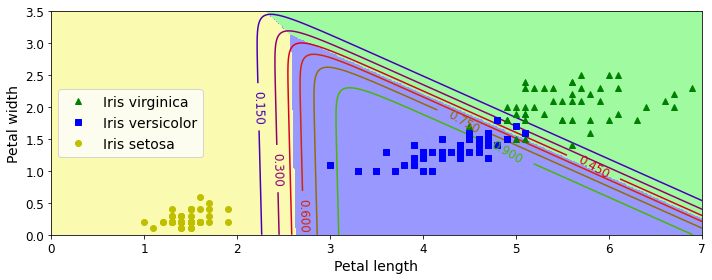

In [ ]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
save_fig("softmax_regression_contour_plot")
plt.show()

In [ ]:
softmax_reg.predict([[5, 2]])

array([2])

In [ ]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

# 연습문제 해답

## 1. to 11.

부록 A를 참고하세요.

## 12. 조기 종료를 사용한 배치 경사 하강법으로 소프트맥스 회귀 구현하기
(사이킷런을 사용하지 않고)

먼저 데이터를 로드합니다. 앞서 사용했던 Iris 데이터셋을 재사용하겠습니다.

In [ ]:
X = iris["data"][:, (2, 3)]  # 꽃잎 길이, 꽃잎 넓이
y = iris["target"]

모든 샘플에 편향을 추가합니다 ($x_0 = 1$):

In [ ]:
X_with_bias = np.c_[np.ones([len(X), 1]), X]

결과를 일정하게 유지하기 위해 랜덤 시드를 지정합니다:

In [ ]:
np.random.seed(2042)

데이터셋을 훈련 세트, 검증 세트, 테스트 세트로 나누는 가장 쉬운 방법은 사이킷런의 `train_test_split()` 함수를 사용하는 것입니다. 하지만 이 연습문제의 목적은 직접 만들어 보면서 알고리즘을 이해하는 것이므로 다음과 같이 수동으로 나누어 보겠습니다:

In [ ]:
test_ratio = 0.2
validation_ratio = 0.2
total_size = len(X_with_bias)

test_size = int(total_size * test_ratio)
validation_size = int(total_size * validation_ratio)
train_size = total_size - test_size - validation_size

rnd_indices = np.random.permutation(total_size)

X_train = X_with_bias[rnd_indices[:train_size]]
y_train = y[rnd_indices[:train_size]]
X_valid = X_with_bias[rnd_indices[train_size:-test_size]]
y_valid = y[rnd_indices[train_size:-test_size]]
X_test = X_with_bias[rnd_indices[-test_size:]]
y_test = y[rnd_indices[-test_size:]]

타깃은 클래스 인덱스(0, 1 그리고 2)이지만 소프트맥스 회귀 모델을 훈련시키기 위해 필요한 것은 타깃 클래스의 확률입니다. 각 샘플에서 확률이 1인 타깃 클래스를 제외한 다른 클래스의 확률은 0입니다(다른 말로하면 주어진 샘플에 대한 클래스 확률이 원-핫 벡터입니다). 클래스 인덱스를 원-핫 벡터로 바꾸는 간단한 함수를 작성하겠습니다:

In [ ]:
def to_one_hot(y):
    n_classes = y.max() + 1
    m = len(y)
    Y_one_hot = np.zeros((m, n_classes))
    Y_one_hot[np.arange(m), y] = 1
    return Y_one_hot

10개 샘플만 넣어 이 함수를 테스트해 보죠:

In [ ]:
y_train[:10]

array([0, 1, 2, 1, 1, 0, 1, 1, 1, 0])

In [ ]:
to_one_hot(y_train[:10])

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

잘 되네요, 이제 훈련 세트와 테스트 세트의 타깃 클래스 확률을 담은 행렬을 만들겠습니다:

In [ ]:
Y_train_one_hot = to_one_hot(y_train)
Y_valid_one_hot = to_one_hot(y_valid)
Y_test_one_hot = to_one_hot(y_test)

이제 소프트맥스 함수를 만듭니다. 다음 공식을 참고하세요:

$\sigma\left(\mathbf{s}(\mathbf{x})\right)_k = \dfrac{\exp\left(s_k(\mathbf{x})\right)}{\sum\limits_{j=1}^{K}{\exp\left(s_j(\mathbf{x})\right)}}$

In [ ]:
def softmax(logits):
    exps = np.exp(logits)
    exp_sums = np.sum(exps, axis=1, keepdims=True)
    return exps / exp_sums

훈련을 위한 준비를 거의 마쳤습니다. 입력과 출력의 개수를 정의합니다:

In [ ]:
n_inputs = X_train.shape[1] # == 3 (특성 2개와 편향)
n_outputs = len(np.unique(y_train))   # == 3 (3개의 붓꽃 클래스)

이제 좀 복잡한 훈련 파트입니다! 이론적으로는 간단합니다. 그냥 수학 공식을 파이썬 코드로 바꾸기만 하면 됩니다. 하지만 실제로는 꽤 까다로운 면이 있습니다. 특히, 항이나 인덱스의 순서가 뒤섞이기 쉽습니다. 제대로 작동할 것처럼 코드를 작성했더라도 실제 제대로 계산하지 못합니다. 확실하지 않을 때는 각 항의 크기를 기록하고 이에 상응하는 코드가 같은 크기를 만드는지 확인합니다. 각 항을 독립적으로 평가해서 출력해 보는 것도 좋습니다. 사실 사이킷런에 이미 잘 구현되어 있기 때문에 이렇게 할 필요는 없습니다. 하지만 직접 만들어 보면 어떻게 작동하는지 이해하는데 도움이 됩니다.

구현할 공식은 비용함수입니다:

$J(\mathbf{\Theta}) =
- \dfrac{1}{m}\sum\limits_{i=1}^{m}\sum\limits_{k=1}^{K}{y_k^{(i)}\log\left(\hat{p}_k^{(i)}\right)}$

그리고 그레이디언트 공식입니다:

$\nabla_{\mathbf{\theta}^{(k)}} \, J(\mathbf{\Theta}) = \dfrac{1}{m} \sum\limits_{i=1}^{m}{ \left ( \hat{p}^{(i)}_k - y_k^{(i)} \right ) \mathbf{x}^{(i)}}$

$\hat{p}_k^{(i)} = 0$이면 $\log\left(\hat{p}_k^{(i)}\right)$를 계산할 수 없습니다. `nan` 값을 피하기 위해 $\log\left(\hat{p}_k^{(i)}\right)$에 아주 작은 값 $\epsilon$을 추가하겠습니다.

In [ ]:
eta = 0.01
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    if iteration % 500 == 0:
        loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
        print(iteration, loss)
    error = Y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error)
    Theta = Theta - eta * gradients

0 5.446205811872683
500 0.8350062641405651
1000 0.6878801447192402
1500 0.6012379137693314
2000 0.5444496861981872
2500 0.5038530181431525
3000 0.4729228972192248
3500 0.44824244188957774
4000 0.4278651093928793
4500 0.4106007142918715
5000 0.3956780375390374


바로 이겁니다! 소프트맥스 모델을 훈련시켰습니다. 모델 파라미터를 확인해 보겠습니다:

In [ ]:
Theta

array([[ 3.32094157, -0.6501102 , -2.99979416],
       [-1.1718465 ,  0.11706172,  0.10507543],
       [-0.70224261, -0.09527802,  1.4786383 ]])

검증 세트에 대한 예측과 정확도를 확인해 보겠습니다:

In [ ]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

0.9666666666666667

와우, 이 모델이 매우 잘 작동하는 것 같습니다. 연습을 위해서 $\ell_2$ 규제를 조금 추가해 보겠습니다. 다음 코드는 위와 거의 동일하지만 손실에 $\ell_2$ 페널티가 추가되었고 그래디언트에도 항이 추가되었습니다(`Theta`의 첫 번째 원소는 편향이므로 규제하지 않습니다). 학습률 `eta`도 증가시켜 보겠습니다.

In [ ]:
eta = 0.1
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1  # 규제 하이퍼파라미터

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    if iteration % 500 == 0:
        xentropy_loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
        l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
        loss = xentropy_loss + alpha * l2_loss
        print(iteration, loss)
    error = Y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

0 6.629842469083912
500 0.5339667976629506
1000 0.503640075014894
1500 0.4946891059460321
2000 0.49129684180754774
2500 0.489899247009333
3000 0.4892990598451198
3500 0.48903512443978603
4000 0.4889173621830818
4500 0.4888643337449303
5000 0.4888403120738818


추가된 $\ell_2$ 페널티 때문에 이전보다 손실이 조금 커보이지만 더 잘 작동하는 모델이 되었을까요? 확인해 보죠:

In [ ]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

1.0

와우, 완벽한 정확도네요! 운이 좋은 검증 세트일지 모르지만 잘 된 것은 맞습니다.

이제 조기 종료를 추가해 보죠. 이렇게 하려면 매 반복에서 검증 세트에 대한 손실을 계산해서 오차가 증가하기 시작할 때 멈춰야 합니다.

In [ ]:
eta = 0.1 
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1  # 규제 하이퍼파라미터
best_loss = np.infty

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    error = Y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

    logits = X_valid.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_valid_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    if iteration % 500 == 0:
        print(iteration, loss)
    if loss < best_loss:
        best_loss = loss
    else:
        print(iteration - 1, best_loss)
        print(iteration, loss, "조기 종료!")
        break

0 4.7096017363419875
500 0.5739711987633518
1000 0.5435638529109128
1500 0.5355752782580261
2000 0.5331959249285544
2500 0.5325946767399383
2765 0.5325460966791897
2766 0.5325460971327975 조기 종료!


In [ ]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

1.0

여전히 완벽하지만 더 빠릅니다.

이제 전체 데이터셋에 대한 모델의 예측을 그래프로 나타내 보겠습니다:

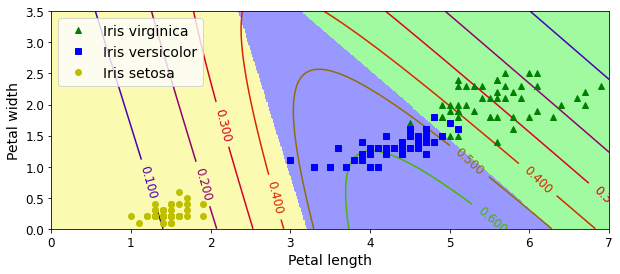

In [ ]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
X_new_with_bias = np.c_[np.ones([len(X_new), 1]), X_new]

logits = X_new_with_bias.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

zz1 = Y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

이제 테스트 세트에 대한 모델의 최종 정확도를 측정해 보겠습니다:

In [ ]:
logits = X_test.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_test)
accuracy_score

0.9333333333333333

완벽했던 최종 모델의 성능이 조금 떨어졌습니다. 이런 차이는 데이터셋이 작기 때문일 것입니다. 훈련 세트와 검증 세트, 테스트 세트를 어떻게 샘플링했는지에 따라 매우 다른 결과를 얻을 수 있습니다. 몇 번 랜덤 시드를 바꾸고 이 코드를 다시 실행해 보면 결과가 달라지는 것을 확인할 수 있습니다.

/bin/bash: -c: line 0: syntax error near unexpected token `data:image/gif'
/bin/bash: -c: line 0: `[Matrix_transpose.gif]()'

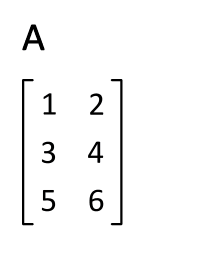

In [121]:
![Matrix_transpose.gif](data:image/gif;base64,R0lGODlh0gAOAdU/AP///5GSkn9/f9PT1bu7uwAA/zAwMEFBQb6+/wAAAD8//35+/9DQ8pfc/x8fHzk5VeHh4Tk5qqqqympqv5eX/1dY/7Tl/9/f//f8/5yc1O7u79vy/3/U/wcHB2ej/1eCmDhe/zhabKKio/b29lZWxvn9//z+/x8f//z8/P7+/lB2/wMDNy0w/yE1P1paWgMDbQMDp25uce/v/3+B1AIC4Csr2Xunx8bGyLbG3QAAFlpy0AwNDRISEoTA4A8P/////yH/C05FVFNDQVBFMi4wAwEAAAAh+QQFyAA/ACwAAAAA0gAOAQAG/0CAcEgsGo/IpHLJbDqf0Kh0Sq1ar9isdsvter/gsHhMLpvP6LR6zW673/C4fE6v2+/4vH7P7/v/gIGCg4SFhoeIiYqLjI2Oj5CRkpOUlZaXmJmam5ydnp+goaKjpFUEAqgEpasAEAmvCTwarKQBsK8itKMOtwkHuqEDva8QwJ8xsC6wAcaePK8Gwq8OzZwEywC8rwPVmsqvs7avMd2YGslCrq885ZcisLlCBrCq7ZQHsLNC768u9pPqEvgbci7fv0jiEtQb8i1BvIOOtLErcg0aREfSBB55Ruwio4YGDogceYBjAgEeF5kcNoxaSkQVWcrk9tJQQxeocurE169mof+CsZTEnOhTED+NSkwuLPpn3qulR5D1ZPonINEkGRPoo8on4cAl2hxy7dMQKhIBsFCO3aOBAIFiTtwS2Lq2rt27ePPq3cu3r9+/gAMLHky4sOHDiBMrXsy4sePHkCNLnky5suXLmDNr3oy5IcuHiTQ4ZbmDpjGZsMgtgrAD9clqrwLInW0WEQTacuepPa3wE77dwJ76ft1MuKffsHsfJ867NibkxZV3gt58OHBdxqczDy6dE3Xuzi99x95903ha2anccOHiRhoIIgTECHADBZXzrNJH0SA1ATMzBPB0iwHuSYHfKvo9QUBY/gF4Cw8dwNJBgVAcWEqCTGjwjQPf/Ef/BloGiDDLCCK05ouB25EXXhLvdBCDBvx4OMYNAdhHxFFwPWEhKRguIcIBNMXoBgomrnjEjqP0+ISQbmhjpBFIiqKkE0yykYKJpjkRZShTNlHlGtLwYKOOKaJXnhRfqiGVahWWmd+ZUaSJBgQRdpAjmdeZ+aSPsbGBAk95NrElKF0yIacZaPkyZpuBIggnFIeSwY8DdzKa3J5KRCoGARGWVsWgnxTKZ4No3NDaDhROAaonomba5xkDPNMBpkms2kmrLL5aRqwJzIqFrZzgioSmXUCgDWifuukorUNAQJJTDozUqBY8ccjetey9aGl0zO7j2olhMChTqkwAu4mwQmig/9O6qYghAEnwjkRXucpe+Kh49fJ4ryXmaoKuI/1m8m8jAWMyMCMFX3LwIglbsrAiDVfycCIRUzIxIhVPcvEhGUuysSEdR/JxISFDMjIhJT9y8iApO7KyIC038nIgMTMyMyA1L3LzHzkrsrMfPSfycx9BIzI0H0UfcvQeSRuytB5NF/J0HlETMjUeVQ9y9R1ZC3JwCgO4dcMIbQwgggg3pKBqvknuiwQEMazUgQvzlnHDLVnieWkUvLJEKRoojJZA3lqyLaXbRqDlQAAQoKBBACZ+VQY/PBEuqOFcIk6RAGTf+MoOi4qhwTMxSGU5vdPq2y0SRIJjBjKymL526m2vjv8ER3V/IU0usqNI++G2G6GOS2OkgI8B9vUeRdeBXJzCN79nwU+Bym9bXRVgf3NA56Lz8lX1enOrqgMOmOgA52XAvhX4hUdPqOZGrJTADgcED8UAEcrI/uXuhwp/ETc4W3xGwyYwHG9R+0Pd3q6QAhFESCxg4AdUErgE5gHiY4kyQBjm4QABChBQZ1se5t5nvyIEhHtdMNG3ElCpCo7QfyUkAlByl4WS8OCGOITQ53jgABQqUHxZuFss1IYGCirBgn8QFgoE0MI/TaWI25jdAp1wjrnNxXEEcMoOWkgGI9bqhaz6HwBQIK4HxZAKXkQCEv2ALnWJiwcx4OLkDGAAGrr/sH9hDJ4GbuCWAYQOZ2C8lRgfscY+bM0OheTDIeuQyD0skg6N1MMj5xDJPExSDpXEwyXjkMk7bBIOnbTDJ98QyjqM0g2lpMMp25DKOaySDa2UwyvXEMs4zFINtYTDLdOQyzfsEg29dMMvzxDMNgzTDMVkwzHLkMw1LJMMzVTDM8cQzTRMUwzVRMM1w5DNM2zTgIEM1iABFs5zjXOMKEinOtNJxDOATWx2PGI5/TVIMqLmF2bgj/wOEM8jzVNggxyBazRYBgKYZAcqJNcPr/cEgQokABCNqGx2ZaI4posAFrUeeKLgUBkBbh6++tU/DRZQXaWBH3iUZ0rF2a2OwrJX//0MH0Od4FI1jCBCkrtCN82ArpqmQYgr/WJQ6dlSaBwgJDg5XRf4IQIIvMsADjBADBTKvynS9J5y3II4BHcLAbSzfVZ1gnwEANEYjKaO7pKQCwJwtoYga6EbxcINtFFALySKbkWY1FfhqiItVMQBf9xCot4KAKdk1Z9DBegZhZAC3IVBHIT9BrN2WoaRGTYMKI2KsChLhpFpI6ZVkEZOhfANpSI2rKG1SBhaJ6Yi2BN0Gu3r/Y4wAqd41AsdKkKi6spXPUHhHAYIwABGgAL4OMUAPvSCNDoQgFk4dR2HPS0QqTjQ6GohIb2CBQ+oekfULiFAKoRGjc4gAsHNzbrSnbHpE1AQNgLcALReSMFt3JtcmcZVO4kl6WJBNlKFnRNh/XXYfxkWYIkNGGIFttiBKZZgjS0YYw322IM5FmGRTZi/+fXvfklWYZNdmMMZFjBqCPsTrvYixJUw8S14awjWuGbDkmgLbuTiiPnO2LScybGOd8zjHvv4x0AOspCHTOQiG/nISE6ykpfM5CY7+clQjrKUp0zlKlv5yljOspa3zOUue/nLYA6zmMdM5jKb+cxcCQIAIfkEBQUAPwAsCgBDAJ8AnwAABv/Azcb0KxqPyKRyyWw6n9CodEo1CofVrHbL7XqXpivxSy6bz9mwcIxuu99lNRZOr9ufcvZ9z6fn+4CBZ3+ChYZpYoeKi06EjI+QjpCTh5KUl4BhAg+cnZ4CEqGio6SlpqeoqaqqLp6uD5hFJq+uP6u3uLm6pSK0niKxP5wiOAPGxwMaysvMzc7P0NHS09Q/yMitwLGcOGvBcDEP2picA4nfbeHjl+WW6F/qweU/7u9c8dsPA7Ln9l745PQZqeePCkB2Agf2K5jlIKV5RwgyfOJwEsSICydGqQjpIkZvGqVwfOTx45yQFMXJS6hEIkojIxmVROLyZcxFM2lmfHnkpqL/nDpB8kTi8xDQoCeHFilq6ChSpT1V5tsXpWZBpoWcJrFqD6sgrVt3avQaCGxYoSjJAjJ7dsNQtX3Yng3AEy4fuWHp2pQakKoWE3rT8kXo14sef3b34HWStOvghyy9oH2X+M7iJmJjVbZzmQlXRpvrdH7SWPNji5HJGJiMKTSd0YxZU3INB3aTz4Vov7F9OzPo0x1Tm8ENSLcb3o18HzLeBnly2YqYo3H+vHR04CSFtyFuR/oZ6niUF8cuU7sb7uDI4zR/Xvwe72bAV3XfXf1P9m/Qo4FfRr4U/WbwR4Z//9H3hoBfEFggdPWtA1lhmRi4n31G4WcHgF0g6IWCVGC4/4WGXXDYoYRkgMiFiCMymA6FTVnIh4cGsZiViy+SeI+MX9FYo4plmLgFin/Z2BCOZenYB4wpOYgahI8g2YSPWgDJhZNLQJmFlFMKuRGRaxkpCJVEcRmXl19q6YSVVWBpmJlMoEmFmmvyGKOSwTEZixwBinkXmZUIYUCPeirGZyWBwROoZYMyYt2cK9n5DgNynnkoZ4kqgueNdGbn6DtqZDipaJUuEoanmZa3KVRJNoqqFm5OAWdrn74W6iTdLFplrLXNOomErUrxah2f9RrFr8DSJywUxBYr57FPJKusrUvhupuumLjErBPOXujbtU1kqy103DLh7bfWhbvEuOQe9v+DuUqgm26Ypa536qqSsJuEu3c4Yi8S+OZ7zr5H9OuvNwAbIfDAQxRcxMEIKywMtRqp4TDDe4QxMcQhmRBOAOpquuqQAUDb4rwfK7FxpF2SXDK8bE6r8sowiQPmgBiHFM/MG9Y8llQ4n6jzRAD1HOXPDB0kdJpEX/XY0a4mjdhpTA/rtGN0Rt3s1JRhZ3W3WKMT09bndv3NTWDfK3YwPpUd8NmmxcsPyv2xDavbb4v8ndyXYKU2xXx4VTbf7xEJNuB3qLU14Q1WYTXiddgVNeN0JMY05OnR7VnLXL8M87qTCk35gZ/2/LkbruE8+oqWhwc3snjPJi2Yp0+YOhRUxn6IBnNO2p7n7POtHrbmMHsHo+6A8r6g3ZlvvqXxx3csNfArCwgg8SVKC4aW1BvKfIrI89v6JCByl/0/1ve2+vikIux8u99DAuVn6GO6I/K+dALKLvjnr38ordS/fZZy6p8vbLG/AhoQFb2o3wNuEKENlOAJI7jGNahBwQpa8ILQsIYEjVEIEzwwCAAh+QQFBQA/ACwKAEMAnwCfAAAG/8CfpfQrGo/IpHLJbDqf0Kh0SjVarsSqdsvter/K0nUILpvP6K0Ym2673+g1GU6v25/y7H3Pr+f7gIFxY3qChodUf4iLjE2KjZCRj5GUiJOVmIBiOhGdnp8koaKjpKWmp6ipqqufrZ0MmT8lrq6rtre4uaa0nxmxP502PQzExcbHyMnKy8zNzs/FJBG+sZ09bL9vE9O/r4TZbtvUma+X4GDi3RGw5udd6dXrRe3uWvDk8vPf9V73mK9H6PGL4q8SwID7BlYpSOkgQmwKpzCM5PDhnIgEucWDFSYhRicTIVVEIvCjkZCNRpL0aDIJSkYqV0JsieTlopgyL9I8qREfR/8nJSPaRIQziZydR4YeKmqUpUmlhpg2nfm05798UoK6gypIakeqQq0axDrlaEuugbwuWfPhrNiGZBNZaFt13NWfWgphRAtILRQBere+pRiXywedgu2OxdvlMGJwfPv4heL0V2Q+k/FUznR5T2YoLQ4H5jxYZOEvLcBi6nznc5TNkVjbcQ1FKyLZdWjXhs0INx3du1U38g0HePDHw0unPH3GNiDib4xHcc4Huhvp03kHst4Ge3bhgrin8f4deXjlMJm7oU5HPBryWbXfcX8Gfnzwe+ibsX/ffH70N6lHB3tp6FcGf2XJpw2ARAnoh4JtGAgGgnLht6BicDEWCIHoMLj/lIN3cNiPh1GBGCKEZUj4BYVqoPiFil6w2KKFZsDYhYwz+neGjVzgmONoaPC4hY8/tkdiVyZu6OJCR6aVpJI0ciGkFkR2ISIUU1ZRpZVLZoQhYRpWcmUTWVKxpRdjLlHmFGei2SWZTfb15CJy3FBjnJLNSecVLdz5pWlh/gKklHhipickIejopTqBgoNDlHD+uVyj2ZhFqKTpUVrpFSG8U6hnh0piQaeXMopUqRudusWaUrRZxw5MYhqgpvxco2hNn7YWaiwoshqFqwNC6CsUwAYb5bBPFGvsrcg6oeyygxbRbBPPQhupqapaNOi0TFT7oHDcLuHtt8iFq8S45AZm/24S6KaLq6wN0orUJOsi0a4dj9R7xL347qOvEfz2y8a/RQQs8BAEA7NrS3IkbPCJFkgD74fyZmuEGBJja/F00swQbbwbSxTBDLciWXHIP2xDcslynhyyOG/+tjBS4qTZ3cw7pWPzezjTBM/O+/Xs1jhATyh0XdpmivKiSYO89BMMFd3j0R9NJDWVVO9V2tVmZh2WpFy36rVCL4VN7NgD2WS2s2jzM9Ta3bZdj1Jwnyt3YuV9XN/d53BV9758Q9bk3wUHng1fhD9cHZ5/K/7fxFOxPKThln0Kt+Pz5bo25nbIZjbndeAWNuhGQu5IzHG7vDFxV5MOB3RSu36hGUXLHn9Orl9JTi3lsYi3s+0R4r4W6oWrbjF9aQJfoPBMjKl8kMw3H/PzO0YvPaT28k6a6UV2bXy2MBJIvZ8H6w3496rySN34KVp/nPkKo3/qlLbx4oku+Oev/yj2d8I9GFqRRv/2R8ACqqJ/EcCBJq6AgSfIABoQjKAEJ0hBQZSggUEAACH5BAUFAD8ALAoAQwCfAJ8AAAb/QEsD8ysaj8ikcslsOp/QqHRKNTY4w6p2y+16v0vMNQsum89orRhLTLvf8POaHK/b7855G8/v2/V+gYJogIOGh2pje4iMjWGKjpGSRYWTloeVl5p+YiAFn6ChoqOkpaanqKmqpD6bPxirsbKztLUFC66fKh4Ivb6/wMHCw8TFxsfIviy3uQUebK5xCsybnwiQ0W7TuNUFCJnZZdvNCK/Y4eLUmtaU5+he493l7dDv8OqX7Ebg9lTx696Q8OsX5V++gALdESyIz5K+hPUWMuQGcF6SgRKVGHSIUAnGjEc2TnroUSFIJCIlkSwZ8STKhiM7MvmYMWWklY9auvxh0xHO/5wNdoaEqVJmHpM1id40elRnUooHLUah+a5no59N6TwllwiLS6uMsD5Z81WpT6ZSxJSFylFqFQwfToJFJJbKh0VVzV5Fu0UrurmH6lJxGg2wIcFTkG4yPAhxWsWXGAtyXMXvYr1h+XohbElyIMpUIEfy7Af0FKqMSPcxfVp0asx0NX9BbUg1H9ZUaAuyjQd3bteDeN/x/ZvzIeF2iBe3jAh5HeXL8TaHHVg2IeB8nMeB/hb7He1wuHc33gf8G/Hjmfsx7wZ9eunrqR+2Dkf3G/Zp3HdV/11+Y/px2IcGfmjot4WAZhB4hoEHeneGgmYw2CB52vg3GYB3IHgPWzG5hf+Jg19AWIaEXWi4hYhgkFgiiFyg+IWKK1IIhotewBgjf+lwWJSHjpgoBY1d2OiFj1AAyYWQQ7L4o4WfYWgIkU0YuQWSsyn5hJRaUFmljP4wWZqTiECZBJZVaAnGHA96uRqYjJCVoJq3sdlmXG/quBSP6OA4EVcL9cBllHD2JmePY2zI50JuthjocINGolYXZFJhJhwtQLpoco0KxdOlz2UqVKRTTGrHn0WAKoWodThoahSoBujdqlC06iqXsD4h66x6bmrnWXieRFWtTtxaB03ANiHssJAVy8SxyHKm7BLMNsvcs0pEK6101CZh7bUv7bpXr5rSo1W2SGz7xznkHmH/7rn1pGvEuuxm4W4R8MaLwbw/1Bsvvvqyu4y3mYEbbkn/HjrwVMuoAB+vB3cJQq7/CdzwSyCQuqbEExuxjZWdYpyxrmLm5+lO44S84MhribvwhR5n/I/JKaIsFz4w1ygzSBvVfOTNW0EE8XY8S5SSzmUGvZBNRIdqNEE9Jc3q0v1Y5bStUNsD1tTGVp0XwOZYHHPLEwOGdbVa/yXf2OWWHQ5jaL+rdjaStZ3v24Ux2Xa/eJCGNt79cc3Sz1PS7YptWPNtB29TG16HcE4rLs2lSTsOh3NES34fp10DHqvgl/kNRc2WV+j55xxry7km7Jkcehr4hbz6gJj7vPLTYDesViCUr6c5enQ7136wiD7mXieusy97emSxz6Sk8DnaK+nxnSXfhIDMzyj99A5WH+L12P+pvaF80GbL+OSXv8ruZwK3jPnst1++71tGkcz89Ndvv/1PFhEEACH5BAWWAD8ALAAAAAABAAEAAAYDwF8QACH5BAUFAD8ALBUATwBmAJMAAAb/wJ9wSCwaj8ikcslsJlkyp3RKrVqFiKt2y20WftmueMz9hsnotBesbruN5rfcHZ/byfW7fpvf+6l9f4JMgYOGR4WHikKJi4eNjoOQkX+TlHuWl3eZmnOcnW+foG2io2mlpnhsqZWrrJiur5uxsp60taG3uKS6u6e9vqpnwbzDxL/Gx8LKxcxqqM6EwNFWJ9TX2Nna29zd3t/g4eLj5OXm5+jp6uvs7e7v8PHeGgQBASIDKesDLh1ECQZupLvh70cHBzyGdBCYzoCIEQBS3HAgxAC6GyJQFBkgJIGGdwAo/uD4zuLIdxr87dAYL0a7EQQOvNvRIcGQANEYCNFZReQQ/4AZmYUBYGUAgaMBZApxMULZ0C4ACOwQIsCpEKJiRAjZ0ZTYUzFdT3q9OgZAQZLBvnYh2SGsL7VOXCpROvYH1ioiIHRV2gFtWrJS9CWZKhQwFZNDdriIBpdd43WP1UVONxld5XOXzWUut5lc53GfxYUONxpc6W+nvaXutppb622vtcXONhtb7Wu3qeVmbLjd7mMVfihIDaC48eN/AIyAMGCAWykLhJeG8IOH9evXq+pJEbOgwR8MoUvv3YSAksV3NKD/kcCmELnih5NnYv59jPv49aBQ6lAv9R9aTRGdfHZRUZ9ffgBQVQJMdTFgaQcaosFUDjx3xYPzLRHhIFolEP+gg+MVOMWGycnU1hgYiigFiQkmhBiIBN7lRH0u1BiDAARY2MZHP7ggkQAuHOCCdlWkKGN5SPAQAEtvoPXiEA0KGOKRTEBwgJA1HkBYj4K5EV4CPAwpAF3rOWFkFyMI4F59btTHw0NE3DBVAggucaYY2h1AJRkMlTmEXDjFdxsENvGw5xgk+SlEffA1cWcXKRTUpRr/0RXnUlLGOMYINu1wqBgpUHgEo5neVp+lagAgE51FKMjeh45OOUUKTBoSaKM/aJBQBzyaKeuKDgQAwXE30FXrjnP+oBEAEFiUAK5MPNrEhw4YYEBCQvg0B7UHmJTAAToqIS0T6tVUxA4x9Hp5B7Yd7SBAuOL+OgVMAdwXAAHq6jGCCALcKEK+gmZozrjoEHyOwQPLqw7C5TBMjsPjQCyOxOFQDE6KCGSs8cYcd5wxBQuELPLIJJds8skoj6zAyiy37PLLK1sz3BfwVCADCwXkrPPOPPessw8wBy300ES3nPLRI8sQBAAh+QQFBQA/ACwVAE8AZgCVAAAG/8CfcEgsGo/IpFHBbDqf0Kh02qzIAMqsdsvtepML7HfMpSzO6LR6zW67z6dfmEyv270KufjO7/Pzc36Cg3h6hIeISIB7iY2Hi46RhJCSlX+Glpl0lJqdXZyeoUqgoqVFFT8VjKZ1IwQCLi4CP6tcCz8KtaxeIwI8RgcQY7e5u3UuQw4GO8kaX8S6xlsHHTEQWCgBCUKzXtDSZAQDqzFCBtFI3+B9BNs86Efq63cD2w7wRvLzde0/59648O3TUu5HDIFE9A38MuLXjwHPAi6kI2CbC4QJJU78MqDDDx7CIhbb2EWDAyEiMGYcSVLLiAPcVK6UuRCFC4sp6ChsacSmRf8UdXbyHJIixrYDI+wIHWrwaFKlGpkSqfgDKZ+lLTVsE+Kgq9euF7tgJQlha5J7YqNK/ZEigIC3cOMKSJmW5dpD0C7cRUShgA8ACITQ3KsEQQFagWkR9mMYseDFfRoDfgz5juTEgysXuUxZMx3Oij1/Pjw5tOgxoDOfTn2aDOvWX17D7iJ79pbatrPgzp1kN+8jvn9vJo1ZuG7inY0DR25auZHgzqErl26cunAGhxkUJwNAw4AbEFCo3nUYwXZeAQwQ4RHD2d3y57lAOPkjgf1kIaXCT74lwI8dMRAAwQACePQDMmvt19wWIriQH0pCGKjfD+bxR0dOhCk4nmga9jH/AjMdPMVUh3cA4N+B71EY3xgA9OIRSClWuCAXAhxwwDL1BbMXiXc4EMM4Md4hwlsxHMDMDx0EsGEo5Q3Sy1YiJEjhId04gOFQTRLi3g8PtpSlc1l8KYh7CWzJk5heAEAAUEUA0I16EyZGhwMBaADAnRp0kwABUsr5BQpH/qCMAQYm0E2cddxwgFlCJOBAlEHaAcGQMQgQwA1sRgqmEj78QMGmoIYq6qiklmrqqaimquqqrLbq6quwxirrrLTWaitJFXzq2Z28QpXHFy1qIOyww4ooSYsNOsADDwb8qBMuY0AgITCWqElfEXAOAy0d9nXbLUzHiuBRAi6IQMCQNz77/ysZlgbg7rs3VAIBMzvwWcSVIiUqCgDI7DkIMfqGooFH4AoCMB3xhhJlApAavC0ZCXvSr5l9HAwxr70eq947KAwwZAAiUJwvHTYeEEsA1yypBQAnOSDAtREWRIbFXdzgbbdIxjCCykoAIGECOxhwAMz41jWGBrFUGoMLDmxlVSNiJHAAASIS4JC9I9+BgrhCnJiIz4IW/cOJCGbNx4nZIgIAMzAP4V7aRvshosiCsPzfEWC3bcvDfNidQJeDAADT3z15BPfe6/KRAjNlOlJQw0NAhKK2iW9xJ96S602IvWULVg7DM/O9RQo7MwIACoMfmggK9NFFC6QOGBt3F1YLkM/ynQMM7gDdjRzwFrgdYG32Fu24Y4ABv9jHg+SSBDBtfQ4IP7wWSHdwcwIduMB7IhDUKHS5sk+/hSsBxFApAdu39KkPNI8aWAHti/p+/KHOL7r8P8B/f/350w+q/ZXDn/4CyL8BngqAB+xfQDDGwAY68IEQjKAEJ8gr7Zjnghi8oBnSgIoBUrCBMsigCC/4hjRQwQmdcgT8/PKEOHihADCMoQxnSMMa2vCGOMwhDKNAgb7o8Ic4ZMEJmVCBEp6BAiMUIQPusEE1JFGEMphNEAAAIfkEBQUAPwAsFQBPAGcAlwAABv/An3BILA5ZiqRyyWw6lYuodEqtWqeIrHbLRVwAAKN4TC6bz+h02fdVF6/wOPVJry9Zhbx+z88jwm6BgoOEY36AhYmKi2KHjI+QhY6RlJVmk5aZmj8+BRSIm6GQCgULoKKoiaSmqa2qpaeusmirsbO3Y7W4u2W6vI8DATE/MSIag76/iTcHCUU7Aba9sMqJAx1COwYOzkIi0rnU1YQECQYiI0IDBkI86WrJ44EaIihFENg/BG4VBRWAF+QxOiAkgJsFBRQAQiAEnMAzLgoeTLiw4UNC7PRNVCiE4Q+HF8doyHdMDUKOPzyCDGkkgDMXK4mcrPiRpRoNPNQFmtnRos3/MylcOIsRUybFnjV/mnH5w8C7jTSLhiz3wwGEQTxT+lQqhgC2HQOkGkWpkquYGzt+7Lgh1uiJqGaLDMjZgUBbIggKJC0bVwgEBz/q3sWrF27fv94GE9671eywwGMM3FCTl3HSuBHNiKBcGKliXAMEmCmJprLhvpFMe0ZNSTVrTa5fW4otu7XegLUt6fWYm9Lu3pV+A48kfPij4sYXIU+eaDlzQs6fC4ou3Q316mmuYz/D4seC7YQUeAePbDz5QOK/n3eTXsj37ut7mf8uPj6Z9uPr2xeDn/7+XPP9oN9/RKQXhn+FgKFgbQbmNwgAoR3ggAMHxBDWa/QdKOAgBIkR/w1rGToYSEQJOBCDADFwI8Q+qIWIoBsuGEBACkOM0OEBn93i4oaBQPDUEAN0Y09fOw6YSAoktSighkYWooEzOwwZV5GPbCYblYoAcANdkynJ0YuBECBmAC58ZaWXTA4CQTdDHHAhiD+wkKYgGjiwww4J5CmEC6TFVRaYg6AQWlpN9cnVnzwuAkFOxOQoC6JNFmIlD466AikkQQrxo1KXAjOElIdaBCgaYHgoW6dqMDMjIhAyalBfqKZBlYkiECBCmUI4hVqsaGhgAJtEJHCAoaHWNOoZKNzKTZ4OuDDja7wGgoIGoL52wW/HEohtogQSsW2k2mqV7X/fdmtEueZ6K/8ut+mim64Qv+H37g/xmjdvverNe8IQ8s7Lr73+CtFvwAP7W/C8B7+bcLoLm9twtw8TGPF6FfxQ8cTn+YcxeRoDTLDHaSgossiugDHCDSLUCsFnGw8x8suVqgEhrkQMGx7IZ/g64c48twJAANjkyQMPeSbQpSAtC9Fl0UznSWMoAGyWADQljUBADMSmkfQPXR7gwtdguyCaKBqkxcMAkWzdJYuzADBMAmc+ovaKuKCQkwPVLjK3Rrd0OfYiFHCyYb6p0n2LQQnY9fIgDOm1t+Iko/L2ABCQaYABBwiwciCND15IDAEEkPLKpYaSGUFMC9HBh5TR63kgNzSt5zkpxFz/RocJdJB5AAL8yrjrW+OTAA8TdlD0Dy7kTQnqLlw1RApjZ5RG51v/MIKUKNwglBB/Z4K680TY/UMCWY9BPc6ECOAMD8pDQiLaRpB49BnnE67ICIzOX8ljbLtMYv9mqB8kANChuFXiVa8iAgDe1zrHoe9BqAMgJfQXvpxEqYGvk5ktAJACwCQAfpqgC/g+IrXMTI9eF0ha5BoCgH2UqH2QiF5YAJAs43UAhKSiV2UC5wYICEADL5tLnhKoiRH4rikHyEnuDHiGMBSgMryRlTMOIDoRkGl8woJhJDQglKbJSBBOhGIgriG7osVgU6EIBooCcAMtkiGM2hmDD5OYpw4YrcBCtVlIHM0wghE8LTd61Iq/AhnFdBEyYIccZEf2uB5AUICR5wFAeiBJHkl6h5LgsSRCBJkcmHnyZZPkpBs+ScpSmvKUL2NAFyhQhQokwQeXTAkqZ0nLl12gCwiwghOm0wdP7KaWL8OlFSpWhBP08pjITCYynSCFwOWBAgjgoXsW4Eom4EGZ2MxmH5DAhApUAZpcYMAgtEnOPZygCd6sAi6V0Q89MFOdXcBNcoIAACH5BAUFAD8ALBQATwBpAJsAAAb/wJ9wSPyxFMgksihcOJ/QKAVBrVqvMoB2y+16v+Auc0wum8/o9FDJbleiTspW/YM7x5W2Hukr+P+AgYKDhIB0cgB0iotpMlePVhR2k3lsfQtajJqbnJ0KBZiJnaOkpUWfFZmmq6yMCwUKqq2ztGSvsaK1urqvP7K7wKy9v8HFo8O5xsqbryfEy9BqCH7P0dZl0wXV16UjNyIEA9vY1Mncpi4dRA4i5mfZxAhCF+eMAglCCfpDAe7k2ubk+aq3yMCQARAIGMD3Q5w0PxcCCvFHsIyAHymIjHCATwDFMX4QSBxYsdO9Hy4+MgmpsiQnEfgOtCTC0uWsAPhS0qlpk5UL/3z9dhYQ2XOVhh0/OmhQ5EdOUVMx8MWYSeQTpqekbuBzsFSRVapYy2hwIIQA2DWgzoYtMuKAkKCLvq5lhOLnj6ma5M6lUzcnik2o1K5NERXlX2awBIctfGBEp1uKn55sfCzxXjQQGDowwLkzZ7hoIF8+M4BhGZ1pRI8ugyLAmRtgm0VerWkaSdrAbM/GrUg379wFbv+mpXv38HfBsxynJSM40eWznBuHTkY69VbWh1C4Pip7kx8KuG/yXge8eE0s6iRbYP58XPVE2Id37xX+EPn061+93z5/Gr3fzecfGgCWJ+CAZqgWIIKhWcbfgQyOoeAaESboYIVqTIjhGa+wMP8dfb5tmEaIIiIn3Cgo3CCACyxexBuJnQAgAllMuODYajByQkA+DhxwAA9DuECbbTKUgpMLNxARQz4DrNbcDwKNMsCORaBAo2urOacLAEv+4OJoWtbC5Q8JYAkmlLqgYFACSWaJJi0AuJaAAYedGSUpW3gjZAIONElbeuyVAkA66gjBQwxd0RZeoHguZNoPDny52qKrTEmACAEcUKgDEChaXi0D0EjnpJ8KEV4FleZD5WWUUshoo0JIOheqB7YqqFteroafq6ukQFYCIujan3mvpiGjBubImE+no+1qaqlq/MWDAAOkoMUIAaiTQJfNDmurGikAaagBDhSaAGXC1gr/rRoDHLBPPglMW+do252yLh0aECBADAIEQMCNuAmUy7clCiEwrwUTcfCzxRa8MLEJKzwRwhH/QI+9DVdMscYYc+zxxyCHLPLIJJds8jm0kuxsyCuD3PLHzp7gcn9harxdcELUXLE8OP+gc8Q8D/Hzb14wEnTObw6nRYqYgoNsbz4LnTQdYcxhDACt/WqakHQcHfWdagAwgAhkl202s8AAoIGjCezgAEfxKsKAz3N/zQgAa+qjt96ywjmCowbccJgGIvRtRiJDIQ22sVrvzXcwAFyUgAvzaoK4QEOjAQBZB9zg+eeeAyzmUXyKvsnlit9NFtfRKFumoD5jPnXYq18z/yiZaMdocOqLbI6S7WQ5AMbdPvxQb+Zn+J4SF8oADICKLvjoggiVa94q8oevPjwwzHLmuBB9KgLA9bMzDmn0B7ggAAEojGOKn/rscAC/LiAFaaLWf4q9GXB/z86HrxHCDgKAPwgYJFdhI9/i0hADA6QvenB7CwDL4CdcFYFKBzSWAt/nLiH4CVRCsKBGBEg1VKHKbqb4mxC4RYuuZJAIAADSo5K3q/0xIlg/eOEsYpiUymGtA3ELWw3Lx4nnGWoXAHALm4ogNjKJkIbtsaH4ksQnYGAJL77QQlReR4eVLfBwz9CCnJ44CwgUyixaSAFO4oW/0AzrbmFQkz7MpIuT/P9gfg3URwdWpYbtFK+IMSCAtbgwgp+ULhgpuIfj+MRHaUSNEyjQhwNiEABMxYAHemzkLgYggAM4cHqmc2TPNsG2RTqgTQF7JCdGIAIX9I8HBxBBKEfjNVKMQAPVexEKL8axuRWAAQ/T2OWCWbFhTsxjxjxRxJI5Qegw82MA6MMUjkmfqoHBKsQ8hzW3yc0uOKIKCzgBKLLZu26a85xe+CYVoFAJBYizEOOcCDrnSc8uROIJ7WQBPPcJiBMooAKOkGc9B1oF4+EzCfrkJz/9iYQ3PMEKRWJCcQaaiXs6IZ8K5acPlAAFiJIiG2UAJhUk8QQlZHSfG01CR6vAS2NkYwEhJj1pIVKKhJVSoaVFyUZGOfqEKdz0PDBVABR8ioC6FSwIACH5BAUFAD8ALBQATwBrAKEAAAb/wJ9w6FMYjb/KYsmkIJ5QBmBKrVqvWOpwy+16v+CweOwtHo1K5tIJfUqz8LhcS/6pF8LK2egr+P+AgYIFdVxmZ2lqbG1vcwCFkFsMbU8Udwt6e32DnJ2egj5DC1WRpaZgk5SWd5lnm5+BCHSntLW2Q6ltq36yU7e/wMAsBaO+wcfIkArEs8nOz1zLxY/Q1dAVBQrN1tzAC9nb3eK039rG4+inFAU+4envYwh+7vDJVpDyBfT1wCMEAQIC3EBxTky+CwW5UEPAr5SGGDu4OLiREIyfHxWHLGwIaYSDBD8SOOCRoGQHitTEXKS3kWMdDSIDaBBy42MCAxm7+KHAUghD/5dkUgQYwWVAyR8QUoaRRk+GT6C1DICkSIZpziFOoZ46MFUpGKtetQb7iDSsl3L7xNIyKvLqFrRu1ZqKAVKA2bPg4sqFNKDDDwcj7nZZp0/vXjIjpP4gILhLvrSHg7oAGaOx43mGI4MRAPIAikgM/LzRfCpA58CleGUmvUUESAMaLH9RLZt169exT+1czZqAXwdJaS3DWNv2gIgdRBBYzpwAyqqEeGs2LSb4mOHSIxMoyb27Seti4NpOJ378uPLmuxHOnv7U4+Ltbb2Pzy10gdH0q9HOr79AL/7Q7AYfgJFY5cVPBArHjFkMEZKgKctUkFGDD5qC3hYUVhjJN8Qd+P+DgxoW8g0LE34YIj6YeQjiifGk6JiJLJIx34srxgjGBaqpaCMZOdK44xg9cpHhj2D0wZOORH7FDJJJesGUFxTA2GQXEQ44pR3gXAkJWvaMcANAAogAQXsjWjmGBgLw4MWY48mD0TGJCZHADiQN4cBMtrnJ3hdjdhDDACn8gOYQArQZnZlgaOACmxrFIIQB4+H4gyzc3CBEROMRQqk1A1xqnqaIQgKACI+aF8qR1cSZQADmKWBHqGNMAcEBIXnW6pLH3ODCrpAm4CdRt0qITKFcuCDCZ+ZxmeuuLhxQ5w8GdDqess+gQMAQPDBK2jcnhIWHq8BAoOYPjuYZXRffHkP/rAOGvslFusFcG1K7Wb31A7i/jCrEuKzJoCm695ZCkBcAuCAErZlOCjC+dRTswgDGTMFqSPLa9u+7AYuKsAFhiiAAwgkYbN4Jdixcigh+dVGSC8CO5yoeGDNcCAQBOMudAzFY2t7LJtcyggbI0ldBEj1rGXPRRouSsb0yJ40HyUcnjaEQXsEr9VPuKt200T/VK4TVV3vN9NVjgE32WUufjfbWan+ddttjq+3q1kOrjQcLcKONd94YQ833EEP+rXCNfDd4geBUf4jg22Q/4t8WPKvdkhCRnw0A3jBTXrLklQeceeOdd54fFpEAMDTDordnhQY3EDAAng2DnToZc4hD/8UIAdgkpwEViwGA7JuXLkc3VAxgk3chFxJlKEPMHmsKGkQv/fQtQzPFACQlcICYGgwgggvEyiil56YAQBfy3HUAuzNToCBVAgIEbUrgzvvOFfrcSfvMFK6FHGgthmte8DQ2J2YZ0AUxkJ89AHA/bZ3CcQiqXxgYKJJ6AAAm2suX4gT4uUJQkF3vmMJ24Ee60m1Qcx1sGFdAmA6JlUQEF/xHAASiwFgNI3MSBMMHr0A88wkhAC7oAHeGQCoPSoOD5aOVA0pYjSlMpjsdcABZQjIx2h0RhUlsywhGQBDI3MKJJnHBQIQAAYP5an0TxAa+cgiG+wmxJDw4gExgRbuCvf9QISm4XxV9Vw4kmuJ+yPsBD3q3wCcSEiOsSh7t+ohFU4ggBgGZYQwU84MOHPIY5rvjFkRYEoTFah3MI1+81CSS6iEDAIkMH9UAcIOVNSwffgQGK0OSgEvK8lqK1MioSlKuWMGykbIEwPtUeUoN+GUHwKrC/YroSz8cTpT5AmMCesk+hNmlCiPkgSl1CABeANODCanCE6lpD52R63UDEMAbmRkrCH6zjnKwyR6fwRn8zdN3josSNMEJhxEmwIHPEMH7uHMAczYMAFdkYxdQiRIrYM+V44AAc9B40IQOsBA7uIkAnHOD770ROOmZwhERetE6HA99BgAoaabQx8uVlAz/EIjBSUtiABFs0za/y4a7FlcKiYpAORQNaUux1jYAEGaneQMALCcnuaUSVXL2kcJTLddN/zBVS1noEU8B5Ig57GaqcumqWLFQiSX0YRRg5cZY1xqHSURpAUY4QSdQtdXysfWuc0jFEvQwDFj4AQ1Ruqou8UpYOHDhAk/YqwL66lc0LOEJz1SITwpL2DHIILGYMIJf/cACBaTBDSacFGW96IXLImAVfNjsCYzwWAQw4Bi0YeItygpXBbziE6tVwBqeIA5v/sKtS4jrZs2wWwSI7R2+rYNeM8tYWDiWDcfVSnKHgFgEKLa5n3DsAiBLHz8oIRObLUBnP+vaE8Eit619C+2UsIHeBbChbUEAACH5BAUFAD8ALBUATwBtAKoAAAb/wJ/wp1D8FkgKYgloOp/OoXRKrVqv2Kx2m2UVK8klAkoum5vctFoLAgmLioJ8Tsd6FWCkWHbu+/9rgVIXYkgLcD50iot0J0J5C3t/k5QAgpdChEuGcCeMn3Q+cEg/YheVk5iqWDKFSBVFnqCgokWGYgxCqau8ga1LFK9FLLOzowsyQ1G9zM2lwMIKxMUVymjO2NlTDNBIxD7Wltrj5EMIcuHl6toXcgi61+vyzO7w4vP4qsQL9vn+l3H4/Vj2ryCXBQWMDIxncF2ZLAgdLWTYUFsTFCjIYDlXIF0aChXTpCDgwsGQGAOeXGEgJ9dELkYEhsyi4UCCHwly5txBgGCV/3ovt8ScqUVEThciCARwsFODzymeBD61AmAoUSwEDgyQooFpggBThwTsp6XqkauBAhwNKwShQrZTzMpEy4XAWopSELIgm0UuXTVGE8TAK4UjXyx+/3KJkVMEYXNyLgTta1VxlhFMfzi9Z6UeXCmJLWMRkHMwZyuJQH5WVll0lQEdEjhwKrQAv9W6WrvmaiBBhxuPp1RIOPF0ldC7h4yw+cOxcSt6D1PVvRuFi5sCglMxPPkK8t0prv8wrYZjMtzfXTMWnOI5K8/ac59N/oN0AhcZzWSRozr+QOqKBWbADQQWSOBm7r1hW3fTzbebTTdZYVqCPwxXDXoA/rWeThzmJP/AFm4xeFyG9AVCAToYOliiKualONeKl8jgjosw8sIfjTWqEpBKiJGYY20Xxpfej2mEuNqQRG5xIjhH+pjkFYY1qeKTXLRTwBhCOknlT1dK+eKWWuzjJZhqxFHBmGQelNCR1SiUphYRHcmPm29uJIecRNSpBUsFMCDknHpqMaN2AAAaKBZRfVZonodesSOhhjZahVuKRirpFHFCyuilU3BU6aacQlbAKRQWSlyoUwyKWIioSpEapKcGAoAGP5TEgwMHBEBrcnEstGqsaQAwggAdTJGTAzckN5wCsNK5RRMBCJHAATHEYABOCfAAwW56NbtGE4zFsK0TImD7oWuelsr/arAAEBgXANclcC26kQVnqrOYNBGYSbupStW6q+ib07yuvZrgvcyAexSvttkLcL4ADLBDTsnuZqHDwF4irAg8lEYfQr7+mzEX4B5wgAGxySZCCvSdWADG+D4LAL/SdoAUCvS16N3DJAMQrQsuHLADtgZsu5uMXe48sqwbdyzbrq7dqHTMgjRxQ8rnurbj1M00ES/Bol3MdcI+48RDcpS6hzDZ9tEs2pKPrR2sdwBA6EJy54RMhdwkQ2AAAThbE21OBCTXTilq89zXVrIJQMAAA4hwALYHsJzcjCJLFCxmVuR0ANS7iUkVd2rMKgDBOhkgQuD0mak26YJocAMBBNwA/3qJlI6OTqtUwK17R7x32tHruwc/BEs/uLQ37Mb/0NE7xzFvvCNf6iJ98DE9B8D1vM+pPfet8nPC98U3X4ou0ZffvAcdKQ8a+K0+nz7w5gsBzu/1D7GXCvPn/4h38OOd5t6nvua9g34ERKD/JBOXAIZKHNBLoP8GAg6QNLCAzaPO9jBovDYtj4PBs5T1QMg7kChwIA4M1QGTIcEJJuNKFzxh8yxRAAsqI4UlgsK3xtLCJ0FBAwQQgRAHwDrEWCiGVHrCDSY3hGMVri8P26AMy+KHeTghBfbpkMf6YkIkMq2K6lCJTlAyAhRAgCTl6ssB42KlCLILjOVwwg12UjFZSf8GhtYASumaEDkh+vGPIhgBOZwAoTRqzHlubIIe2aWBlGlRJ9GyCB8HZjmN7QM0AFhkzyDwyA5FMhtRyMknNWYmTGpSZpxsnABWycpVGg2UTYBQSnhUOoApEo97TCUT8+GEzGQEBTcQIgFux8UC3A8ep6SiLv9xESEgywVDa6JWSAa7W7pxk56jkCQ10ElpJWAHdURMG/OIS3Zx8gcH0KFDAJBK3yAFAiOAgAi84gBB9iWTuLQm04yWTnXGkZ072Yo1IOA0Q9LtksgsJzan9ZB/pvJsmATAemJARR4uJJlbeOjJDGAAFwjgBpWU5Ahy0oGQOkEt96HiuvQpiHZyaAj/AxpkEyaWANCRa2H3jAg5r5kGzOzAAQY42cRq9kRYAqA3CSjqRFBK0XuSjqW9SMEAKLqTV2JDYQnI2hPiZVDv8MklUO2FwLYIy8LJZgRQgI1viHkcfEIvrLxwAlLBdlUU8MsFaOWjV5pKxagklKcQa4J9ijXIovIAaBCSlz0ruqCLKpSKbT2pTkKqDY490gVspQoN3+LWb03CPhBVhwYC4AKOHkAAAmWX8/biWMAiBhAQ2mVymsAduFKxDz+wiyhXRNvItFYQA3ABcAhCAKfVk7f6tO0W9hUDPwogseCEkRNS89tAzLGTxwonfZwwFuVugSRO45ABArBY5AJgWdW9/wQKBhDEpFi1Rk6IjndnSMPhdXaC8HBeAfhwX/w2AWlYwiiqzHCj/jYKFU14lIDhi+AyEGIBnjgTPm243Qb34cGwWISELXoVCwMieQhYQIY/cQIFICPBjfWHh+F4vBBXYBqMKPEClPAuDht1xRqBUjAUIAtGsAAMNH6tjauGY/1oAQE77vEifhwJ98lsyJotco650IodJ+ITeGhywKqS4uJIGTdWIISVQZFlBDCwa1xewJd5geE4fEIUMzZzGOVSCWdwQ8RuZgSclcBCfKBYzbTExp1fDAoZB3kmUOYFkkUM40UY2rWI7jImFs1jUDAZAU7WmqS3UOVDKFkRZc70ijUSLYVOK+DKjCjzmbc05DajWhGiAIOcDxWQNtPCxHxuVZ5jjGsE9LmDjeg1focggzgPmwpBAAAh+QQFBQA/ACwWAE8AcgCzAAAG/0BQgVVZIBiApHLJbDqf0Kh0Sq0mC9gslrigIKzgsHgMxoIULK36pOh+yfC4/HkqgDgNDAOxqCjUWmxuMnOFhlR/Cw14GEwXfH6AWT5tXheHmIeJGIt5UY8LCwo+klgKRQiXmatgiQCcjFYyCBSipKWnRkisvE0VBRVJsJ5ktKJ1pVwIb72ZCwUKSsONhcYVaaWCXs1zz9HSndSZe33YktoIhNxW3kzT66CRpZSD61AUBT5N7/ZK8aOloKFSZQ8BFif8+jWZVQsgrgrMeBks8CShQigMjwHaJfFgxXBQbrhwcePiEmOkFjSbSHAfSCYaYiSYGcCkL2jcsER0GUsJAf8HM2naZIKPYjOdUt5pcDHTAdMENYf6Q9qLapRpIhJ0iKEhK1SpS+qorFpg50c8Ig4MSOI16qoRN0SIuDEiyq9vvNKMnZKw7SoILnYETcAjQIonRZu5qsLPLyYNPGbucNAhqIAnF6yuWswYpONDAxIcIIACwAgBMztAoFNg7+bWYbAKxTSCwOElT90yuduLd+xOn5t5vewkMa92YmB9mM1tOGbNmJAnb7D86zrUCURAEXscJxkM1XXzSmFAqwYovlfh0wfH6wdxvAjMjBHF+KqJcdwTY6UBKI/zUGRWFiv4tTfTBz1lksJTBEzB3X0ekdHWS5hgR5wU6WHCABYcidH/lkVzBDCTC6VNYV8m0EkBwQEsHlBeAg6w2MIH+8nhFYlVCGhWISlG4dVgQLaQIBwEVHZAXVY8iOKAVmggwJNQRikAARSOUaRoSFqR4SFYUJAJiFYMIJgDNwxg5pkDlIhYhJhwdgiYVMgEJJDaBdijHG6+WWUVIs45WINRKKkJbKzA2cyWheSJiaG8nGiIdIXu2YyOznjXC6OrkOJldJZeKikvvwTDKV7NYHrIepk46umQvGxYQIdzFGiPqYVoiomss36KSai3spkrq6nmoyGHJtEKh6uwynFnqbrWWsCmhizLLLCG8MolkzYZKwaqh9gqlbZgIDuoa9k2C4e3iRIK/xa4VVibLrlDsWuisIb8ISpYwpgbhriFQIqvvFGgK4e//+qrJTCPdopvvtRuS283Q8QBgQgxuBBDACXJAXAT/MqBKxgEHOCnAWvFwegAct1w2xMCw/Exn0BWFhQPJcMB5w2D1eyEu3G8TIXIPAiQZgoDPCXaHCCi8OJMOjfBrce+VhEDV00YDaDJVXolcgJNM9ExHJQagvNMGWv8EmQJTM20FC2TIW0YGgQFKNIgyfSfnF3vhvAcb4MR2tqGDDO2dnhL8XQcfVuBnQMrFwJLCwkYUFrhUbA0h6BxXJndKuCRnQTlUXQ5h6JVoDCCBhAQIGfajRvSXwIheAI6FPaOrv9uGEABORovdvfAyOxPPHOC7fBWIRiQO5C0ygCVBTAM8E5YHgfPIAdgfQxbzyRA63KILPkri4QAuBSix0EwGQNkL15+M83NifhcI7I3HOeTMcKLPGQpR3kOyOW/CJBLgADkIgXhDUxhNpKbIY7nJyCtBgrSI4MBQROUOs3hADzIoAYzKLMdTEZ/TihfMaIWh78lYG68m4nvauSE2rmMhHDoUwIe2Au8mWuCIzSKFUSStwFE5mjcwBujIiiGiaijCloTAQRGMIIBCOB4HShbDdfGKBGKQQaJU8LYGqgVCwrHAAYAkKFc6DZsVSFkDVTLuj6FwzFkESYiEMDUBkjDNQL/i4hheOPCOgMsK4YBc3ukG6vIKAbSBRJrQ2pjGAx5SJtRCI9WYGQjv0MhPx6MVJN03EsICYb6ZdKRsVAkOxD4SbMxApJU8GQpKckIS1LhcKvUJB44WQWfxRKRQhheEWF4S0d6AAtHtIIte2kzDugxCagkps3SUAH4VOGYyixgAU7AwilAM5oQxELDnnBNbDoBiwXwwDab0E1vNiENKjBYEvRizn4NwViSbGctgUmreMpzCuD8gqnseU8psBN840RUPzsZMYZVUwmqHKgUjAiOhiVUoRjRDJweCtEn/LOh1VRVRVNZ0CUMownD3Gg2CxBMhoGUl/ccAQQ0oKYn5BMh/w04qQ4VKpIfJmAHBwhAS5lwUXdwjFgD1UD25iRFJjyDBWUwYzshkDvRDDAAMShPUU8CTCuUc48o2JoDugaBnS7hpc9Uqje94oA6WqGn5HtWHG4gx6m59a0x8GImXiTXUSK1CvyEwlAb6ABe/I1xOSwp7W4nhqVxsa+ssBAcwDqFvD7hRRaDq1vraoinUPashB1s8azwIhT2I3cDSMENAjASF0zJq06gKABU+9j22eR4AmjqYEg2r5lGgbVO6KxJUDCnHYCRgTwwaxPCJk1MhkG3FxlBULZygxKhQAQyc4GDMpvajo4BuQpRruea4JUOXO0JApVpHLDbD97ORLimkf+ZZ52GUiWEdAqdhYCZlmiP4+UNAHSVAnFHOl6+xuC+hsjdepOwtcuGhbpMeK8UDOsnF3wXE1u7EBMEPIXwLmG/YYitAQ4wkgPINnIgNAR2DuAECATlwcVp7xXEKgcICEBmaWPFFrsmJwNQAcMhZPEc5JMaFM+BPDMJoxJSIMMBOwGQ5NTxHIxm4LXO7GICWBp92kVKJrTNEDwWIC+g28AYoHZNtm0hgudgwimzYgAxaKpTAPwcJSfBsWHYooR5cboQJ2nMb8Yz+2bS5ENaOM/3ykT20JtJjS4Bt0vwsRJ+RGJi4vjQVVZRAlxAGpi8ODVsniSSERrpKJiQBwdw6wH/GLi5aP75qGMYgU0byIM+FxqlCn6CixncFAEoOpaPRqaKpaCBuMiFAIRW5qYBEGuRYijSDDU2HAwNAMYqWwy5BsBVlT3saUN0FgvAhnGVYG15gsIcWYBWE4b97AtQoALI0AILjCDYJcBZngw4d7qzsO504FXP94x3BW6hhTbsqLH4xiYt9g0If8uBeu3kwx/U4IMKUCBZ9Ot0LBUOiIY/nBWIBgu2wY2FEzi8JRiX+MI2DgiPUwDkzRDlHs2NbkDUG+UF2bU9WD7vLbB7YcVu1bn5nQV/t1sqOT+EvnluCiOsMtncoDjDHf7vSTo7E0rXgsUhfstuK4Hka3A41ZVpTm2sB+LjFe0mzV1uBJgPFK36lTfZ7f3sPG92CfquOTRu3nYmGHLoBTd63TV7ElssXe97P7YCoj4JrQeeoCU3/OEd1nGwLz4OFDj5460QBAAh+QQFBQA/ACwWAE8AfACzAAAG/0CQr4IAGI/IpHLJbDqf0Kh0WqgWhsWpdsvtep8KqxX7LZvP50WB5VGxxKcFA02v25OUaoPTuFDeVnFzd4SFWxdVCHsNGAAMCydwcoaUlUs+BRQYi41Gj5GBk5ajhWEVAJt8nUefkoOksGZqLEapjEutgRQXsb1cCFVHtqtKuVUsu77KT4gFWaicTwwVmFbIvMvZSJELSMNRCNRi19rZFQWn3tFS4dXHyeWxaidK31rt4xQy8aPABftJ7C254cLFDSX4rFTQx8+QjERLBB7RECOBxQBNElZZCLBhHW5MJBJwYPHiExkUzonh6BHNOQVNvmlwYdEBzQQYo6BUqZBhS/8veXw4GSYiQYcYGori3LJTDDqfP6f4wxZykYgDA4wozcml6cpnUaFAHLoOwFYzXquQCevkTbcn9s6iQQlILRG2S15G+Sa3jp+6azriBZCngBSiJgv9rfJ2sKMqr+BaTYxGw40bEJCoEerYSBUKU1J9oPxlRAADJRMYIGCkGejOYRrvbTB6aZkUqC3uSM0awDl6ndXA1IKhNlcvKFSL0ACAYs0Rj511LsxF6QdiXUSgQJLigMWDAEx1ZgB5i/VbdgJYFGGkMFW8mF5Psa4qvcXeACKlGyxey9ayZ1SUQGbtXSFYWLOYd5FEpfGgGhIyxOeYP1BAcMCFB+TmwIUtfID/XhnqJcAeEr851gxYSyiV2oot1PcFBLsdsB0SrjkmoRMaCKDjjjwKQACAWoyAGg8EJqHXYOfs9wWDUaBAUwf4JeFPZFHNgwaTTji5nhP6DebPgV5gyYSAIzbhHl4PSXclkEwIQFoTmMgWFUh0iHlEiAJIsRmS6Nhh5w0W8RDDoIQOCl0SNbIV1B1iqrhiSVkpUSJbUzHKZnM9ZnpoEuSpGdZYfl7qRX9huVWInVucGdaRhKCqRZdhLWqIq1IEBSY/nVIZqotlRJgJW59VQisUk0YVmyXDOnEiggUMJ6yoU4ThbEvUjZIsE1NGlSsp1y4B60/BcgstFIXdWg6p1o7r/4SvcvKToBcpDECACAQMkAIU3Wp2RVQUcgFBDA6m5oAAm1bFqxaJerSsFgF08GhJBxQckbpMnEPLTzdKoUFJBggggggx7GZRDPhSjBCoDaFboWoE3HvEAAF3wJxkB0uhcjxWTpGCdkuEmECUMZmMhKoNfYkGBCWVSfOHSgzw8Q0u51dAu9qkiaIXSG952KWAQnrEZuYuQ6cZBHgdGpAo5GZRpAD4Kh8/SZ6BgneqRb31wUrRzbZvBQDXUM6l3QRlF/Zo4OCga9OIcjmVToHCvCIEALBuSm/xTUU8OJfA3uE129LiT5S9YgcuzLzkIl2zJyDn2TZk6hRdP8oDwWWk0v+CatutrsS38bAaRQqX3TCvCyIncIDphNcGnu54VBF2L7J+MVNJLpShAUkh3MI8hHEWXcV7XcxtdheY96DK9vpyxk+4ZYhuGxcDOByALegfkfC5U5+RdQJ5duGdAdtJRQgSl5c1/M1zZhhASfqnoJ8JowED3By2QKeMaoGoJECTAmoc8LEOiuB2/PvYEt6gpGxs6wkem1ESIECSBPBAYlIo3sNSU6QjEE0b7GvCBgNgLyOMQAQtfN8WDsCDIhqxiA5LwA524AAYSo1qvjjWE24SKAc4IIkWcYHd0CAg8zHtawbCmQGfAAEqyi4AW+Ti2tiUprcto18VCoALMmSAA7j/QAROVOPmmFSsbCwsKrpj0B+zkbGfiMAABpgZg6QVj5vhRSKNy8a7OlMLAPFOGUajZCV5Va6qUXAw9mBXOcamSWi4CHDLiFspH1if+/kClav8hsW0kclVbpIR/rgaLKxmS3WogoTaeF0vb3nDXvhumLYgJfT2NUxfgiCMmPxeM32Zw1580pabeKbffCHMadaiB9eshHC8GRBpYYcUFiSnEfzRg3Na4oTqNEIkQPDFUVSTnEGpmSWkGM+2YQIE+qTEOPtphHkI7QzpjKdrDlqGQcbzJfnyQiHjmcuIcsGR5ASmRbUwSYKeaaPsCAZBj9A9U9bTL+FsJthu6U46KLOU/0kRwKACQICZtZGVJ3VJn2xZRiyWpAMj6iNInQDLzohAhiuqXnTAMtQJ/uMLA7hiB6ZK1apO9ThfUJEDAgCBEWhgAAE4AAMZ6cucfoGXXnDTDJOqv4C5II9HiCRL7/DSKah1rSUhmRkEZAC4bmOnZW2pF46pBbXuIACITaxiuWoGDSQRPOSCZmDrED0uqJUHlgjRAaYgynow1AlyLWygLHETBkahqHNFQ0qbcFlLtDCDyrpnas3QTdG6sBIjKAkEHieAOdoxAMgjEQInxgedTsu2mKXE/gQQxNQcdgm5DBoH0JBQu46WEgocHSID9iYjADNoaIAncisRO9IR4FCPa/9hB2pYoAKALyB0kC0UDBsAmcZAADQN7hdiB1kkxM8ipiVp/kbBT9vOkHT99UJ2E6BfI9BNqUnY0ygGuoW74jUGKuzC/th7BLUaYAmuLER1ozAARLqAUHNEqhZLU5IE38kiHy7gNg0hXjP8sLmV20LAcmwEtW4WF6s9w0TPoAG1OSCNU3gwE+im1yVg1A5P3m9qOMewQMEQAknkcXvfe4eO1iGIWo4ClkeWhBHQrYlcAqwh4GgHKgZ4CwJKgEE0oAECqA22Q5OsYoK8BSpidQtCwuufleA2Swz5DHQTUWNj4FMYu7hifbOEKuswAu5SWcMgm+mlmxBiO6D2gjXJsDb/CGuHWkJhAA1+WfEG/cbyOITPACiiAKhsmuL1tSWXpOuAo1A8mxDqADLkwaazUUw7TBoKasOrATjMj5KKmJlijkFzV2SAAIjaIxIuRGifgAKnxaAgJ+YhkhUmX9V6aqQypkRt0Y2ETunSuOxuQpTLUNl459m9haixveWpZjuUm922KsWu9w2AxfyKEBSO9yMA4wNdUVek6A4HKOwClTvou5k7cUffFvDuO/ybkn4IwzhEAYt542XhTlkIlyc8xlJKXAxDqHg0DdOZjEui475waEtC7hQWkLwlhy4HylcCD7aYHBYvHwNLghPpqqVE43HAeVhMDQuej9zhlEQrKYbefJOVr7Kud0g6xZ9ny2PbweahkLpKm+4XCojcGj9n97a7wPWNFJ3gAIA1dCsw8SssHe9IWDcU0F6FqAO+CaRmgtXhjvXD2xDaTaj7U7zueCTMHQBi97vMK/+EHBJ+42rnvJPzt/hjxF30HL0CYCaPejMUZuytnwsLDI/3IAAAIfkEBQUAPwAsFgBPAIgAswAABv9A0AkBKBqPyKRyyWw6n9CoFHoqFBbTrHbL7XYR1gKL4S2bz2inIuyjpN/w+PQStipk8rxevyj4QFY+RHuEhV4yVSAeVQUVeIaQkU9gBR4cgAVDkpucR2ssDRyLVlidppB0V6Eca2Jkp7B8fjKhDRQ+pLG6cIiNGLUXrQoXu8VmlAi/HA0Yt35uxtFbnwDKzAwsVo7S3FGpbtYYAH1+gwA3Li433exGfT544QAIjAsXMQn5Ae3tvRVF8mRUKAAjRz59/NohA1hLnIYH+XK8QJiQHTWGyzCISNDhAUGKFbl9M2JNxIEBACjAyBcjJLt3xDAyMxIgH4w7LrlV+UeyYZH/jQlglMsZbWHPjACAxsjW6BFRXQNPIAkHNIAMcpqexrqAq9TRBlWLIMB1RWssmFNDfQAp0MoYs6d2Jvm1NsG+I84KQIO7yegRDHXvHglmJybfSFGVAP0gLgmFQOYOF+JaFsnimUmwaXMqeQ/aI4uRKiEnqHMhuaD1+VRCjxRn03D8JtUnT0lbMQFcHDgQYx1sNFF37zaQz8HuFh8wsy548GCMFL/NUJ7YvHoL0Uk05FsBA4aLHSCjd+lDI4aA8+jRE1iNZMSBG858ZMhnQLwZ1EtqL9Hsg3gCFPZ5Idtc7NmWDXUABthFYk3opwQDPqyQgAMKekGZV/kV6Fg+LlTo/8VnTDiIhAD50PCah1PgF6KGRQzQQQIvFKAAilwMqISIIxDnwFiV0ZgFg07oh4ILCeyA0mMFROYjFBdCIU8KRHZAgDt+GLYkFCA22BA+CYiARDYsXJliI1Eow6WXSDQpJhQ2KpHCDSHk04EBLgQwwhFtrpkEkEwQ4F91CfBgHppZ6qmEmksQAOii9RUB5omGHlHoESQm4AJ6MYTQwkEdoAmADLjwFOkSKiIRgAG+YeTAQSgZQcleoyKRZwrQpVVXl0i880qsSPDppA0HCWbEJ5COimgUNxzkqRGgkslrrlVOUWkCPTSGpxWwPgtAqU1AwEM+1ylHpQ+7apsnEgSsGv/oACxGVWyk7iZxw3kxuKBuAgagJKI/2jLbVRJEVtdBDBp8ZW0RDGDbbxFIWgkAl4AOXHA1GiJZ7rPZzHgEChB0PIAIMXxL38QixtvvuUVocMBBBxh8BL8fi3BDrfBm8m4ROR6UqoMQFkBCc61G2iyGSwCVgAB/FfiYhKzy2rATAziXFnYAREBfPkGPmrETybJEoGgafPsCdVlHinJN+SzrMj48+EC2tlFNnIS3cso9dQNdi0DB2882C0MMA9CcQrpSr8jBpgYAGGcCZY+KpEE8HKDbvQkccGeDdfnGZQ39ppDNSotaenkTGqwawkxc0kD0qJS8IDJ9gEfBdg8ZpZ7/ZL/uatBxglG4aJc1XJIQbd//brFy4hRzsPgAYPb7dBZATcnQ8sfGunUWOoqg/fabHi2C8Lc/i7IS4IVe3UDkwm3zFAfw4P777r9Y5A4OjEAs8T16wSXtzDQraqzP0x/WGvIqbV1PgIwLh67EZwUlaYFL+mrI/XhlMi6IwAAGIFkt/Ie/1ZXBGgnTy7MCiAZrkONihjpgGqyxhhPczEfj24IyOMAtPVVwhaHwgMJiNTQ5KEMFVkDhmkiIQ1asz3oyyoMyqqAx1jVQiQ3wQPFGdcM3/AKI4RPaFOPwC0DAA4BB1AMGaJjEWK2hiU9IQQwwyMY2uvEAAMJAD7aopxBm/4sJEDDfolqFAXI4UEzveGGL9AiooGEAfQ4TUw+fELV88MCNkHQB76oBpoMNMYxQOwjSskCZClhSTGdkpCa3QAkPfHJJdsxkPjaphXdUK1KBbEIjj9aFbJxAXFda5BJmyUotUAYEzEiB7jQwSQ9ZjAm8FJAVNFW+Ih3ATjQK5S5H6YUJGCR0agtQKpWQzC4YbUIhqNcBXiSsCsUyCbOsE3oCILPRNUFR26EBCJCiARFAwEe6PMIsQ7cDF0hvCSNQ1wEooQKq+eiYSNinHl1gtyOgjQcFe4clcBnNMh5BA+XrgAM22szmZFAJ/mHlJzhgUBRt86IQ0ADNAKABAgSMZf8rBcAs71mEXiiARR46J7Jel4B//oQ+SAjhAnCqoHxCoWscQgKXOnSEFFiMqAFCqBRWlo8dTJKqAkCBSw3woh2s4AU1oEVJKyRNKaAtHzQtgn8OQLnqhEBEFTopFL6ZtbbuQHJsbU4A4KognT4Bnmg9wr0OQIDRpUAE5ctBMqAaHaM24awJcKe6WqKYg8BABny1j1Sd8NJGGUFdvTzCCMr3ghllVjxl7Zb8aHkE/1AWpPmIERZO+xu5KsE9nEprEajKVCVQ1QFPpC1s3iEA3erzTwl4rRG45Nkk8BZ98WCsafxWOQGIgAAEEIEAqMoyd/6UIw3FWfmscj3hdiYCVmD/mh4PEF4A5DFtlcUaAHpWCvMe5gY1+Ij5eBCAYra2OA2FgLo8axT78iWEL1itI10gAu8mAbCogo5W1dWBVI1jeAaGSyAhMIAbDEClUnhpkRzQ0Ww2TyanhI1jpYACiFXHAT41AqIyrJXNamEA2zWAA+gkAv+66okoJqsYNgEiGhNlJJJ4lMsC5NdCcHDJ4uGXJAr4FQXFEA4LPIqQw7SJCTKkQkiOxJNJktNZ9GWH+KwhIWzsoSvDoYoeuogkpOyjMEfCtmX+4ibYXFQ1EwLOVgayHi6AAARQYAELUABT/ociOXuBAYVGdAUU0Io6WHrIS7IzE2RQ6EMnWgGMuLSoZn1AaURTAAGCjM45CY0ARH+aLKK+NAtKvYBT/9FQvQh1rC1N6QogutBCXNiPL30CWts61cJmTa0LnexmO/vZ0I62tKdN7Wpb+9rYzra2t83tbnv72+AOt7jHTe5ym/vc6E63urkdBAAh+QQFBQA/ACwXAFAAlwCXAAAG/8BCQXEBGI/IpHLJbDqf0Kh0Sn0KhQtZdcvter/g5OJaOCHC6LR6PWUJfUIie06vexlwEOiatfv/gEgUQh4ebmVngYqLagplHA0LcENFjJaXVDJ5kDIVfFqYoaJKCISQGAiHZqOso54nHKcAFJNyrbeLMidDDbKdfLjBgKUFFL0NGEapQqvCznNjPhfHyUa0QhWVz9thbgoY1EcXngU+CzcuLjfc7FUMQhTgskcIuwU0KwkB7fxS0QzykCEh8IKGEBj7+il04ogFgIDJNLhIkMCBo3ILFmpUcgFORogiEnSIoUHECoOINqqcJeRMQBEHBhgJmSDCpGwrNb7SAvEIzf8A495kzNlPU4EKRnoC+KnMXjOi7Igl6sn0iCRs2qA+iwYKJMWE4siZ07pN19EjL78uqccsEdlg74qh7fVBLZOrR7O+ZRVNG7i6+pwExbgXlxuHaAGDbcI2ZeFRHQsMnUnxQ7UneHE+DjWoAAOflQVCGTx2M6aGoGh+mAel8VPTiowO/RnO3029sP1IXfpVaRTSk3P7gbCi+AEDFB0cONDig2gprt0Kp0OTovXrLVjbxgZqOhsNAmK8ePFAgPnzBGpPIU3CRQwRGryv6avEd5QBLgoKwScyxgj5aXizhH1OiNABRTm8cAUMOSRwwH8AghEXBQOq58QBFBkQwA0MXET/wwuBRQhGZ5/VZyETBzhAQApINEZDCyKG0RAT8thAwAAoNDEAhEnIEMEVFXQX4xaRBXcEAQccSBEPAeRIRQA5wPAGhUNysRsS1TnAg3UxVBEARSvYw4J0VUqxExIxMKnBXztQJNMUEyXAgwxjcFfmFEYhdQQE8SXVgGJTDKBklwBccJEPVN7ZWktNYNADRQJIMYADS/bZlBBjKgoFV03cUNllSEBAwKgBuKCkA28iQSeQQmrao4BMqPbcEZReJ2cAPHJ0aKKuJjEhinKeWKutHRywDmNiktkrAP8oQUBvFt4gwrSlDhsiE6vauewRqCGhAaUG5EggEiiI0CZFBDxh/+iU2xoRGQsljoAhDxDMpZ2z1jngpBONZbotHuVQgMJEHRxr76xKYOhmFNke1aqiMlz0gEjpmngvEl9SJMJ6u7a7AIjXWozwERknUPEU/SpbpgAUwYBooycaEWcCqeJZp8Oa0iTARQuM4HMSENxwIgTn6tvFugEraq2tJmOcgAs2sDYAcnZ50ZgCJQ5JNdPoOp1cCB8EIIDCFB2wrxcN9+HqBYcEN8CWXFvngqVhdMhur3Wy0J0GAWxtXbEnr3HNEFkrigAcPpCpgbQffGAD3XOk/fCQbGNR4cVHDDDtDSx2YXfSmv4yxMPjAuCpdTVzMTjWrl6TuMigAoCC36lzIf+5pgy0DTuWZS+MxucvQ0xOkEkopcGWMcTgOxo3RICSAhlMK730tcN2zQmFPxSO8jxooDzNaTybQJQLNmirAREyYA+v2kNy+sbfV89FyQmsIOU9IFu3g4iiE29vCwkIFwDilwb6UUQ/BYBBPjI0pM5gDwkYAMyxCIiGkglAehJQwRVqMK16DUl9oAPAtxIQAoFQMAwlM5gRgMc+/g1PC9zrwSlOCIYULmF12RNR3iRwoAAEhIZfsOESblelwxUgHwKURwiWV0PrqFAJLCyTjyhCgq40YIngq6AToYDDKiEnShGYHgATcMGNNZEiT8TWzdQWoXPF7Toe9IIQoxDFCB3/gAd43EEO9sgDJe1gBw7I1fy2SIXV4UY+eYuTDEfmpXz1USQ8MIALAhBHJRBRREYE2QBi9qQ3/s0FlfSVKlQ2HbZpsnRSqI4n5ZRGQdTikNPBogJkgEooeM89AZCeAFywtB3Izwiik8zkciMCA5wkcbXsQgoI4DcDdI4xo4xR7rCQzC5owG+Ba4IhXRgHGXASDAO4DqGgEEw2ysd1DPjmF7aGPpRFM31tU2cXZuaALWwTQKJTQCwY6YXvVcR25BBmhBzoAcx1wZ/ttNI75QPCAqjAoFsgmwtGNAlSmiafEJ0CBJQUsi6YxUjeISg/pZCCmXUglF2Axwd34QMV8PM9/2dLgvdsxYMDmNELjBpSxIQAAg7ETnbJEQCOvCUAjjINpevJaZXqdIIexA4FxDKAVJcmpxi4gGq/XFQBNGVEc8TOb548QBwhIAJBUoEYrtrpUUAFHrCeTwQxBcMYTrCsvOGGrLt0wbnESocxKGBbXbWoBpTUSjT4tV2VkwwTMuaAZ7LBESDVFAbIwQLcxGmcc4Bsu5LiAcSRiWo3NYJjwQCHFvbKUfaYTAqURICS8PJANQ0A5Lag1M2CYw+jE6Hc3EjTbGaitrZtgAo8CwGm1dQFB3CjL7tAjGEuCxwesMcEPsm5I4yAZWVjrhA2e7k90MA6oUXCzGYbhc5w93Iq+P9u15ZwuqZt4bDntZgHrDMBJowAvFyAb3yL1wslwcB/SVDSYqbgCD3tl7+1UtADkXBfjXFBsweuDxbDpNIjtLewT9hFZCNcnQG80Ajf40FcowDcCBthsGXDQGfgdQMlRYoLJTbxAK0TAggYEQZFIy8U4pJDGY/AbzywFg+yyq/tyngJGiCbrVZQgx5HAa1HXkIKbhADAzhAOTGQgGfzWwDERJlG4VDrhp2g3y9fTjR2pYIn/mpmmM0jsARWbJvdLJrEjjkJEJ4zmFmTN+ceocJ63vNz4OyEGAf6YJexcxMuYOhD+4k1+ZwclB1NZ1C5TlmTprSgQTVNuQiiHJp+gn1m+tedMof6zLFzYIlMferdIaGhFMpzqzfdo+G54c6zbt/IOgPoXNPaV/awqK8fPbJO6G3YopYnsp1QzWX/2tlUaDa0+ZvRabva2lGQNrZ1/dNto9rbUJBHt8FdvHGT+9zoTre62xEEACH5BAUFAD8ALBYATwCzAIgAAAb/QFBBsaBcAMikcslsOp/QqHRKrVqvWKSvwOX6iIhjdkwum8/oaYXL6rpPlQVClq7b73gzgutpICgVbW5ccBQIeYiJinhbKhwNGEkICxUng2wVFAyLnJ2eT2ssDY+RSzKTCluXRJqfrq94ewUXo5BQF6iXBV9yYrC/wFVbFBi1pVIMFAsKuj5xc8HR0kmhAMWkWMmBuoWH09+fspvXtmR/lbosmZvg7XmWC0jkx2WnlKqDrOzu/GQLBSeSzLuDaxk+N2B89VsYhQGXfQMRJVvWDAwdhhiXwFMScZE2QYPgyMmI8V9Ajsae3HDh4oadc5YuqTNEsp3DAvvkpVyiIUaC/58BENlDt6pIzpqwNi7pCICAg59AOxVMpSshUlcmmwzU4OKng64Jgr66oIzZJV7Qria6eVQnKREJOsTQADestIkg3zy7qLaOUibkRBwYgKSuWHDn8naZ6a1vmaxOOhpmODTmIBZGHWd7+CTi5Jr2qBY1onnKX60pP/edWrFX6SaQOxtT/Xqi2ZB7XwNgGyVwVN1MEnPL1FitpQpSrn34nQgFgRgHDBg4EMMlp0lEL69DSmHXlGLL7SYS8RSqeRcaPoU+2EUfwwtcincOfxhP3Z88HOwwfwDFL9ZnWdVOG8hNUdcH9NjR1Q4xDJACAM6Vl4AI09jWTG7RdOcDFQeWc/+HAOgxMQBUB/Dz0XA0wQJfAfI5cSA2nxzgVUYwpbOdJwQaCNROnfiUgANXDcUeF+4loqGOYTGlCFgGlDbVkEO4ZseKLQIAwQFYRucVli184GEiGvDwkwDAIWFhgHLwVUaOTNxnnnktwIgICmDtAEGZTJx4iUhVUnEkExoIIOighApAAI92oHCDjHFRiCcUNcpEnBVUZqEkGQJIpx+J1j06RWVVFaGmE2xicWkWBrz5Y3WeZvHkZVL8aSmiYwSQpQEdnJdeq2OQtcAWJ90SHxmnkjECAan+dMAI0Whww7PQRgvtrou0EY8Upc4qZxp0QlXfKxrsp6qqTS5Saay7jHr/RbFkhPtTub/cMO64PHAiaxQycEGBGeyOAVYC/sU7r6olLsJMgWoUgDCxtJrxb8CwyPsTAQNUbPHF1AqlbxXdFaCuqQ2TwSiQwEicAGHBdPyxE/kWsO8Z/SqBwp1OjPiTC8GYjDIwayycsM8Mb/sEAR24sHMSA0jYacRQHQ3LMFeonEbMTUFlgAAiiBCAC7n+FEM0Ogcji0KfbizFsQFgTTNgISuhgYTzxgCxwD857Uo1WPQcRU/iQhUi20IzMYKtXUNV9NIlNx3MaRxzsTISYH11QNcHPAj4l0+McEPWBNzA7Ddh/8IbFi2/7ASWnSY9cWRtI2UyltJhGYMIGSMS/1veCkMBgeVJ1EUm64FfZfK8cq2dh7VkSF2FzV/LFnxNww/MA+J1nJtF6VZI/LvzmCOFggAxYC0CAVq70HcCO9iNxr1Z6F1FAD85CgXVao0gAH95HGyG8lKkkCoPn+tN60oDP6hQzwzYq4fZpOC7KtDvKiiQ0PbSwD8y4C0KEBCTAQL4nQE6xkcJwJkd3KcHLpBNcDJKH8iep5kCJqBgdYAaGmTohG51gABjeCBJXCjCNIwtDRdkQgp8JD9tdU8z9/PaCAvAgjr8sAk++pYRE6SEAWTtBrzrR7ImZAfGmYGGSkiiFHMYsuGp7xsEMFztyjA6IDKRCQWcIMxohYItnv/sF+Sb2xJuICYl1uF2aJDFAnyhga5J55CHxCEZt1UXRp1xEV1xgAAGALEUDCAGhXPAGtdUgGvZASQV2IQGBsacKSIhTAmIgY8eqQhG/WQHh+wjVHjASixYrw4y+FV7KDAAAvjyl8DkoCl9woOe1O0XLiTlAYy3Pu8YyTInoMDj5vgIiVFolcC4JNygsgMXECCLadDfIhCwBi9U4IRTG0ULEmAA/2AzGhAgXwACIALPacxlnrhABfBRgT7xKzzWeSevnlBBTsiAAtA0XRreloAQ2EKgA20CCV9Bgdv4YJBpIGYPSAHRiC4BjLBgQDm5EEozDCBXASBHRz2KhCdG4wL/uiSSQq8go3ZaYxQhOCZLlxDEaSC0C9GcZhPqosib5vSOO1WCF6dBzi44A51OSJUDskZVEawzAeJL6m44sxB94kMB/lTC+UjJzIECsh8HTeg0D8CDtrq1rV3bwQ4cIMyBIg8pCLAoRq3go40e0VO3rIlI3dDPKqzSg4kYgQb0aAf2BSmmQ5ipE1apwzOMQDCy/EpR6yDO11AAJCdYwDSxWVkyOGVgmyRDAoHTVHNCVQTS2VVpsXCfDlAHfJNLQFnLUFDdwPSrYRUIYslwA8oxUwMEYGwZJvqotAJVmgJkYRnqqCzlMgKfHs2rU/cKvL+WoS7F7IRLPTrYLhS2u1Q0/wOjxpiHnrI0l/hggWTd4l0sjPInu31HJ7W6hM8CVbSXS28W0vgjT7SRv5IYqcLINtsmFLCHELhB51L7GIAg2Am/bU9xGrwEHzUoBts8wGbPcNcLN8G5hIDuTaU7BbDIclxyJENgTRwcvR6Bw0hwZQJ44AJ6iiAGfRvxGBxL4ybok7AIwDGjeCACYUKgPPAqQ2eLjK8FWEa+w20Co5rXJqjktwqrpfIU/EsIELDYCWDpIU+gIuSoOU7MV2gtF0DQAwFDwUdqXkLXiti+3MHZlpAF6xWSGOUliKvNVgDpn8H80xQLNQkE7kBdAXBfpI5hvIvGgna9wN0nQIDNQ32ldf+p4N5Mr6sHIOBncJNVuSWMoDx5xsJSTW2Fa4DgyvMtDFQEADENMKoDtWwIV2kdtAZUdLvqQoErvxID83nLDGcl9gohIWeFHcXX89oBn7NQYmkXOxIZJlJxUCCYwl2NwlWYsbenXQoUA0TFSECBBjQw6SE7c938QtSmd9HpO0wZ399eglfNG9zrLRDgZbhULnHd2DcjnJp/PTanoXoF5j484E6odknLoOiLL7K+4Y7spU3o8XSeudHvfjRP31hyk9c3wU49ZxVm3XJTTmHgJC34gWue7zMnwd3RhEK0eY5xjtm4Cd0mOsTt/ITykjQn6lZ60SkV6JcRWeoJz3ITUB5QzWxhHQ04BkC1sfv1OoQdAAP3gcrLXmutP+GgbWH70uXOkLPTHRF2vzse8q53O/C97y5nOuBf8ffB9/zlhvdE4RP/ccEznhOLf/y63I6GIAAAIfkEBQUAPwAsFgBPALMAfAAABv9AUKFwUhgriyQFwUQAntCodEqtWq/YrHbL7Xqvw7B4TGYZFUhlk/Ftu9/weJxVAIGSi8rZR+77xWcKeAtLTGxyiImKiRUFChwNGFYXTQiDgXx/mmI+gYOVF4uio4gLBSwNkJJyDE0Ul2ebskNFR59NMqS6ughDGKmRu1WtTK9JekZ0s5u1aHiFTMLSVwxDDL+q02+Vg8gKJ8ubZrZqhtqJQ07Ywee7Mtx4mOGannig7VR0C0/rq/j/Uig1gWVk3p9OZ24xybWoUQUo/QBKbEMMgbEkZ5QZJNMsTZJKDK+YUhAl4sSToypd9KZxo5hxzig8oTBEikmUOPG9G4jHG7j/ZTJ7FQhVEpi/nEiTAtjJ5NIQmQDSTbmptKpVoUTB7Ztq1MoNFy5uWB17ztQJKAoKPKRC9YmGGAniBiBLV1jatQBGWqFKwEFcuXUDj3oKhWaBKxE1uIjrYHGCuYIjy8EKhfJeoyISdIihIfNjgCk0QNCQQvI0s1KkIgYm4sCAJ54haxvResdfHi5em9Z1V4rWLDdjn7vh96/xDiJ2k+IDFW2BrVhMCtdWHLcAAQeMi1WuqFqBQ1D0aok4fdoOByJQRPGcwAV3RTR9TInPpV95aSJGUHHM4z0jtVMIFRJwrAGGEnvqnXSDADE06OCDMSQ3CnNTyKDaFth8YOBJnnWA/1N2xoXI2CjegRcFhV38ouFnKMGVgAE4GSCiiA6MQh8VaUFX34qySQSBbSyeJGN7ED4oYUMAUiGeF559cBQ+xMV1QIJCxkUAPr9RcSOTcX3AjjQjMBiDC0O2p0FOQ155zgUXSiFUG01mI80NIu4QAwRIpdmOYZO0uUVsXQkDgQM88NBBiDHoh5Ke5zRCkhWEcflYW4K29tcBik7EqDZZVpGjFhAcIOoBQzogagtePikNCgL8JcCiVq7ppxSOasHejAm0IOc5KJRamqZWQjDAABBkamNNIhGhhQbXNevsdQQEek6rcZ0J7IwOxKAbko9a8SYilO7CHp7X4mrmIp1Wwf9mAU6AK600LnZAJUACOGDAAWAdUNxfBhgLh4XsZhGpu7vGMVoVGvAg5VgQCHBoXDEkImAWnyoS7hcx7CAAuVCE+td2YxHwVwfWxmEKC1o4JMrFXbj4YgwMHvBwAhHX5VgCR8KhjxYnj8LyFgPsK2IHAswbsqtyANwuFt+u/G4btLmwbwcGbBzZAH/VDMfEWZRIys9djKCBBkYHRmdcr5p8ChezJgK2f3/+lbMbO29R99dPw/0FiAlw/EbbVai8y9vvlUwFewdMNgRRPK8tDOG7QdAeAUYz+3AH276BGhdND5633ljHxcMBDh4AZFxzu9Eb54tPA3lkIyhsbgI8pO7/xsBbAO50wXoD0HCZxjkggOFbt95Fuo9/rrcGN4jgPAF+l6KsF6tr83rviVTPxZLWK489KbhvwScXnY0ZIfHjef99d9Z8YRkWis0supopqr++HFt6oXsUjjXmguwdAFl97He/NwjuC8irAplANgLHJO4L1yvgFlD0Be1ZgWxS0MChduCGCEqQGu1rA/e8UJyyYYiAH9RC/rywwi74hYNv8GAKaZWkNnDNCxpYGBxkOMMnUPALSmtDADYUQ+8NwHk3+FUPn7CupbXhh1tIWAIcgL42hOtscclcD8f3hoq1DHUWe1qvjKPFGdYKDiPMgmfcswiqeAZEZUxhAllYAPlw/4EAh8KUzwIlxQZlcYlM3J8WboiFG9jGAFUkWDDgwoO3/BGQXHxDELMwAIU5IHq7a8DZkuOiOErwjHEIHxUGNUVM7pEDLXiRejoJSADMsYLPwQIpeeBJn61oO6xc4iTjAMoqDCkGAQimMANAv0VowC8hWOQje0hIzU0PYbObIikY2QNV5PIkIyCAmAQgAlO6oWeI6NwUUOCCUZlzVFpTxAAOFYB1XBMgYZJdiNImh7vFoYlVyY4B1IONECzzHxAAHg8c8LAHxmGXchAlh2LFjwb4MwG1FMYIhsSDAFgLBQvq0TaGMKA4eBFNU3SeSEWQygRw03bCcNEldwHO//igAv8UYNxJThdNb5ICAofCnDDsqTgxnACmMsXHAQpFVKI+bAfn8ZcwqJVO8AVsEQxYQFrG8NOYIsVF1fzSNIoT0Z4GdRGWmKpPgXqSTqJQDpKjnRJJsblphJUjZMVHJ3nYBZElwKAaGBYE1urRGrbjrVSNK7z+SNctDLE9A4iBQO+ECIX+VapwtaouRGAARDaUd6KgljxFRMs4vA8ngOUETE2ki8JigVqMiRABROCChzlAqV1oa1VCG4aXUoC0bTwrxhiTHinYFWdwsOBYLFKBTNR2tKfUqiKoxcYpOKa5bXAsWRhAgeKOwba4LSJm5cDcKngGRm747G6oa13R3lYOpp3/wmEN6tsRuaGF7yGvcYeAXe0qNw52rREV7AreNhxwffK9LkydeMLtuiGtCajiet8AxQIGeAyCIPBqDNyG4mgUACkY0oW34LVWPhgQC5AwVyjsBWpRUQqH7YBNsQBfQF6guj8BsYgve982aABIBqCc71xGzy/8t5VTeHEFYhyGCI+4xl+4lWaM4wITTrAAzQHyFYRM5CEYmcaqakNfaCQCvnahw1LeApXJEOH0AgAF2myQAHQMh0iGuQtjhjAIPMCBLOekl29uQ5xfEuKO4uSVef7CnsPAgj7jBJ+BXsQ7hlwGQwPEzYl2Wyo8oIKWDKHQCPDzLvAcaUmr4h0LsPQpqhy9C0B3eofSArWoMa3pewry1B3Mm6obLdmewrq03pt1YGstQsfdOrl2jgKoxRqGqn41Czz9dRhJHCDI7vrYFXq1smPN7CrQlhaCDRBHp43ral/h2kTIdl58zW1gh9PZY7Vqssu9bCSHF93Flja7qe3urcG7AK2etyKDfW4FRFnf5gZ478ws8JMQvOASOTjC/6Hwhbej4Q7vnrcjXhWIUzx5E784UiwOhyAAACH5BAUFAD8ALBYATwCzAHIAAAb/QFBhSCwah4qkcslsOpmVhXRKrVqvVYR2y+16v90LYEwum8/otHptPrrf8Lh8Tq/b7/j681mRqYcgHmBdFFiGh1Z7iotKJ3mPkJFHC2oKBSAcDRhsnJ2en6ChnoOkpVuFiFNDFJUFCw2Zm6KztLW2t7hsF0MIrQsYsJq5w8TFxrcIQ2sLBQoAwLHH0tPU0swny81j0MLV3t/gnRXaaszO28Gy4evs35aUahTKZNzq7ff4uatryQVm9fkCCgy1q0AvNf3OABzIsOGZhPyGiPmXzqHFhtc48UKz8KLHe+POrdnIsWKaGy5c3PjIctg7jQbVdCSjIUaCmwFa6rTlowAr/zYsXK2ZScDBTZztNARw4YCHgwMBNOwcJoPkmpdDK2pwcdMB1wQ5w40Q0OGoWQcrA47QwLatW6m4+vlhgzVrLBEJOsTQgBfsugBHD8SIYeAoDwj5BpQ1y7gD4lvyfIgjx4abiAMDxvQNC85mjMeajwrI15cx47S2zHVS3anj5nU3UJf5aoB01wO4c+eGa6tuNpGcFr4e2NeBbb/Uev5kExkUwOEC+9bGB/1Y1ZicIH6qVz2fzQQujnM+JreT9u3But8bsOOmbHbqiTU3L1EUtA9I840QweNmjIDxDcNaJ1Y51wB+yK0TA24GLOaACCkAmJ80llTwSYHOITgeOEaZ1f+BCyKgIGECBwgwmAAB3CBiLo7AQyB2s/T1gT3fLJXSAe3dZABo7ZRmmgMBrGgLhmsE5aIoMnZzz379JeAAb+wQYBpjB4xgSz8TdeJbKDJGk88Ni412Dwo3DADBCGvdIECT4Nkijz+fbAnKZibhQ9tFGhR2U2a0DDgZcFziNBM7gCXAg0cDiFZLhaD4yQkEuun51AEtfKAkOwJ09ZGeB9TSYqOUdeLjlC14yc4BN4Xn0Ved0kJkNth8ooEAtNZqqwAE1EkMBAYQICQZhSZAwEeotjkLlqCcl8uguCTqJK4DDHBZYBFehEKTYoryZijKLqsrLiN0OCWJUDpU2rCzOJr/3RBzFcOsLbPqaZYBIX5Z7xk3NGlAtaKMYyEo1x1kzLu3aHADAQTcUO49NjmAKwQaQEBADIvtwOcsRoryqremTkXLd+Maiq6rMF5Y8sDfegzKVjkytsNetjAwBAOifEoNwSp3MgIBAQwWA65WIjNPKHKi3HHODDHDwixFG30p0gL5O4vU3+AM9ToZi6LuNFZf/c3GbGzNdcpegyNzATRrXUCs4XRdNnlDcxs3OG6/TUxGx85NN9l2HxMSLeW1U3ffvQk1S8D4DE74LPuQLLDgfC9uS0GPhwJ21ZFLnjectCgnkOKah7124Ucmnnnonvy9qOGioPCrLaCjfkbTnjD6/0kKBDDVVQwX1xK77GQ03meobGhQrMsj+3468GdQnhrxa/QFIs8d7rCwfcszT0a3oSj9CQGYlaFBhxvS8nvo89XCPSiFqooLztKKcAO/oYv9yfrfp0rMuzeY1bvmtBuF3gKVgP/s71sokFcC/ic5z03ucpz4jgicZo++FIuBhEPcLSC4hnDl5Xq3WIgG+jOYPckucEM6GSgyVcCxRcMmPKiJCQUyghuI4IY3CFot0scTn9BCMU4CIcca0L8ETPA7GAwHBGLQspvsoHygAhQtAqiGPOXlPceARgsSYAARITEfBGATY6YzRdaRThQjKNYEq4agtHzxHgRYzAEIoIEUaP9gYgbsnA9xYbtPoOAr2fLG+BIQAmG8kR2DBAv99KHCdEFvDSn4Sh6/AcMexOKQ62Ch+4iBLFzYDw3ficEiqQHEAHADk+BAgVE6IMQdDtCRS/OEJl9XDVR18RmwCMEMYaO/Y3wyWa88g3RiQ0xitrIWfRkZMHS5wHawEIp8LMC/4hJMMxxvXJMkRmEedMNubjEBArjhOr4yrBQMgAAiIEASQWEzanKODSAbVyCJ0cSQJYBHtbzJxMTIxeRprJGzOFvaWHIAHhj0oAat2A4coENvKHBc0FxXAbKECw5+5DuWfBo1xAWVAbAFfDfpwDrXsC1iWNQjSMweLjq0xjKgoFj/2fTELy23R6gh8Xyh6BAGpcM0aRaDiiz5Ik4/oScsAsBZh6qZGaNZOpWJwAAGgMtQO/GVlpYBAjdJKk0rdwugqmyq8LzJPMfgLDJ+QqDFUBoCKPo2sKrBgmhonyjwN7wisEABUkDAQJHmVjRoYDH/86Cw1BZLYsigAj2BwwnwugAteKyvZ6ANaIynI1pygmrS0IIUFOAIOPhAAVHQQrscAtmrNqkDB3ABjrI6UjVkLRwMQMBmgxIH0C6AAggYremOlosBPFRHrf0DQNdxAQQUQgG0hUMSbrtWyPEWXCJwAVQFQ4BRegKtHpGBcRdQAUvE4a553as0SpvZal5Eu4Xo/25i37DYvHI1hCrFh/fsptnudvYNnw3tew303IZgVnOx3ex93ZBf5uq2MvFlh1cJV9zjJvcNtsUtWynSX4EIT3tpaDB3vQsH8OJ2r+TFhfMwDLDtqjcO7W2sByp8D7qS+H6yPbFnWaDfgeDtxcYI8AI4G4cC4/bA1FAdjr0RYBWwYMBuiHBzKbTUIVeDGxpOghw8vOQN1tTJmDsaejc8ZcbqlSAnxfIQaYSG+ipgvW5IsWMRYl4xU3Cust0xko1QYNGO4cZu3huLrxtn5MqBx1LM85MT7IkoP5gITRX0oPeciy1XoA+KZkeII+2RSVPaIpa+dEMyremBcLrTAfm0MQKCAAAh+QQFBQA/ACwWAE4AqgBtAAAG/8CfcEgsFmWIpHLJbDqfSspiSq1ar9gsVcHter/gsLjLKpjP6HS6Ymy7jeq4fE6v2+/4vH6ffvv/gIGCP2OFhmMVWoqLWlBQFQUnAJOUlEIqgksylZydnp+goaKjpKWmp50LhKAFPx6DsLGys7R+qLeckAqgPrW+v8DBwrAKBapElcPKy8zNgcXHQ5YKP9HO19jZsmYURdPV2uHi40VmCN6ThODk7O3MF+boAOrW7vb3sghmRt/1+P8A3ehrhcwSGzYBEyocsiCSPCGqdi2cCLAhtYLzwEmkyNGdrocaM3YElALFSGDQQEYUebJICgIuHHRIsONAgBHuRgiIwbOnz/8btcrUs1StwMaWRCAcSMC0KVMDENoRcEqVqYta8aQRtcgS6Y8YTB3ECBDggJAEZtlNreo0BlFYWYUk+0GhgI+uSGOKQFEpwNkBapkKgEC4MGG+bwMxMMMA4xB9P/C2hDAi3RAUDoT4Jbc2AClYA0H+gCz5pGU3AgIn8DwK9D7HQkh7DZRWhGrWpWU1ZCFa9mw/GnYIicqZKW5hFjGK9P27zYilP1zkdtY5sS9ICOW+Zd4cwoABNwI4YHpAw/Rma13sFCBABPFaKbWyXPyDwXmKKHZQdbD3PrO1CZzV1AGA0SIUbEO0goB/C6HAg1NCdODCe+MMwFQHPPAwU1Md2Db/S1yRnSaEggwupMF3A4gQg34J8FAgORpokMIkKAwgAIsdvAhXAefIV85oJSrUCQSZJWCASe10MgAPQkgX5GIFNOYjEeYEydEkBSZAgDuepPYDDzOWGJp8XVXZ3BsAGKAZl538wNQP5pVYF0Ha4WXmmW6o+YOXAFnIVJwMJjclET4UQIGVHTkohIcArdUBYoEaheAQ0CB6jwY3tRFAgB1okJAAT80FSDHZhYhXpb/dkIADAgyQwnBgBSiApbSggFMbA7CIG4Px1WkEqr85xYMD473pAl/jiMDDYESMoOxTlVn3xgnGkPmrMbRyScBSVTkQAGLjbBrWAeSyuOoAnAgS/5e0hGD7GyUQiLBeADdASs4AxbLlgqfpBrKuiJRim22SorSDwg0CuGDAwi4EQFybgAx0waBEYAewVxDfY0omr/lqBFcD49lMKYPMOSlDRl0sMj6fDSKoqZKBvPJEoOgmqccft6LyzDwLQSrFRDQUYs9EF9Eru0XtEnLRCxXaDc5F1HXX0kwn9G9pA+1cdXMyZCVqEVlTvTU+A8kANdhmaD22V2Oa+kbYa88sNdBEhC123Oy8jPRoaauNd0d6aw2lfXf/LU58X8PBo9+GT4S431UW3ng2Tp+t+IKST36N15AvTivjmgvTNY+Wl+M5LDWHfk3ZpVN5uiCVhJm46sOMOf97EU6DLgQKMI3XgVgQ7E17LQ2d0DoRxQwdCAQGsLUDAboP7/LNwvsssCCx2iTvgzSZJ70yH7n9R6UMCkBgUg/umTntj99HviBIFrHpDwesr3r7owqc7VT023+SjS4gV8MotKNu3M5o+qsF/6RDO6WwpVMfIt0BK1aAClQvEHzS3JKYsgMX8OQA+iFgIOAhQdCBjFaYcZOOGqeBYsUAUAAYAQGQ5RqCXDBpN+SHbdBCu1i5JXWDsJ0JUxY9aWiASTlSnQZm4oBofSIWxTte0IhoJQCgwCyroZ24dgUMQd3whKgDQAzc5IJXqc4FTAme2D4ywSkqLUgA8AtabqW68fD/IIf5U0UOpYbHOLrJAJ6i3QigJYKY7GAHBojBCgdxoBzaDXY7BKQnGgeBsHCvKpuJRTwc2TcGEaADP5DkJA3nJyGIJQAiCEDzmLIlTZaQQY8ExCd/4AA1jvJvfuJBfyiBgqvwEBaDE1/EOnmfYjlgYchEZiZxGapOLFEIgeSYzjg5zfuYiy0JuAolm9kJPaEriPvAY2guKC/2mPOcAgBK4wbZootB5wYl2o0wATE4PH6PCOOBE16a94NvCiI59oyc/8aGxh9ArwgjmMkOaBgI7MwTEAK9pyzmVz/5WSV6KQmo5wa6teBoxow/EMFMchQ9obTxcv2SqCA2YySerDJA/3iM6I4wFwqVuiGOoKSKLk/qOpq6kqansGlkIGA+hvklpX+oZxF/UDky4YJ2LQvEOJfaq5viwp54KljJwknVasXiqlhtCRD/SUUrFaMALOBCIhZAASUMAqxLXRsYoZiHLlChrQiQUhvgylHHVTCso0HAFrhQKD7YdQp41SvMbvE38mXuAkmQwhS6wAczHHYBSrgAWItGrQUAFhgMiOxgz7oHHxw2sAjQLMnOJFOKhBYBkq0AF8rAB9MSggpK2MQTT9JaPEVhCrJVAG3zIIQTqBW3SdgEBhqgEInF9Uy/XUBwqUUHN5yABWlVhSqS0I5YShQJSaDCdPvwBjSkVQFrxWNrj4Yxp8/SDryCjcgPWGC88srhvOl16/TeKNRfYAAAkA3vZAnrujtcNrEo429/lfGJAMd3AV0obGn/+twFf3UUAZaCz7gwh0P11cJ7vYWUpODhD4MYEJs9MUVWq2KxZkwQQQAAIfkEBQUAPwAsFgBNAKEAawAABv/An3BILBqPyKRyyWw6n1AhYkqtWhFRozV7pCy+4HAYqiibz+h0+XgquN/wuHwOdy4A+Dx3z+/7/4AKeXqAfGpqUBVii4xiR1eQkZIXg5WDCwWClVCUg4WfoKF7CgULQ4Siqaqrf6SmQnkFP1istba3Rq6neLK0uL/AorqwvLPBx8h+bhS7AL3J0NFObr6xxtLY2UTUxHgs2uDa3D+o4ebJDG4M3T8KP6/n8bcIbs3t7/L5tfSy7O7w+gKC4mfvn8AkEEQECCACArIRECJKnIgiC4V6/vAdJIJChIEEIH+AdKEh2AGQKFMmEFBuCSZ3GQFudJFgyA4iDkr+chDyCEv/PE9eFtS4UQiPHy4IjACgQUAHITGA8TSwsGpVCC2VCI1ZdEiMG0CHCBDiAMDOBC4sWQqaqZtZg13JmS0CoeaPirh4pg3bZxghuHGPaKjZIcXZvXP7lmJ3T2bgIQRqGkhsS2/WLH7DAn48BMXJHwEo17LM19BiuXM3cx7w+cAIqQmoBvghgoBOLssYu6vwGMKB3zwT7IixFLZdlB1cYM0yjpApQYEjFzkg4Daujx0cOLhpk0BpJs3DPhd9UEOM8y4MCEnAgwCwEUvxpIAQ4OgPHhq+Kwk/d/zjSqwJwV0whEDAA0g/kfeIGxcw5h9nRIygHlIKAhMASJPpt2A/nuAD/x2ERIggYIW/3ABSWZcVQRBqQzwIohAmCoEXNCay16ESK6Li4ovS8UAiLiJgeGMSF/nA2DuZ/HiOBtYRQROF0tCUQAxDIrGVjkl2JQAPAjg0xAgC2AXWLSI0KcSFCXSAlYZGXMnXS0qaMxaGLsTgwoFCsHQLCsK5IMIAEAwgwkkghZZiEW4mBmdcBwyBkoABpBAnICkcqBJyCbJZRAVtsSjEol0BMEAALhxgwAF+5jdpIQPc6WifA2zSRGaKZhmYWquGggIEBPQ6AAprOUFri7a+GA2umiKhy42gGmssC4uVU2SuzurDTTn0kFOtsdeWli2128bTLWXfhgviuESUa//uY/w0iK0s4K6rTY7ewitvYPSSa++9XRE0pLr8blQkavpqG/BGQrUE8MEBJfzdwgzn47BoEEccD6fuKAxvvBYDs+zDG3ecz8cUyyIDxyLfQnIRMvSCcsq1QGtKVi7DfA41Vf5Qs83h4EzzLC+/zHMSPiuIcxTIDg1I0Ucc/QQAI4iQ3qldJqs0E+1e5rQT9YmUEmhWX52EvxpuzUSNHRxgp6W0CQ0hRIDOCAXZRheAQK4EdBDDbRp8VpbIHR3QAXIH3BAF3U3bnStERgxgl5cR933pSNQOrLXifzgAo8USYvhnoFL/xFbGZWPuh+Y/DGBxDCPFp9boOetsOh8jPNX/wWsM1xWb60Qc2maSbJotdhOsJ+Cd2z9gnKLwUaTQaAIiRswTD8Ai78ryBVAQdPQHyM3vYGiFPWspKV7Ph4E/7KB6xJGtxBQBAsRfJhfXs2k+FxqoB33HQU7pwuAp2UGkoiCz8pGPCyN43lg6dqH1sMcA+kNQFJh2hPtBAQUuEIkLDMNAwsRgAJKC2gJ/ALkmUDAXB7xgBtHiPYY1MFN5yOAP9DQNxdkvhU5IQVRYCLMXlkM6aXFCy2xYIQs2YYGuwdXBgvQDKjUOJAcQHz9ORiIjLoGJPBCBFreoRe8cLEZBLILjEhDFSfHjUFZUgpQmh5ISymswP3AAB0MEEiqZ/9ENaCTfqsLERpDswEzr+sgPxkQEQh2vCWfUVP2G94QGGgB3ZzpR9ZqAiRPk8Q7IE9kIUEcVAkgNJB0Ay6rgpEg9MvIJA0CdStrjOyKQsoqmPKUTmhJBA1Snla4EHiwxKcunAQAFGqgeLonAqQocqpji66VbYqeE+pGIlMr8xSKTgAm5RBMX07RSyK5pizZYk5obQ1YmuSm7u/3oleJM5zh55jOt6FKd8BQnN9sJTh+UYRFVWGY89znMdQ3RnEq4CB0GCoc0fKFFV6AiP19nrilazQsLqAAa2kDQilrUDd84Az6toNB0xiWR47yAFSAKBomegaIXvSgSWIAGRYSBAnRW6MQ6AQFSbcjgCotAA7RSipE9sFQBLgUDTKuwDlEkcls3tUJO0SAH3BDUnmcI6heGSoWiIqoAlpypsahgBBWAAARpqCFP42DPNmiCnElAFgNGKgaTmsFIsquoMbV6yoXmYa1VICkV0coKuyaTr6oIVhKCAAAh+QQFBQA/ACwWAE0AmwBpAAAG/8CfcEgsGo/IpHLJbDqfUCFgSq1aAVHqJZpEeL9gBFe4KJvP6HJTwW673/D2uFId2+/4vB5f398LgIGCLGNxhmxOaYqLZRRGYWEUgD9UUGB+mJmaXAiTlZugoaJ3kgWUU6OpqqtGCwUKp1iss7SbrrCftbq7drexvMDBTb65wsbHP8RTpmLIzrvKAMzP1LQVr1XT1dupCgULldrc45ve4Kji5Op75uE/zetGKQMEIiIDKLUQ9vz9IhqonLRD9y5ekREBHBRxIELWKhcJEiAREHDNN3fwDI4wQKQDkQAOUx2IiARkyCUDsRAySORGgh0x8KG4MfJHBwisRhqAwLMnT/8UFZmwuBiUpRAILnASGaHwR4CcCQwUHQMIQTGjSmIIiXEylM6pXKpexTpRCMVVX7uGLWAVLNkiLoSIgCpVbRSxbt8KueGRhwa6eZ/gtft2hAgeQggQ1jSygwMePBwcEABhMZLBQxa8FWGgs8cfB25YzjRSopEYQKFghqWZbFwiO36IyMeKQAwB9gLEaPrDRWAinQpcqMT67YAAAQRoHWLg76yKKASQFD36nSdUxfW2bHogRTCICbhWD14nu/YhAz4TCCYiYt0m5AOaPy/kgNlgLqP+FhJf1nz6r3EFDAERHbCfdQV88t959jkVTAwRiQcfIAomg9V6R7gkxACqaOD/nRED7BDRAAe6ckKFrbFkAEwDfIjCYUL4psoBHC11WES+lYiNfBYa1eAPPHQmohDNrWKARAk4YIADERU4woHJ7Ohfj0a58BlsMTy5CgFHGuFAAEBVR4aUQiwYzwgE6CZAAARoScs+yq15Q5hijqkAivQZc0WdmZH5g5l5YnULnoGedw0dPKZY6FsplUnlomQ1+uejkBolKaCVqnMppZnGs6minXpK1BCYhrrNCaM6Cqqp5FxHKqescoNXZpPGus6sZNRqa6tsVaQZLLvy2hatwAYra68O/WosNxfgamGxyz7TH7F8RrvKtLneaa20FPr6Z7XbjoLts+CGG8q4v5Zr/+4m6H67rjHtapvFCDfYQwBA797hCgu5pBsFUrER4YJz+UYxaEj+PkGAR02S9IMDBAdrmAtLGuBCABEzcTARCTshnQMCDKDBANLFuCwBPDQ5RAIyJrIjx+4+IYIAIxQhgBA71LxrACRNhpwLPLQ8zMvU6qGBaRzamh8PilWBAr4u34lwzHkEvGsKR3ZAHR4bF60Hkhl3qqGEeHiDKMzy4nGDELyxCuEPJOoxENrqDgHAcjfbeqQDUCoxt9d3QODRDkqxioJHBv6gQT0EtMjF33bW/QMK9iXwlK0QSHTxkQ0bgOETkEeZNhcA5H0AbbEOYFqTO1gtUZ2hD2oHAHM9HP92qBr+YIAIlQEAwXI3gZ5q5GMAsDCQSe+q4emfAPAaSE4AQkFQsmdxQ2w7rG2s6r11RWD30SPLMTZZDIBYB58HmzloXa2feBPOil6t+TalL7FEfBvhvpjxV+8EBApB354kZ5Aahe17AoJfr4qwLz41yAExiKAEJYi6UC2nIXCRCAYVaJUidIISUGjbERJQONzhL2IESpKbmCAWD5qCTwI4gAxnSEMZ6oxVD2STbUjStCYwABAMOMkHCbgtDdSoYS9piJji40IQFiwKCDHAZyDYuycwETgvfCLpAPA0OvHpikMYohZn1zcsJkiIWRwjLcDInzSqkRVstI4T37iKUhSwRYx0XEXXwujGPI5ij22cox9FAUg5EnGQSyjkEAd4BUT2gmh8jAUjJ0nJPb1RkYIAhA9IBYcKMKIMkAhDJUd5SGpcY3RCuIAPMsnKVrrSlVBgwSEU8MkFhBIMw+nDM9pxhAtE4pMVmCWqXklMYuriDZ5kBAVu+QXhgSMYvmQmAmo5y6G8UhXFJKYbVvlMa4VBY2cI5iE2qYdATM+RTCAlAKJ5SwqgYXqlRGcSKGmEIAAAIfkEBQUAPwAsFgBOAJcAZwAABv/An3BILBIByKRymbwYn0aEdEqtWq/YLJay6Hq/4LB4TElCz+i0es1uu9/wYhkQr8ML+Lx+z+/7/38KgoOEhYaHhz4FC0h1Wlh2kZKTcAqLjZSZmpucaJaMdJ2io6Rxlj+YpaqrrEKnqa2xspmvobO3uHAnBai2ub/AUHgIsMHGwcPFx8u3yb7M0LHO0dTSBcTP1dqd09trIwQB4gQjsgMiUDfKZ93eZxoxO0U8sjsJZyPZ7Nfr7kIaDoY4CHgrwb0nO1DoE8YPAC8E/p44CKABCYQhOzSwMhhjgMePA3q1cfYwIhENAspBQbfKoICFbkj+gGgyjQshATYmeDlJJs3/mmdi4NTJU5JPoGgMCLlBFCYbGUeRPhFxz0CKppIQ4JGBpKTUISgGxLjHI6TOHTs67HBwgKLTKHiSeEUqAK3BHzxiaGzV4eA8Av3gFpA786uRBA4E7F0lIoAIAgR+xOBxrwNgNloHdy0sVQPkcC46CHFwEZeGA1UDE8ncaK5hIRCUBtNg78eAt0JY03H9+geEg0xzof4hAvfMuLs59x4iO2cuF/eKr9H9g3fvA0OF37ushrp1wygIRjbdt0PF6cirKzcZIHgR5zxUkrqhsAgK6AlcqB7ifb3JBG0NMIIGN0AnBEukaJCAAQIwNQIEIhhgEGnGHaeZej+ZdJMQBt0l/0RRpIzQ1xAdjnZbhf1lGBEKImBHRAcHcKcKAS7IQ0Ri+VRoYWv+mQTACDdAdkM+s4QlJARmuLFAASzwqOJyUi2pgJNQ9iYllVUadmVyT2Zp0pIifeelP2BiOSZQZXJ5JlJpYrgmmryY+SaZcao5Z0RbunknnVPauac3efJCwZ/u5KnADwsQ6o0lFTRyaKKKavOJo4hGKukldDxqaTWTZlrpptFM6sqnoDIj6g+almrqJaNCquoxp6b6qjGxkjorMLW6eusvudbBxK529PoGABAIcMBABnSk45kaeFSaG8K2MYJQTwSwLJQQxOBAhwnkdRUb0brRrQsx1DgEgoQSQP/ZE4upoUgZrb4hAA8ByBebEAZcaxgBonXQkQbNBnCAfGokE68bABvhXrtzakDPDuoUsR8RBqNqqx0oiBapANHpW0TFskYCgI3PzhneDw6g0BM/B0tSWgcEv3nDPSDaAfLFdbDk4p4BbEfJzbrWgYJSCYy351i+aSBCDAcc4IIIMRfMssVBwwGAcweo/OeGP4xIBD0xTR1yHAPIs4NZf+78Q7ICaCtEB2hLTUzLcWhANLp7uujCiUKMsKF+bABtxwjYJUCtoi4iWYQGoiUU+EyhjN3GfT/kp7WiG8bNHGyPz011HJRbvim17hGReOeR46xGCkIBGPWfzuEthIsMQ8H/AC8MpF51GgAIUPnApRJwD+BEjCCPA8ZpJdLnbjhnwAAQRC89BOfdOQI9HZT8A8eSJV8n3ZSY96fva5eGQs94Kd7d98y3sS238BtU+5kjyNaBAQesaxmK7EueBgSfCWAAS3cnCKgNXxHDTJyG4D9grQEAAwhA29qTgmUpzxYNdCAbkvSGCzJQdRpchQfBF0JWjLB9JWzFCTOYQlGsEIQtdOECSRjDUbxwdzXsBAVmiMIcjuJKH8ShDzUBRBoOkYgFmFIQmcDEJjqxiTEsIqoKcAJECKICY8hiGCjwiC7m7olgnBgwpFgBQJjRD9XwgRUF4QkFVAAKWgQDF7NQRiUKMUEGcVxABdbIR0Eo4oyABMRX9mBHkzCgi4/gQhbT0IU3PqGPg/CBGuB1REmE8VdDCAIAIfkEBQUAPwAsFgBOAJUAZgAABv/An3BILBqPyB9gyWw6n9AoI0mtGhHYrHbL7XplAKt4TC6bz+j0kLVUu99wdWFOr9vv+Hw7bvX6/15TfINlCHN7hImKi3CGBYiMkZKTR46QlJiZiZZhmp6fb5ygo6RkoqWoqUWGSp2qr6Wsl7C0mbKutbmUt7q9k7y+wYrAwlUaQyIDKZojPwPP0M8QuFXExUcDLh1FBjeZLglJ02PW10Q32z/bPEMd3pQHVAPUSeXmQgI/BiLNKTcOQgzQUxTvAIGDCA8ORGLv3g0RKIoMCPfj2KR4LhaaKtDqHhmAzuD9yBiK4yyPSAwIGSCSpJuGKIto2LYj4sWRGsmZzBkzhQv/ITF4xsEotNrOmEhGEIj340AzkTwMOHBgwEUADUWHyEJaJF66Hw4CPIVHsQgPEVl/bOU6BCSRfTYnEcj3Q0QAFzwooh1DoYCPtL5YDjlA0cVYTyPAgT1MZUEBBYDNEdiBLzKfEQ7CESjqGDJbKiKE7GCsKUa4AJwfW742gqJgUALCCUjt+XOSdK8/mf6BWkzn1cUmqiONCUVmZ7SBq0IRA4IRFEwPKBczYAS92Pqy/marIUEHFyKc/1gqpEPuRVIF3NAwQsPScO60q2abwq2RHQQoGShrdjOZ7dwJoBIRO7gg3iQDxJAXETw0BxiAtlnkTFyZpABBfs4scwaEtnX4/wOHHn4GYohcjUhiTCae6FGKKprDYovFvAhjMDLO2EuNNuaCY4607MjjKxAi8KMw23Ek5JC+FKkWkknOZySTNzq5JJQ6SnkklT1aiWUtSl65pSpdfglLmGKCqWWZqZCJZilqrjlKm2RoIIILBxhwgAAHUqmUXQEQIKFvZ5KBggCUFfEVkxrEsAN/HewFqGdPlhGAEAlUdcChTA5wHFhSASUfpFOW0UFzRzigIY8aHOfgEnL659sPoHopBgTnSTSkYr2psQCsYUT6BgDsjPcjBOFI98ausfIBEoY5Yueqrrz+4KsbKGyTQJ4zxsMDhWkg22uobmBo34woUGbssdFOm/8GAD/9QFeOxI7k7gE8dBDVpGV4Ky24aWDIw58zCudAB/wJ4QC2jaXL7xmp/pBAaD/eUNYBfRKArz6nVqGvumag0G4MSEqszzhDNCzsq8muC3JTxMEosktEBCBbUQp8+K2sZACArwEA5ygczEMQEA7QSdS8wM1o6Gwwwjl21xQ9L9Ns8744WwEAxAdjyc62RgjtrtRHU30GAdtkjWW77xCxG7NVGC0Ex1WQ/QM7UfwoQrEUDrBOy0a4LXYZA+4w1eCDG8D0iZgJ4cIAKMgZrKNW+A33G2nbeEOhCWRO0WxkSL5w3AKELvroofN9Yq0GAeZ51W6O4d5BWEW2euukzE5xOyi23+5J7rpnwnvvlPwOvCTCD89I8cYrgnzyhCzPPB/OPw9H9NK7sXoU2Gev/fbY8+j5JCcoIP745Jdv/vnopz9+mgu07/77J3woBAt51G+//dLv+oMMgPTv//sADKAAB0jAAr6hZtZTnwIqIAMhBAEAIfkEBQUAPwAsFgBOAJMAZgAABv/An3BILBqPyKRyeQQ4n9CodEqtWq9UpnbL7Xq/4PCPJRObz+i0uohYu7+IuHxOr9vv+LyeXvi134CBgmJ9f4OHiIlEhYqNjoCMj5KTYZGUl5hKlpmcnZudoJSfoaSNo6Wog6eprG6rrbBnr7FEKQMEBDcjAI4AKL/AwClds7QQMTxEHS4aiigOSQe8W8WwA8k/CdpDDhCJIwlJBtNa1bEOARAoGgE7Qi7f4S4B9PUBXuasBAIjRSJCO1AgAvfjniw/tLygcPej2SGCBs3kSzgEm8NBENFMpAghnANygjIeNESRi4B4BTUiLKnEFjxHBA0ckOlCwACQ5VayNOLAAcP/HycVETxywBuXjamwDdlxgABOQQJiCKAXw0C4HwYuMkGK6oaIrwIMDInxVNENaD/IUtO5E0kKER2E/KNEwKPAnCTbIgk6jlIKi2vz6jVi9Ec/SmJ/FF7ClZaGq1ofoY2cpHGsG0J4DJs0IFxfvIOBLnl56OmIxBG3sh1MQMPdxDsWA3psIMCAESggiEhs4DBovXeRKB30WJxsxqvboq0YoxGBAz+F1A4eOHQoFAOE3NBQVrVg69Ytg08lfnyp8uZDoU/vKTn7nevfY4ovX5T7+gnp43+kf7+p+/610l+AiAxIoCoAHnheggqqx2CD7X0HISkGTrhGhRamgWGGI3FI/96DHkqyYYhgjEgiPiAmAYBuUQVwA3UT2oLLdt0hYRkAzxlhAGYZDvfDAZRVlqIRBAyRAA8dXNUBjwoSoNQOO1zFpHdiJGCACM2MIAJD0ig4QHRCaEBADMcJKSETNwQA41yKHYiCWB0UKdGQWiwE4VxBzXnmiVoc8EMHQaK45xcpMJRdgCPE5UKNR9HJxKE8wFjfDeHkqacbzaV14FxsGuCAATHcwKgR+kEQVwdlymeQVUcIsNlvaKDgp2gH5rnMD1+5cJUIow4RHwBBHSApfkEx449HryI36BZzddNgUGwSkViqpDp6BAFx7XCoggZFO8RLclJpxg3u7DDlpkJYOsiWEOEqa8Y1f7brpTxPvbStu2HAG2eGdkZaxDM/BFQdGBBAk4C3EL4UAEgChKMWrF7M6oALFFdMcQyBstfZnwFwB0HDP/BAbbXL8qlEAFf9WdG5+H4hwAEwxywzzBm/t5syLox8hIkKpmCULiVaazIkQg/tStFGq8Fz0mYyfcnSTpMc9SRQT+0r0lYHXXLWSmPNNTFefz2w2IdEwoICaKet9tpst932eG7HLbfbhfhAdiIMMLDA3nz37fffgAduXuCEF044AgAEAQAh+QQFlgA/ACwAAAAAAQABAAAGA8BfEAAh+QQFBQA/ACwKABYAnwDMAAAG/8CfcEgsGo9IDWHJbN6Q0Kh0Sq1ar9gscXTr3pjegXZMLpvP5q8GzW6732Q1fE6vw+X2vH5PxfP/gHt+gYSFbYOGiYpYiIuOj0eNkJOPkpSXhpaYm3+anJ92nqCjbwM3I6Spqqusra6vsLGys7S1tre4ubq7vL2+v8DBwsPExcbHyMnKy8zNzs/Q0dLT1NXW19jZ2tvc3d7QGxYl34EW5uPkfCXm4unq7Ojueevn8nr07fZ2+PH6c/z+6gAM+A8ewYL1Dr4ZqLDNOh0RIkqcSKKixYsYM2rcyLGjx48gQ4q8OLFkBBJTSpg0ObKly5cwY3pcWZLBlIg2ejDYybOnz/+fQIMKHUq0qNGjSJP2jGhTSsQeCRtCYXozAgODUpFQdWqVYVYiW6NQ9fr1R9ipVoWQzXpWa1q1WMu2PXJ2rcK5RtraJYi3yNy9/vqCfVsEsD3BQ/oadodYiODF5BqbJXwEsjfJjS1zw0wZiWZtnJtK+YwtdBV8AU2fjsu4M13XUUhTU21FtjTatVlfhu2X92h2rUWjFX6FXvCqxItbOM41efEA6XCXEdAvm/Qy+UD7TrwdS9TS3Sc7H6O72nUyto+dP5PdfHjJWr5PW2+mPDT6ZdILw5/ffjP+/cnnDIABtjfge+GZoV8vBCroHzINOihgMhFKaCCFCI6H0IXqZQj/yIK3VIgGiLWIOOKDwZh44oT7eVgIibGoyAaMr8g4I4q82Hgjiwy6qAiNq+joEI64CDkkj7kYeSSHuii5ZHW7OPnkL1JO2aOG3GGZCJCbVOkGl5d4+SWRNfq4CZiQiLkQmayouSaSrrj5JpNlaimeKmgmIiccqJVoJinG+WknfJSUAJ2gyMVCZyp72oEDnKA0KhBwsEg66XKV/tnKOjFq6soBmQ6aoFSWzuapootSUiofbC6y6h55wvEqrK0aMiutkCpyK66p6noqLbGises7uRIyLLG9GvurLcGScewfzWrxLLS15jEttcXqcS22yWq7rC7RVrHth9XK+u0u4TaX1Kgx6Q63LrvlssEZCRPUa2+9M+Sr77789uvvvwAHLPDA/+pgMMEI/3vvwpzRFJFMEEcs8cQVOSxRFRlkrPHGEnTs8ccghyzyyCSXbPLJJdvggQ0otxzyxjBngAM37bpTczo3k5PzNzt703M3P9Mcb1mFDU30EEFvk7Q2S2fTNDZPXxO1NVNXUzU1V0+TtTRbR9M1NF8/E7YzYzdTNjNnL5O2Mmsn0zYybx8TN7zZHl2Z0XbPXYzexPA9jN/CAB6M4MAQ/ovhviDei+K8MI6uOXYrKEQQACH5BAUFAD8ALAoAFgCfAMwAAAb/wJ9wSCwaj0hIbMlsBpDQqHRKrVqv2CxRE+gGlgIvQUsum8/o83eQbrvf8PI6Tq/b4/O7fs+n5vuAgXx/goWGboSHiotYiYyPkEeOkZSQk5WYh5eZnICbnaB3n6GkcAQBGqWqq6ytrq+wsbKztLW2t7i5uru8vb6/wMHCw8TFxsfIycrLzM3Oz9DR0tPU1dbX2Nna29zd3t/SGybgghvm4+R9Jubi6ers6O566+fye/Tt9nf48fp0/P7sAAz4Dx7BgvUOwhmo0M06AQ8iSpwoQILFixgzatzIsaPHjyBDihxpEeLEky5GSDFxsmUMkjBjypxJ82OMlifZSIkoAseA/59AB2gYSrSo0aNIkypdyrSp06dQiwadGlFnlIg4EjaEUnVKVYNbkXTd+WAAw7BExl4t++Ms2h9qubJtC/Yt3LlrrbrdGlcsXrpaw/Y90nfvwcFGBhsOiLgI4sX6Gqf9SwSyPMlDJFtOh1kI5s3gOt+1igS0N9GiTXNDTbl0XXusSUfBx7h1YtuuA3PGPVn2ytfkYmNRbU34cOCneWdWDoX2bt+3oVOh9yQ489Fl1lUPfV30bHfG0QTopy28mnzbzJsJoPuaejPIq73PHn/afDMHBKAv3v16FgPtSXPfGfU9M6AZxB1zIIIFMrMggwE28yCE+xnYn3QONYjMhGckGP8Mhx1qWAyIIUao4IWAeNgLiWiouAuLLYoIDIwxmigMjTVWOCKKhrhoC45p+EgLkEHKqAuRRdrIC5JJ6vgLk02S9ySPjwjpCpRtWMkKllkaOQuXXSpZC5hhOokLmWVKeSaVmGgJCpoZigkLnHGa+SWbnLiJCZ1v6EkJn316WQqggcqpCqGFboBhK4gWasCPeJaiZiyN0uGCnYdGugoDhnJSaRzOzanpKvTEQOmopG5gqqiLeuYfX6ja9SkfPDAaqytZYVrJrHsIqgiv8/hqCLDBdnoIscXqygiyyU4KCbPNdgJttJlMS+2ut9bipxvW3iPsHd16a6we4YqrbB/lmuvhbCDpqvtIu+4uAm+8x2bLy7ZZzMsHvlew5kITTUiAw8AEF2zwwQgnrPDCDDeM8EUOR/wwwE2whlNELtSk8cYwZeAxxxy5cLFErf4wgAgop6zyVCy37PLLMMcs88wtE0zzzUGprLMIN3TDr0I/HxQ0QUMHVLQ/R+uTtD1Ly9O0O0+nEzU5U4NT9TdXe5O1z9/aVVnXXguxNTdjb1O2NmdnkzY2a1/TtjVvVxM3NXNPU7c0d0eTNzR7P9O3M383Ezgzgy9TuDKHJ5M4Mosf07gxjxcTOTGTD1O5MPSUEDaCmgcBACH5BAWQAT8ALAoAFgCfAMwAAAb/wJ9wSCwaj8hBYslsupDQqHRKrVqv2CwRcugeeAmDV6Atm8/oNPqQIKjf8LjczHbP7/i8vK7v+/9VfICDhICChYiJcYeKjY5ZjI+Sk0iRlJeUlpibjZqcn4SeoKN9oqSncwIHEKitrq+wsbKztLW2t7i5uru8vb6/wMHCw8TFxsfIycrLzM3Oz9DR0tPU1dbX2Nna29zd3t/g4eLUAOXjheXm54Dp6ut+7QDvf/Hz8O32ffX5efv8d/7+yQkoEA7BgmoOIkRTzkWThwlExJtIsaLFixgzatzIMaMIiE0MaJACAGSTHx1TqlzJsiXGHyaZ2ImyJACBmzhvutzJs6fP/3Y5gy6ZCWVouoVShk4xehQpEqVJ2yh0CpVmG5T4nBapWvQq1qZahXB96vWrO61jj3CdKjCtkbFs+bndWnZIXHtzibi9+y7vkLl8z/kVW7dIYHGDYRY2nLXt4rePiRz+ljjx5G6VIzMGi1fzX8+SOc/LTJRk476gFZc2LXocaSyXr72GfRpx6sRHaoebnSWdiHW8ewP4Lfh26ijDgRtfbUYeuOAMnXuDfqZ1NurNrcteblD3duZ0wUfnhn2N9mnlo5+1lr66d2nt3Z9/Fl/+evjc+713Vl/9ffr56RHbMP2lMWAwBRq4XzIJKjjfMQ06+B+DAbKzYDERJnQhgRUOcv+gLhm+8SEuIYq44S8lmvggih0iMiItKXa3Ii8xyjghi+J9liMhL8JSYxw9uvIjkCfeMiSRM9pyJJI35rIkk9L58iSUwExJpZQtYhIkJ1YOVOQrXXqZpJBZcrIlJWHOcaYkaao55iltupnCAU6WOUpyde6oWi1NohJnHhq8ucmfeHzJpZ2oCIoJofrVwuh3Sx2H1KPsIRrLAIoqQuk9faJpaSxr5rEpp50+MiqpUR6qJ26yhCrHqfQYSgissWbqB621lloIrrmmyuanuLiKBq8W2noHscXqeiuwugirBbIeynoss7s4ewW0PEobB7bZGpsGt90q+6pxYnhhLqY/pauh7roUDWDuu4ntEFMCZrFr770uKRZTFQL06++/geIr8MAdafDvwQLoSY62YW0mbsO5MQyxENb+UzE/F+eTsT0bz9PxOx+vE/I5I49Tsjgnh5MyOCt/07I3L3cTMzczb1OzNjdnkzM2O1/TszU/VxP0wt5CPPQ0R0uTdDRLQ9P0M087E3UzUzNT9TJXK5N1Mlsj0/UxXxsTdjFjEyPxxFj9EAQAIfkEBQUAPwAsAAAAAAEAAQAABgPAXxAAIfkEBQUAPwAsCgBDAJ8AnwAABv/Azcb0KxqPyKRyyWw6n9CodEo1CofVrHbL7XqXpivxSy6bz9mwcIxuu99lNRZOr9ufcvZ9z6fn+4CBZ3+ChYZpYoeKi06EjI+QjpCTh5KUl4BhAg+cnZ4CEqGio6SlpqeoqaqrrK2uoZuesi4jjbK3P6+6u7y9vqo/t7IDT5wiOAPJygMazc7P0NHS09TV1tfY2drPy92cxE6cOGuY5V/fxQ8DiebtWejh6pbu9E3w9uo/8/X8R/dM8Pb14/dvyT2BA90VVPIPYcJyC5MUdPiQUkQkCylWfHTRX74kGjcq6mjkYkiRhUgW6XgSJSCVwT6CYecSEkyVLWvauSmTSU7/nXB4gmtEE2jKngaR+rxi9JBQKT+blnkKtajUO1Srkru6J6vWOVzreP0adqdSiWehqAlQls7YKWHYtn3zFq7cuW3qatGD14veLGD7dvlbZatgLoSpWD1MJTHcxYyjOAbMNzKUyVQMGLZ8Oa3HoWYgc2bouWTpLVEFY66SGu9q1qJHrzwdEzSa1mVfI9os27Rt0r9vx7ase+9wxsWN8x6dXHlg5rRhmsENtDnq43OtX19+WPv2592j03ZDXaR3LuUrnkePXep69txziw/eJ32/913s18Ofv31N/v3F1xSAAYLn3nyT6AcRggn6px6DDQroEoFkKDgJhRU6eB+El1jI/wiGcWhID4ghSpgQiSUa+CB9n9Xj4VEs+saPHDqhOIgQBvzHIT0m3IWSjW+ouN+O/DBgojlAtkHjiunE2I4aGyVJ3gZREtkbH1JeiZaTtWkpSJZ0jCPkhVZuJOKXZVb0Ihpg1rGmGW26eSaWaYr05jl12jmnWVxKp+aebuWJ0p1bxMkHoe8I6hKijSm6KKBsOvrokVhJOumYXVl6aWUvabqpU55+CmOTljEKUKg1mQpcOi7E4OqrrkqAw6y01mrrrbjmquuuvPaKqyi+BvsrrMTyJAwnufyi7LKvZOAss6fEdOwDUYhg7bXYdqPtttx26+234Ia7La3ilrsMtuiKcJKDl1Goyi5slL6bCaTyThlvvXu4i69a9O47Xb/+ZnhvwHDoS/BMAx+sJMAKf8dpw3cYDLEREk+sD8MWP5Zwxl5UPLHHEIPcsMgKk3ywyQSjHLDK/rK8r8v4wlyvzPLS/K7N7OLspc5a8nylz70BLZvQoxHNmdGlYswxvxsv7bDTESsN9VJNT00F0pGpUYLVbm4dBAAh+QQFBQA/ACwKAEMAnwCfAAAG/8CfpfQrGo/IpHLJbDqf0Kh0SjVarsSqdsvter/K0nUILpvP6K0Ym2673+g1GU6v25/y7H3Pr+f7gIFxY3qChodUf4iLjE2KjZCRj5GUiJOVmIBiOhGdnp8koaKjpKWmp6ipqqusra6jn7ERJDJOJbKyr7q7vL2+qrixDE+dNj0MyMnKy8zNzs/Q0dLT1NXWyp3DTp09bJnfX9nEEQyE4Odb4tvkl+juTerw5D/t7/ZH8Uzq9ff2+Uvx+PVD909JPoEDvxVM8g9hwkoLkRR0+BBSRHzzklCsuOiikYgbORryWORiSJGASP7weBLlHpUkW7qsAzOjI3MzGdXUZgtnzv9DO6PI+YkoqFCfRPsYPeotKZ+lTOc4vQM1aqGpcKpGxWpHK9MPXOl4PQo27JuxQs1mtamPbRcBV9V6QUvlg1S5c90a1LvF7l286fhKFKwFKeAqdBMZPiwlcZUWduMyHsezbeUyLZpOhuK4sObN8i7vFQ1GJuDOWkzLRZ16MWiMpAfHLqM6LGs1rl/fxv359UrCH4Gbqe10NxfiRI0fz31Y+fLejJ0//xtd+O/Zb5CjlN5FO0fu3Znbtq4yu3is4L14H5he/fmk7d1DR0/eup317+J/wU+wPvY+/IGjX2nvbecfJQFiMiBtBVa0IIPzufQghNTNNCGFkhn433XgJKj/04EdNugPiCFGmNCFg5jYD4opVngiiejIcYOEMMZ4RQs0blieJDmxCEcILuZXoz04qCjgkO8M9ZCPcKwRwpJI2iPGky/qaJ9vZ0WJZVdaJrTDPUzu0U2QlIS5h4hAdTmQh2mYuQebZ7j5JpopqfkQnGDIyQeeeVm5YUV8cqEngHRy6WdYgSJmJ0qJTjFoII1G8SikhboxKaVGGkoZYJGGtimnlca5KFGdjvbpYaXKdiqqoYZTHwkTxCprrDPUauutuOaq66689urrr7vqICywxO4667E1BdPJL8w26+yzoSjryYYMZGDttdhKoO223Hbr7bfghivuuOSKa4MHNpSrnK632LabAQ5bSpFqvFPMS69V92Jib749Zcrvnq3+28a+AocRcMFnEIzwEQovXETDDkO8sMQIU1ywxQJj/K/G/HKcr8f3gkyvyPGSvKXJWKLsm8qvsQyay5vBPJnMjNHMqr8Om4dzzgMfzHN4O/+csM9CtxZ00QQejbR8ZC6dhs2gKu00b01PPRzRVuOBddY3Sc21vFdg8DUdJYgdBAAh+QQFBQA/ACwKAEMAnwCfAAAG/0BLA/MrGo/IpHLJbDqf0Kh0SjU2OMOqdsvter9LzDULLpvPaK0YS0y73/Dzmhyv2+/OeRvP79v1foGCaICDhodqY3uIjI1hio6RkkWFk5aHlZeafmIgBZ+goaKjpKWmp6ipqqusraUsTxius7S1tre4owhPnyoeCMDBwsPExcbHyMnKy8zNzsKfu06fHmyb117RvAUIkNjfVNrT3Jng5kziTdrl5+1G6ejclN7u9T/wS+ns9t/4SvD7+G3ylwRfQIGWCCLxdxBhJIVHCDZ0yAjiO3lKJlI0ZLEIRI0bA3W8h/GRtZAPS8aTxgQkyjsjR7p8GSemypb0aAqyyTLPGP+dHG/+E4rzJNA+PKfMPAomqdKcTGsSXTi1ydKoW5xSmYO1jtatV7pK7ZmvaqwGYuF8rYLhQ1o3a7l8WPS2S1wudOpyubvFqF4tfLVA/SslMNvBhLeRHboYTN7EiiOn8QtZnVmPl7cgrky1cWc3V+sa7hI67WjSmzmfRk2ZM2bPETN7KR119ezUhG3fbg1Z9+7HvTOPNEObpu8vxVEeR45b7HLmvN8+hw5cunDZoJsznQ4muUDu3bXrBB8++vbrsPl4d0e+zPpz7d2L3xhfvvmX9e1XN45+0vtr+RE3Hz8BCnifQwUauB9FCSpIV0gNOjhef9f8l1J6r31jYSMREjL/YD8UavghgCGKiAWEJZqIIoYkseifW/Sl2M6C4HRYRw8HksjicJdwRaCM56zxHZBBovXjjthd08KRkrm2E5FO2mFjIDk6MqUfIw5yZR8bvrEll1n68SWYVQaFpIv1dHnGmJyECROUFKnZFJxxujlWk0fJaRedG+mZFZ992pkGm5gIuiagIfk5BaGIKBoFo40a+gWkkZbpJaI0OWrZmYlpWhaSLCgg6qiklmrqqaimquqqrLY6KguwuiqrrCP5kMutuOaqKytRLODrr8AGK+ywxBZr7LHIJjusCiCAoOyzyqIZpadRbkFttYdZii2ZNG47yLXeRgFuuGdpS24d455bblS36uKRbrtJvAvvEfLOO4+59sohab7W7stvtuz+m0a99hI8r8HwItyuwuoyfK7D5EIcrsTeUrytxdhiXK3G0/orsBQcOxmyayNzVnJlJ0OWcqcefwzFyoTB/JfMetFcl81v4ZyWzmIJ6TKXRQQBACH5BAWWAD8ALAAAAAABAAEAAAYDwF8QACH5BAUFAD8ALBUATwCUAGUAAAb/wJ9wSCwaj8ikcslsOp/QJEsGiFqv2Kx2a0RUueCweNws/LzktHqtNaPZ8Li86P7O7/hxPc/vZ/d+gYJLgIOGhz+FiIt9ioyPc46Qk2uSlJdilpibbWd2nEojQwMoeSlJn4SeoEoDLjtEPAKiciIJSTdPmqy2SAelcTFKIrqrrEcHPwYiGj8QMbc/xME/OwFHtGXGx0UCIqdEwj8HqWnCDuVRu9xFN7cG6WPn8cVv7EsD7/Rh81vr90KmuZDTr5M9gNgMCCFA8Ac6f9sQEhlBQOGPGPv4/ehwwGIMEdmc/OOkwWIHIcsyhhGAhIcIlUNGbspXxIGLAXNuCLsmwAWP/yEBYP7w8YOC0EspGP4IEOPnxml8RkCr1qyJgh8LjrKSeqsDzj4pki2FeTWrxCRhhYjrE+AWRqtYtR6bBs9PLxdk455NorQuW7d5ze49wvIHXj8DpTkpK5cRhAAhhUBwClUNhKpFejmInISxRGI8YuRyJsIBSmBrYuyIQUADihE6o71crBfhgJNIDECghqRD0CeeJQ5oWhOyHA0CHEQTsuOm1uBnU0BgeANC4y0aRpO6An3w3u7eJYIPD3A8eXbmzx9Lrx4U+/ab3sO/JH/+pPr2H+HPv2g//0P+/TcIYwwIUaCAlDCGgBDXISiHggw6eF9cC/7QoIRsQGghhvpRGP8hh/15uCGIiGh4IYljmIgigCKeuCIYKr4oSIwy+kEjFCgQ0NMBLgSAGYbZDMCZEjc2kUJpRliDoSuwDLGaUEUyARUPBpgmRAKV8RcAbkZA2eIVB9xwCgADWMnDkO31woOPkhHjZVYVyjUAAal89YNS+UEAiwO7ZRHlFQBYmSV84uCJxZ9gBsTfCD+RswWiUQS6EH8E3HLNo19y0WcHP8J36WhaQApFYYnlJw4EOjk0jgB90gbnh1vAkoCd9pV6xA6zwfXqiFmAc5GAYv3g1FJieeUqAHGGYQCa6oll3BApiHMYExX8UAGysGox7H9idfqDBrc8xMQCPyiALa9agPrqX2KtEmElakqQa26yWnRg6H/iqDuERfAmIe+5LnJ46aCq8gDTv/RiQTB/7hhW5y2OjlsuwDXiaJqxQ6Ag1sJGIJwtGC6066kQDhAwAgquCPGLEx6jGwbH4Wmcm8jxTpywGLTON4IA28rC7BEtB4wiykJsF0XQFfuBdNJ8LM00Hk4/PUfUUsdBddVsXI21GlpvTUbXXosBdthgjE32FmafnUXaal/RMgJwxy333HQjQMECeOet99589+3333hXO8gJBRRu+OGIJ164zWa0nTUAMrCg+OSUK2D55ZhnrvnmnHd++SF1hy56FUEAACH5BAUFAD8ALBUATwCTAGYAAAb/wJ9wSCwaj8ifT8FsOp/QqHRKrTori6x2y+16vTIAIEkum8/otHrNTlbEbTblS6/b73ivdT89FRRwcYKDhIWGRgt/gYeMjY6PiYBjj5SVlmmRi5ebnJeZk52hooefo6anbaWoq6xJiSearbKsCAU/sbO5o7W3oLq/oby4wMSUwr7FaAAjEBAjyJYpGs3U1BrQSMfJaRoCBkMdBwTYjgEJSQPkRdrbZgQ7SALqhzHnSDfzQ+ztZg4CNwMIHBhyY1M9HiISKhRBAEU+Ifv4IYkhYAQRFAN/xDCYwMFDMhElohEhJKOleh4HhRRppuAPk5VQfkyykuWZjZdkqrQ1zGYZ/5cnO87MxnOoRABAO9Xr4GAHDwc/BEAYWtPnywMGeAiBmoJTvSMdAsw8JsNqkaRCDAjQwGlAAIYESBqwJ/ZMrQJhEAgpaxaFiAABBLiA94MH2k4pBJzbcc2MjAIFEADQe8vsEQ0uhPBge+rAOREfIUumbLTdiG8/AqBSHDV05MlCSrcTICTzKXOtz4iGXdnyEZIvV5+ra2Y3ad9HcOIcNcLBuXS6Xx9HXoQwAUs38BVB8fVAzyLGY1v298Niaq0vZadxkUDtDwIEvJ3jMRVN+N7UiRzgXIn1EQPQ2SedeGbZRsQ3KGySAgEuGNCBZi6I4JAa96k3S4JD8CcKCiM49P9dEhXmR12IIvpGYolmnYiiTyquyFKLLkrkxwK8WRgjKgoUQON0N4qU444E9ijRjzUK6aOORRrJD5E8KpkMk0E6WQyU+ElJDJFWDolklktuyeU2WH75pJdiXklmmb+EiWaaZ645SwWKuPlLJnLqQmeds9wpCAAaEACYCAN0VSYEAcTgQgwB3CCoGXqyAcAALjx44ABfQsCePUIkQNsZja5xg6QJhArOYUIOwMM5Dhza4A8GltEpG/4MwEwAhBmAoZIaQNWBABPe0gwar6YRn3lDAPcDpU5+RVwqcTayqJQawOPdIMHiOdJnhFQ7CGpS2qYhs4A4wlkCEDj5TUoj3AD/X7lqaBuHasE5qZUBIhzQQaihGnAdsM0e0pwQ+yppjz1ODYEpo/0WAgBOMAmJgj0GBDAVnzgxxmnChOxLn5QP/2CrLwDYZiwZFBTgAwAUKEGIqT90ELCTDxoAzb7LgcTTAj8oMAgEUCUwsrw/pFTEAOe48JAwOOscR64/JABvlt90QOwQRLN69M05L/2NpmLadpgI52xaBtJZs3Fa0zVnCVza8SI7NtZKqzFCRjE8m+UI6AWc2DnTmkF23Gkst9DgUyvZgQsCyFdYfX7Dba2jYjedVoCN35I0G57hq7nmpMb4qABYHRBDQ1Q5/ngbYqRe2t+nn8J667uYDnswss/Ogsnrtt9ee+6W8HLB5bxzYgsCwAd/yfDFG18J8mUrv/wPxDfv/CPMAz59I9VfHwcC3HfvPS/RS6L6+OSXb74YDHyv/vrfp0zGHYVAJv/88xcS/RJT+KB9HCzIUHL89AugAAc4QP2VoQoVIAQF2Oe9MlzgfKkTwhzqsEAGWrB7DJheEAAAIfkEBQUAPwAsFQBPAJMAZwAABv/An3BILBJ9iqRyyVQan8PKYkqtWq/YK2LL7Xq/YDBgTC6bz9C0es1uu9/wuJwlG8uHlKx+AW/6/4BLLAWEhYaHiImKi4oIdneQkZKTdxdhYYSOAJScnZ6fbJmPoKSlpnKEFKOnrK2uPwoFP6uvtbaUsbObt7y9crm0vsLDRcC7xMjIsQvByc62y83P06zRx9TYrBUFCtLZbCgQPxrXrWdmbQvc3t9PKQQuO0MOMRquAgb5+voC7ELq3cq1SzPiQIInDsSxcnDwyQF/PwA+ujBQzY2DLkQM+BFA3o+HCxMYiEGyZAxdbCTuQiBEYMUBBwZcuyjE3imG/SKpFMJyVsX/NwaE3AiZE9LOHz1d/nQolKjSdAVOPEq6lE0KBzWdRkJAaGrLqmtEHAR5M0HRO1wLePUJ9okGAR1+8FBY1sCBuy4CyHxaJO1avu0C/Agat4MLCIApMXziglwbvyu/thVyoAgPFwQSTxIRQ0CAAAIMHjQwIjHka5qxDRD8I4aBhjFQ8BqwuB/g05PbiPB4ttZFkf7S1kk9Waxc2bdS8DiIArAMUcTbovC4kdfrcYmh53aD9cfQWyiW70iRvYCm7Ww0NLRpi0CCBA/Ln0fPUaaRGGOjwxHhmAiExZm1oR19QR0gAgQojHCDCw19V4oDholAwFAx7IARRD8MiB6DUHQg/4J+cBgERWypabjdCAFcN8QOLth3yggiuMBQAh2MtNcbPhSgCojZaPDdAMjZkiCGRlhD35HFFMAMj0hiY2STSD4JJX1STrldlVZOhmWWYKmDEpe5eUkkmNOIySSZwpiJZltqrllVm27+BGecA1HQ1SZ8nEDnN5BFBMue2fTJhwKAYiPon4VOcyihiT6zaKOO3ukno5Aik9YFeCJaKTKiTLppMp0O+imn5mVK6ai+hKqpHCgMIIKEiDX6jmsOOHBADC6uoeqpb2gQAw9FVFboACoSYYBmu8oxALBPeETnsmMF8GpoxwpYqqd3dBADAQMMAJcQ3bk5wnUBrNJcGycoaf+qHDHSZQQBcQZwULmRRIPtJ6yheVUCDgR5h72igiKAmwMc1Nsv6t5LibD5kinvDwHWm3DAlITX1Jr4/YDgDaB5Vp0bAK8qCbzHucmhADMS0RjIE4sMSQrCDuymsELwcIALB8Q1mL9pxFLBupSIAO4IcQp7AAHn/kCbEB+mtI7CkEAAbAIOrilsaUW494MLiUkEtRwaBJVAw1YfxN4QKMTlQNdPc1KQEC6ksCeHHxOBFQ9sd8MJCi7AzfOaAhwU8RApyFPtGl5PwjdlRAOqdQzlFLx13mcKkcJJHzUOqAZx8aA53Ac1jXgBLFQOgMwGnA1oxgfYhELgOz8mS+X53tDp7e23/52lBt3tcNdycuWqBldsQRIUqhDQPMRhqRFf+fFqkL1mx3qN6fwPFURNwPbcd7/956imcT2hfITvy/h+mt8L+uWrfwsDsjDwZ/vu2yILS+TXz8v98+t/y/0AyJ//agFAAQ7QFQVM3wFbkUD6LdAUDXxgK1gQkQAqUIKlIJ8FHYjBNFgCDETIQxX0xAwDluIcKEyhCgHwwUsgQIR7AIEakqAnU5Swgis0QwsvAUM9VCAQNCRTEypQB0KdYAk1nAYjlmgIICZBDVRoQwrbsA0mWjERTlTAHqjgQi5YSQZY6OIWOiiHIAAAIfkEBQUAPwAsFQBPAJIAaAAABv/An3A49CmOyCSxsmg6n08KYkqtVhmArHbL7Xq/4LBYSyybz+i0es1um43JeJIJrTel1vwUO+5n2RR2TktyhQo+BYmKi4yNjo+Qi26Ta3BxC1yUmptmDHp6gYJQFYZyiJGoqZJbnK2ur7Bsnp9WoU+JCD9ksby9vr9oJwULun/Ax8jJlArDxQDK0NHSP8zEu9PY2bDVztre35QVBQrd4ObnZgvj5ejt5urk1+7z2fDs9PjRFIn3+Zys/swg4CcvoBsUP2IcMHAgBoEUz5QNIECxYkUNxtAMLNDP4BoCDs4cGBERmYMECc4EyHhmIzsZHtWg2PGjw48AAVygTFjyGI//nSiDJhDB0swFXAV/wIxZZkSHGBqIiEjZAWOynwFQaN2KsA3SokzRRDVjIOWNnr+wgvVaAEHSsG50/iCA1pfaumzdroXL5kDKAXh53eXEYthbvmoG2HSQQtngTdUOIz5z42QHuo4TuMAZQAQEyUQi753840aMGC5+pHSAOXNKIgfOjhYiOjBpAa+F8IgBGJoLhi5+d9hJdDY80IgHnEb9U4gAiNg0xEC547PtH8dnkx6CQsTwm9ePTU+w8np27duFTP3BA0X4XzdQupCsjgXA9DKb98YGAeUByS4hh98PZZX2ni8DyAcgQeilNwJNP3yWDW7kzRZggx4RcJYZAaRk/8CBmxBAUk837JAADxhdt5EMAsak0wGeNabca60Bw8NuBAwwQELDDaWdDF+BaFCHQ9hExErJlJXbEDsU916QA/6QgggHGClEBy5smIwGARzwUwI7GCCAdW5AGaUQI0z0wwAkZYPCiJskQkGLZ8ZUW51R3oknfnruuR0zFdDpZz7nDbpdoYZOhmiifKlzgqCMtrMRpJGeMymGlaJzqZCZmrPRBZh2as5XojJF6g+5cFQqPgwSwcKq+CAyJ6ewZiNarQHdims+uu5KjziB0uorNIsOi06xxr4zDqXJHrOPD8w2q0YKGowwyaa8AICCjhB0BasGAhjQ4w8u7JcGtq90d/8AhOy5AMGqIphoxnxroNuKBgegwUOpU4EpwA0Q7OiCAOExkAgfrwSgmgMCiCCCXGhmCoGJDkhYxpNthXqGAyJ4W4YImU5nYCuntvKmGQAYIERqkT6omcZDlPxLDELkGykBKRHlijCYCNsGzeRWiluEPtNmWNFqAGCzAJXKhQIBChlggAsiWNtGr748qNoNlfrVgZJlGGCxGlhnqzCBjUVa4A8OxOCwACcR6N4a4hQDjAb7JkBApgV2bMwIBdaIRna/pMAyy10n0EFR6xG8BuG9AHC2A2Ml/kObRPT38uPLIn0xyD/ssGOnco0thOb0qrFPATCfAQABNl1WKpE6ExH/XwIxhHdpLACUWNPepcZHLlpD135uIq0TAcAAeYNeKgqWmTsAxZgfz7rnazaP63o8BHDDDQI0V9waR2X8CgQhVfhFpSmIrFpQHYzPBlKvsMxDcPjnL+reELZNZl7YYwPiMgWAEbgnVPQjBie6dIAGOvCBMJLWGgqDCexQQ4LfiAwGz6HBDYKjbB6cBuRCWI/OkVAbIzyhNOqTPBVuYiB2c6E0YNhCGV6LIzW0YRtWFEAdomEW9POhEPRgB1LE4RSQcAuewrAUK5xBAa8iwiOQwQIWtcIPWOTCLKpgCycYMQkn+MYJ5ECHKOSBDwDpWRa5QMQ6FMIH2FhEFInQhDLgOaEKoBqDK8hRgSnYQQ5znJ8qVGGJJNhBD0uBCzMGychEjDEOZXTCHanAgGGtLhEskMMh83ABIaohCAAh+QQFBQA/ACwVAE8AkQBqAAAG/8CfcKgoKoaLpHKBaDoRMoB0Sq1arcOsdsvter/gsHhM5p6MxsoySXk6r/C4fE6Xlu9CylJYQRdZBYGCg4SEeFp+RWtJbk0XdZCRc4djMo0Iiwt9fj6Fnp+goYEnW2qLl5JylKuUF416i4mAorS1hSyJSj9RWKy+v5SXmZtoJ7aiFVlTwMzNzmGujZlFxqRDy8/Z2tthCIHKdtzi49veBTLX4eTr7KwygQjpAO309WXw8vb6+2YFC/n8Au5T4A+gwIPtCCYTgg2hw3ELChxhqO7hKgAabhAYMKLhtklaIrIwaBEPChEHsnRwAaFiNpBZzJFkWDJMigMJfiTokKDnD/8HLbMJ4EH0B9GjA6hskUnRJQMhT2ty0ZBgh4ABKVAQcJDThctfOHvmFJuAgMchF/A1lVoGRYwtA3ruQDHPGU4XIvLqFTECjNofZ9ke4vpDQ91mOAUA/uqlE4WZgvEYyNnxWeLFh8MQ/Lc2MiUIPA0wZnU5sBeFkD2LGeEip4jMzEpf+RJxImbVqwcMuBFgSIwU2u4SEEHgRscqXUSmxq0lRs4hDszCjk22Z4cfLZUu/daZuZcAO3bw9OnC8HRfMRwYOHCAa08eSbXH5H7bu00IIiYncGB4HITWCRhAV2BpFRBPffathtMPMYzWzE09SceYWqYl2EVcCfDgYDMi9CT/gHxZBPIYghaCgYJPdJFzg4cgElEQiSV6QVWGGzJDQE8BtCjEZt3FCEFlWgTQ1XnAqANgfIzV1hSRzLngQADmzSPCdT+Y5YwIAyzZYQIH6CiEkpgxiZtzP3Sw3gE8DPGhZQEKkJcAKRmVHZMU0Fchcxq4sINP0L0mVHU+HTDnF0zBWOIIBAQggAAB3IACNxAE4AJ7Bwhwg5hZMBBIVHfGqBqFNXoqmIg9iuodj4aaqhqqnaoqFZituloSrKHK+lCdBZRqq2BMxborQuZckOqvNeHjK7ECGVsrsgEB8o+XzDrE6rLR2lOBRLpWixCth8WTq7YC1elDqSOBG1Cv1Jq7/06ww6q7j7KYuksPvPI65Gy79dLD47H5inNtMvz2u42SAQuc2w1ZYhoRKQWDgZy5BBwwXk4GxNeFTA1zIYUGIkx6gAtQVosCgDs5sIMQORJpDi/xhoFRDFRmsYMI0TrHpaMApDBAo6O9YyC0ZACQ0nsGpClEAjQTe2MCLgx4j4H4ijFPBzFk+cOjJ//U16848WDeHcY8m67GAVidRdJl/QoBiy0jUlDGYqBwMtK/bnlp21n8G/VFDujU267OdXCcBhBA8KgYBI8ddJpp74qTAwOkJ9YOLG248N6HAGB1AhD8Otl1fA4Bn4MYKy61YgESq58DV42AwgAAijbaynB/gf/R3EnvOhkPx9WFQlgWc+EzArV3IYULOh0AnOc0wiYk0g7CU7zGNGfYObE4deD0EEun3FgBFEyvheZ7Nk6szdllsfRrTG4m/jUQ8IBjtM+zn4UAPd19WgEVvA8YBO55S7TWxiV1jIArvHNQbd6HEQPo5DfaCosAUjCPPOHoTiIRXwN10jRwDWBPP5lU+Q6wvYsFAmhSG8HQOmiuG0xGZgIooQlzVbzfJW9AvSCWVhTlpihBQ3qmG8INhtCBIhrxiAQAV7qAiDcuLA1Q1fmbwbjgmOKNgIeLyqIWBXC9KW7BfXb4h228uA6FLCMZCyHjOhYYRDWyIoNtdGMwThhHOeLAwRz+s6MYNFUABtRRj09bDCDZIaI/DlIMYDwkOcDYREUOwRJOgEUS0NAJieQRWZBsgiQXQElaJOeSNbECOiI5BBVkoRPA8AEaltAG4oGySJHIJAI2SUlmqNIIrHwCy2DijFTEQZa0NMK4WCGIYf5gjCpoghB2CRFf1gGYS6ilX2pxS0UooZVNQAdbFvDMJwSzCMM8BiiqqYBcOkGbpjpCBTZ5SnGGgpzmzGa/COLOQMDzmrp05BBwdU825FOfhwgCACH5BAUFAD8ALBUATwCOAGwAAAb/wJ/wp1D8FkgKYgloOp/PoXRKrVqv2Kx2y+1yWcVKcomAms9op3fNbrdBoAWxWKjb71iwQowky9KAgYJNboWGVRdkSAtFCj53kJF3J0J8C2QXg5qbnACHn1aJS4sVRSeSqHc+jYuYna+wgaCfMopIpQqnqamrRYtKCAxSscRns8dYZBS3RSy7u6xjS22xyNZtyouNz6l6fMAIh2rX5McMS8tI29yS3q1LMldR5fT1P6II2kWP7HcUVfPsCRwoBR8pU5AoASREsKHDKzIo1IlHZdzDixhl1AlXkSHGjw4f/evoCaTJgQoKVFhY8uQ1KCAXFGDB0iUyQBgR1KlpE9QI/xExDhxwEQBCwJuAGNQRNsViRSEje14RweNHgqtXd4hwekxWnahDjg4zIkeqFQ1XHcQIIMDA1Q4DuLYhIKCu3boEjKUs29RjU7Jmz/IQgWIIChdXY8hl4wArVqsHrMg0QtIKAMCBqxSeMuDqgcVrGg91QZq0CCsSffCsiDmzFrQJPrc01JhAWL9TdBa4UBlga9dYbiTG7ab27dlUNvZmfQS45SaHE/y4QbyNcSFopjjje9zyb+dhUdxwIUTxses/cFZSufxvc/BDBDjg0eGqga2gQycIcIPAAA3qyaTQMNWl951ziDnWwQF55ddFY47FZht2MOlG0XHIYXcgcBoMMP/ADSIkuJ+DXLhggFAH8ICVABh6olEBHBGYoYHvwVcFAfUlENeMhqRAAIQTpjeOSO2FtaGNQggwXIGGdJYAeRQylNJKfc14WY1ITkHAVS4weYhbBmAohEw0VekbluDhtuWTXhpyQAJhRlmSbkVqiKZrGqAQUIL4WdNECqLJOYRSBTDVHXPcAWeiCCM4gYKSP/AA4EsAiHBVAGZI8ZWZiNqY4A6jVfVDB3mB4oIAEBgmwg4/ONCoWHtx6l6irkHgQo6ORcYjG28m4MABBuyQ1o7VTVZlhlfSyiEBbAkgwgDW3HAArgnwEIMGWqRWZ7JZEjTChzdAkAIXuvEmY6fdOqf/3LmzpuvcdrIaeae7PVXAHrtjzUuvSwLGa6ey+55kIb7yAhwwSC/GKCSyRx4MEpFi5muwwxhN6S+3FPdE5sUNZ/wQnQTTOLHHDRFq6MLtkuzSpocWrLJLsbb878snGSuzgffS/JFEBYQMgM0651SHuQvP9nMBlAWN0bpRDgO00g/BK/PRSUPtkL1VO0W11Rf1O/XTXA80cNNhgR22PQl/jfTZfor1wyl8aW32GihA8J/VGgTgQmREGeWUxWRjN/cWI/wwLVZqpfoyCgEIK50QcB61saCCr70GADc4QMVVPNzwcgxpOSuCAMAeBXLRZVvuBQBx/nBqDJpb5QC2Hlv6/+SruwpxAdMWbX25AQ4QJiQKMVi1n8coNGYA7luwjHLlVXOBOe3haR6bx2s2mLsUMT+f3uBsNFE8nB6DzoOebQ4BdO/ghz9+6w67JRtDbkO1U+C+gwIAeddTnEJ9MYCA3oB3AFS5rVz4a9/qAGUVFlEMNg7ogFWksAPtZWhd7FOdOGxzFcU5DAJYsZYI+gO6BOzAbxmS2jzyZwgApCAyT/IYCGMDIIYE4CoCEAvWKMfCQgAgAFY5ocdgoxiPjKA+80OO157XQ2oMwHGn8dgIuBQQMIllbONo4uU0YD0okUxFSRyCFbmSNiYqMAsAGAEMD1A4lb1pB+gryRHZJBe4kf9Ni9JTo1UMQD2S3TAB2hOC7fBDHMBl8YyWOcwe+0gyCNTHASi8gYpctZjJHVKDXQCAIn3lQZopKQEL2ltWqLMYkF0yeltw4fggCbUUCABXQjAAsXi0OxiZEZNaaAKLfAUtrmlgdALgTwpItKko4FEeivOVAZbJTGYWj21XiJkajmkZz2XBV9C8gs2michhaGBvKApnOB2YTSrwrGnULOc1EMhNXKqzHsppZ5neORB4TfN09LTHDu95v3zao1/87Jk/7WEhKOBzoORI2xMOitBr2HGh/WwoOSwGUYFK9Bj4SAlNKnrRLpwDAelgxD5SYdCIIrQW4UgHLpwBCS6cQAGnFCipRaHmBN5Mo0anaEMjvkGGNKSHoTZCQzbUUQQ39EIB7wiGMTIJ1IcIwiDMUMA8u1CHMlHpBx4Qwh+2J46mtpATHw1pI1SjhUgc9Rdk6AkAvNoiTqAUpFGd6hSe8dI9JJVoQdVNLKAq0lxoqh9IC4M0FOaxtcrJCUPtK2AhcdY+LOFkbDPsvVi62KoK1rEIuFBHf6CbXTR2AeDYLBsYYQlMiBYZQQAAIfkEBQUAPwAsFgBPAIkAbAAABv/A349VWSAYgKRSyGw6n9CodEqtWq9Y60mxoCCU4DAgSy6bz2imglVoF5zbLkImrtfT+LyeefqBmAwICxUKboZtPj9FCBd2jo97kZJqPwtSF4ILCj6HhgoVP0ePo6Rjk6dUCpVYMggUmiedbkRypba2qJGqlmiummyyBXFeMlC3x465VqCgkYGDhcE+XF4XV8jYYbmWqsqY0MFtn0bWZ9nnSWXcylCtr5vhtEeS6MlY6+xVvgqxwcMI+ZBlsdQnHxkEgioAk/WvmMEm2q4AfPMQzTNC4aYtKscODJaJFSN908Qp2Lh5p5ZI/EEx5Cl3sOIV8aJHpZWJDl3m27ewU8P/MjarFCsAUKfOi9FkTevCwEpQKmOIGjVj58w3jLKKTvHolKXWqdfs4YEJj4XTdF2lgg0LaU8SBG3oPGUyNwoANrzWTtEQ4IADBwZiDPgRsSYAGW0ocH1S11ihvHqhiNiRoLLlDiIIN6aapEKBCoudbBb9OLIUHgkOiLhBwEXlDhBC41FCIS7U0XRLm4bigoCTGJUDyE6jBLHarWiheu62u8qAyjGGOydAvTqBG0vYNENuCuqCAsybT3meIHryLJQtq9eQrnai2923fg8vnjEAEQl+iDifpfKB/wAegIISF7TxlTH82TVffVIAAIEDPzgwAm5RVDaCfUrgFR+GGxrj/x6DTWhAnQgxUObAAIVhYSGHAHx3QoJ0UQgAXC2BKIB6qQ2mGYVOrDgFA20g0WGMQ4pGI4hMEACgA5a5cKF0U/g4RSwLwCiEjEci+cQAB1Tmwo5FShFcAAGIAEEU37Fg5Y5VzNgGR1oyMYIBlWHHYxM4+qdjEzQ20uCaMRoYp2ZMBBAclFIIEAOZAnSZwA57MsGJYn8CqpmgcXqEXwLC3SnFDZQd8IRnanJ3G6ZahgFcAgR4OsWNCWgQI405IRjmlQCgKh6JsoIB6g88THhrFgTkhyIYxlFgKnJ4gWhoBy6UKYILHVRGmCSbxhaGZ9vZeptu9UFAZ547ZDaJaw4M6P9RbQXUKtpoSYBbHwoECODCfy6IIGsa+jqxqQDt6IohcvIOqocDHRwgQACN+nchFNotaxcAyxksiQDVqtdBDA9D8WGlyLFEn8V4jEAAwwEQsO8lAkMEaDrgkaxXsxOvCfPIMofkYqVhJvFxzkYBWUBTNf+ZJdBGUQnyxEcj7VKaSyPYtNMV9Vk0029SrdOkNRepRMtas0Nq1O/melzYBtF6NYZgo41KsmuXnZjbFXEbt8sAFEx3Luy6iyuMSui990tt1xV4AZANnkvE3mIouOKS/Fy2rQtC7g3YhidRueWLI25rh0pszvkpO3OIoehkjDCtAYAdEMDKnAtN9ORls2v/BgoCoJYnD+buLYbSA5c9dZsAAMcED7pb5lvYEBAgAgEDpAAG1MHjPTx3ojoQgLYQuFZZuk6nIMK4+QnB3ltZ0259G1koIYAAwiqRgvcJ3IA0Ct7vcMC9qEXKddkbUoLssLCYMNzAMgFAGqw4pgQU3AAFTRhb9f7GkrPdhkMasAzAcgaBasUATFBQm/oo2Lb2JSGDwQEacHjQq7rAbYRsKiEBk3DAyixPZkz6IJuiYDcYLmFus0kCrHbQMYtBoDKZIcUP+gZAvP3gcTMEwAh0p0OZFSsBA4BAAO7lAgEcKwzGOdAOKQhFtsAKNkDblKOYUBkB1IFxTiTSEz2HBiUM/yBjG8yZoSpjAAE8L3dI/BsAJEdBOZaReHPyDwSBtscASE8JEKCMAQRZIAsGZQmoMyH+vncmpG1qMB7x3sOyQ0cidQeTMeNMCla1A/s5bVOuXAKsOonKgphSjpk8CwDOeEOk1dBcYIBVC9MxwDiyKZfw4WXYRuBBQbqGBxDkCvDkSEHbmRAAe0xA77TWJRbuKJIJ+FJEqEdNNl2vUpvSJt3U2KsB0KkDX0yO1cq5hHPa6oqc2tv8XmOAcWEmRT/4nyApaE/7jCA9PHCBQhfKUFfKDHfJS42d5iJBai6hmPAhT57ylMecoWAA14GdFERYSJXIkEga4IGYLLPN0f3ghf8lRctJBTkKl0qhhzE1xUxtmgcmDtSkBVAWT9kRRieq5JBDzQMc2XTUUiYVFZJbQlMT91RJVFIrUkVLIbpV1UnQDEwqQWZX81A6sKJFrGNNA0bFIAS0phUN02RrJQpglrdOIk32KKhd7WINhLRVCJsQQiPuEAr27RVXxfDrArgRWCv4YLBy1avbkpBYgIAABArIrC2xQNcngqILP4BTISWbqcMgBCCLJQQ/yNCGPnyiEsryKxlUclUQgeG0i4XGarPQ2syqAgSWQIjf8mCTndJDCad9hW7regU3bGEciw3FHKZSXAsS57YIUa5qmWsF52a2CIs97XB3U10xdm1G2U1JbWa5WwU3TCOzuT2taIFmE66FIRC+WKxvOete38YXIfOFnBhUwYL9Nre/8A0vgA9L07w9oRP+XawXGMHgKCaBAQmWA0oqnIcgAAAh+QQFBQA/ACwWAE8AhABsAAAG/0CQr4IAGI/IpHLJbDqf0Kh0yixYC8Midcvter9RxfU6ZIDP6LTauCicPCrW+LQwr+/4PBJhbXAaFxQnc3V6hodeF1YIfg0YAAwLg1d0doiXmEs+BRQYjY9GkZNWlZmmmGIVAJ5/oEeicxQXp7R4bSxGrI5LsFcssrXBYHwFMrmfTQwVm77Aws9SMotHuq5MCMtjv7PQ3UyDC0jVUdjMVtve6UYVBariyFLlYwoUxurPbSdK41TyVxX17tUixu1dqyY3XLi4oQTbmHYBBWaatg8eEg0xEmgMwEQGBXZjANqTaEhOuCX8jBBwoHHjE48g/0UkeYedgibjNLjQ6GBnAv+OUWCOyUJzDQUsTqqJSNAhhoalP7cIJUOk6BmCSRuJODDACFSgXDzKoarFKhcrFJ6k/Hom0FgrRM1OEXMy60EAbNO4HVpV7pM2N6GMy7tmL6VCfpccLSBFqUs9hkkhThzKiiW1Wh8fuiCJ0GW5m9I29vNBMxgIAVwcOBCDYZJekj/TTEXFU+moYFDE6NCyZYwUvDofLkjy1hYMt8F6ucHUhQgCAnhoFOEEdgF0EolxgfrBGpcBLiAgGcD7QBTr2NMpKlBWCvdddw4k4NEv2xUFI7uF3sL9rhr5DnThT2DesOPOFF9ZdMYI0rkAxmLt4eMGfxul9MUIO3Xg2hdiEAj/DTH5LQHBaqsZwNNqLXwA3xYEBBBADCzxQACLCtXowgMUQSMNe09A1duPLfg3BUst8SCAeFT49CMMBXj4DDhPaCDAlFRWKQABCkYhwpQxmJjADtRNsVMAN5RZZgY5PmMgGhZucYN0HXQlxU4zJtGhN0f5kEabVBCgkYNzJlDnHmkGgxWbWU6BQnliCrrEnd0U+gWfUSyagHmBBkDADQOgcAQxEdZi0hqUHqEBcElAJUCjve3glBGQqtnkHaUCsBoBIxiRAgFwIqllDFzKl4ABGgAAKjSL4VGqTx0YYIB0TIXpBQG8rQpArMEwYJmyiQIgJZEadeCCnGDsZIARxz6D/1YetUJwAwED5JpGAAkECOusz9ClR615CDDsp5KaApgh/K6BgokxIIEtLckS3C0YIsRALgQ77eCrsQFjsl6opD7sBb3zGUCkjEosfMp+hxRMxQgBHOBABzsYcOQS6dZCGyIq62FyJsZdkjMeNZ8CIiY/37HzJTtyzK7HhgRtCpSZFK3G0YisaYrUaDiNST5ePOWCswY4Jy9OTOdBddNWhAgFRrz9WO+gTGA9TMaGJL0yuG4zBTdKZRuN7ymjTgEBTwLcoMFTXtY7dtx9q6F11X9HocEOAiwOwAiJ7823kIicnUeeW1h+hI/WYsY52jyacugZGvg22ulHDCCCCDegyv9h5Jisi0brGiX8+opIMNcSuV48boi+aAzQknKCZXlwb8R7IQYuAuP+cUsb/m4NVMJG38V6omHS8BnCOuDpcfBoIF0MGSXgfRfs6JOJtgXIxuLyXoyTEQ8YafS+5CJQzQFCoLvccQIMmOOJ6KagC+FRp33/6xG0WsIk+aGiHWBoXwKy1wVWtGBYnoIgF0BmANq1yAUFRETPukC6Pd3GNSKkAnkSEIPzHSF+mdBOF27QNhfYEAwaYEkIdhHDRhngh0YAn8bo1oQBQOsAC+zC/nrQiiJKjjfSSgIOMYEywUGLWGqYYQB0YUUoQCWKSryE1aQAASKB8T8gXIUfQuA/Kvj/K0AoGAABNmXDLapwQlIIIk8udgaoDMoTdHRfkoYVnd7wAChpPMTQ1uYlBxDyDCZywOw2KYIPJkAAs5OCsL50ANXs4DF+rBsTjTACYfEggl44Zd7cdsklyGcHARgbBEy0g1xF0hBQcwLI6kWiYpIoi1M4AA+Wycxltm0HO3BAFJMgH0whwZDrAOQh1tgEDc6yJdZMQ/uoCLwmmEsJg0tAmH75OaT0qG3f7N0dINi3/dnOCLyTVirzsDqJQLBgUIme8AbFTjys8hki5Fc6S2eEii1un3gIHElE4KxiyRF2R5BPB+qEApAxFAAFXYNNKHPRco7niy7TyAGQCACIGsWd6ZSp1QBGWa8AsBSkKbwD/exnFX5p4F2dcoJL1ZBTv8hNCSFNA/JIWlLvwE+btrBeYo6KhKSeYXxMbeoZhtqWgxaFqkksahq6mFWtfoGrYLhZWY+B0ShY9QsrXKtZn2rBNehQrmw1qRTe+j2vyoWqaPVCMPE6VyrwlQsxeYhiF8vYxjr2PgqIrGQnS9nKSpYFmLWsZim7ibqmgRiPDa1oR0va0pp2WzpFgGpXy9rWuva1sI0taymwgNra9ra4zW1uVQACEOj2t7hVGmH31bjhQgOsxiVacZMbDOQyN2XLfe4pnCvdpbU1CkEAACH5BAUFAD8ALBYATwB8AGoAAAb/QNAJASgaj8ikcslsOp/QqBRwKhQW06x2y+0yEdYCi+Etm89nRdhHQbvf8OUlbFXI4vi8eVHwgaw+RHqDhFAyVSAeVQUVd4WPkEZgBR4cfwVDkZqFaiwNHB4+VlibpXEXogufHGpiZKawZ3w+F58NFKJssbteVRUYthetdrzFU5MIwBwNGHx9gsbRTRWYAMrMDCxWjdLdSahX1rYYMs6ZRTcuLjfexrMX4ssYAAiiVxoxCfoB7ca+RdfmyaBWgMYKfQn49eOFDOA4ABoi0Cj4Yt/CYtROGAkoIkEObQVg5FB4MRY4UvEaiDgwAIAzGjNK8nq38WGRDBMZOZJp6l9N/3lFROSAYeUcz00NfzID0DHBBHsoj0bKiITjvoFWxkiNdLKqraYKcfVps/URBSvwjij7YLGIsDo7y+rRpiAJMLYJkTgLJHdQUrV4SRrJti1u3zcZDTPV92EeknJFoR12IyNVkqYfliapN2oynLMF0hrBDDQJVlee3dBFAtZmErG6Upv5uzhhQDnDbgQQIECEBtlaqNU4QPyAAX0OiLfI7FjJy4P6dogAPqUyDITYsbconWTEipwwXHTQR4C6FAo0XsTgzb49AddHRjgQYW6GPhfmpaxmcvuLvYoO5BcFbXbBZxpBNDwgYBSJNdEfE+iNteATlYXjoIFHoBDDUHBN2P8EaK/wB59uAcTgQAI8ELCXZB4ioUZdTjx4AHY8CAABAITp1GISDFhB1oWlEcBbDDMmsEN5kGHC4o6zKFYgd0YMcGIHLdED1Y5HVBiViFAWQYA+MRhxmlZYAgAiFA8WgcJ4+B0BGwUjxCknCgu+GMU1EEDwGwAj3PdNK9dhJxh1PRbwYxMQCHAiQg7wps90SkRgBQwGVGpAeQs22YQGLmTnqQMjLHHAC1YsKaCWTXTqaXaQKjEjCX2E6OGZSxxXIwExGDAedgcwMSMEnTiZn51LxBDDng7ZsGsCN7rK7CGMYFnooU8AEwJCmCYxowEOfGdhi5pKgQFeCbSKRAw8VMr/A6kFmGoeqlMEgJC5TAwgqQ+yLkigEwIgZENzm07EgrDUdTJFkR10WetEFew4h6FRQICQCxgmYYC3WwoYrhOqJnBDmklInMAMpbYIbcNO3DCxQ6WJEACyAxzX6yz55rdvfIvy0GxK8/TbgQEHLGrAnsG2aPASKXScLcvMaBBA0B3wcIAIoRZxcosPU2tEv/oIoATIRwwggggZWObhxkbIe18KS4ANgMoIkdyuh1cf0VQCB9DJpWZGoHAcQgPQ7OFfBOx6QNVA8l1bkS0VPeHRhetz+J02acBDAsbq01LdC2Z9ww76DD3FbfnwgI/mRTBgdqYFXZ6A6FlcA/d0+SRQ/6WZJS94SA76dBDA2MAH7xuXLbxOZ+23uxTrhBms6rzX/OHFDgDIuygGwZPB7Xx20C+hwYkhLFV9lj7lh0IAL7zwQHvs87azEqX3IM/4R6j+bX40bTHAeAFcQ7+bJUPBAG5wA2R5pnxZ2BadlHEt2y1hFjEAHUIOYMC+3MwJTcmWtVC3BDXQIAcHcEHQHJgaqmThOPMRXvES0Bt6QcQBE4ERAFIwAL15pitTkOD2EPI+6iWgBaszz14WIBonHIAHSEwiEne1gx2AKj6gE8EktCYbZ9SBilGonfwU96UOhEpwArrAAhbRByJqAXmu6ZcBjNCgCSGAIFecAvL60ykXEP/ABTzIQQwrmB8xkvEEZnxC9W5TJH3woFsTqQEfBfRGOlTAXaOp1J4CMqMOxGAAbBuB3CZQJgCI0R6YCCSabDGjNh0BVvjqZBEo0IptQNIrHCher5AQAKKcAHudWwAoAVnEtjXgWmtkjR4LIENVrrKVjHilNdjiRST0awVBNKYndRkGXtaLMc3xWwJcMEVpvgaZj1RCCmzVg3mMoHbsAKM3j/DJai7AMDcYTwdacMS2AKCN60QCKx0pmRv8LXRLk8F+8vkNahaFAjuBgA1sUE4eRZOgYqIASFzJNIAVoZsQXQIDKrBLhIJNnRk1jUT5iSF8hlQJG92lCrokUGKe1AlTMhhpGBJhUftl7KU84mg1EXoEjOK0CTGdKCNCBNKfMiGlYWABT01q1LZxQAWg9MEjB9pULnkAjn3oTFUTF1My+miriZtHIwHRS7CqxSZdHRgTggAAIfkEBQUAPwAsFQBOAHQAdAAABv9ATk8GKBqPyKRyyWw6n9DosufzUaTYrHbLVcp8hQIL0S2bz11EOFwhot/wuHGxLljl+PxWxrKDCwoMeoOETAxhICBrC26FjoR0Ph4eCmF3j5h5lSccDRR/gZmibxdgIJ0ydGGMo61dFGEenRgMlXZkrrlYFQWcswCfYQoXusVOXwUVDb+pi43G0EZqBRTLDRhFCH29uNHekTLW2EXBgMTe0HyAGOJGMryrBC4uN+i5h9Tsv9J9Lwn/AezlisRA37UjBHL8AygwVyUWAAxi0+Din4MD/2AsaNiqVIGNEkUk6BBDg8gEMLhxFAWrABmDIg4MKHIywp8K51Y64nWCiET/IycDXIDnY6POQsgqFPkJIGi2E2FOdDuaZxqun07n3MxJVQ64peKyGhlq6UpXOeoUGIHJMAkCqGKmnj2Dz2zEZR/aKlGV7NncMgTXNsibICCTC7Yu/TXz8AgGwoabvA0zZnEZj0Zp/vswrkkzNn4tS2nZ7eSHg08QlxW9hacb0/ueTAYkiLWUpJoLt4Py+WNo20usNgXIFEqt1cCdQEjp44EBiwcOtDjdGUq5UMmXiKRRAMbC7y1i8+a7QAMECBqyG9EgYEaYCALiyyewWwqDGi9WfHcgIL16YGHU5lh9T1D03YE8EPAfAI0lUZwTFS3EQw4KLdTBTOphpsSDTDzH/4MAEABQCwwVJnDAgsI5SOASMZSEBAU0fBfif65tuOJtDyw0wW+iyQCVUkmw10IHCfBAjxYBLASDVP+laAQBOxz4jwhZJJmRMFzZFglXMZA0ADsfELmDf1EIsBAB8HykXh9qGXEDhncRpqAUGI00AgDaRCWXZXUxgYENU0oBwUIuHFEOTsC1JGASBPxjQ3VNRJhAPUeQZUdmojWYRAoY8SDeEjcQGhxcmC6m4REpDFBRBxLceMQIDvzDw4xLqJLlX8INwAMPRJo4E4dGpCDpnE2AUepirg2wQ6//GFAPsACY+Y8AUNBxAnA+JmMEChAEwMNICnJoZQIupADFBWHsif9rukhAEKUDKNwV20kmxhtFJUBqaUeWMfyD4U8E9HrAnaOFcetibCIhLZwGBfzPwFoYm1yfRqxK5l029GrAxVJYC9wIB5AQYG6FIqFssxxLga5Lto1wJQsC1DkrErD+08EHIuSs884pI4EvcAE4kAN33plIq5tSJj2tEy0dPBcKN7hXwARHHxGq0lJS6wRUx4pW4xEQECD2AQaU3WIIIcindtV72aFetvkWIel3AUDrxMp2AeckABi16HcMv7paxAA532CuEby0md2WRmDENlifFnG1v0dM47RlCRfhuJ8rovDcQnAWwfV/FG/OuXgn1Rk6AJEs2NIVGA2Anr0q7qP/wbctUl5pGHknB88Cddp8ALED/tIvDxr0m8DqACS+IOthwHBAiy7EWpiNnVxNpfLMW/48AmCcUNsI/XbQsz4tJGBAvNwrMfrzDPRxyQjfUrkhYZS2n0TrzwPwzipFeE5kkKCBWIXgIPpDAt76VwRVKEAGsbJfEo7Xg1kkEAnOYyCewrcC8ylhAESqmzUuWDmDLSgALiCABlCAA+7QgARLwMj65BUC3blPTf8Z1z9ykBIcHuEkxGJHDZfHBP795wYCcMEBXCCAATjwGc9xwM5ylr4ECCBnSligBqURPgFFCWsyUkIGt1iE+NnBLAfYlRrV2Ksd7MABBEOC98hYhP/5/1AJyqsgapLwPjo2UBg84p6rvuLHbHQRj/4Clgx4V0gjmFExRmgfmEIQHRcEwD+8gEgj6/g7JIigbOkZwOe+U7JpLKqRT/zgtxzwARvYgAAx0BoAfrTJyh3yCJ5TnwYeBAsf8IiOj8xbozowo+Iskhq1PIIdM1ORkkFuj5lMJhJSWT8kMMWU0rRlXP5xAw0QID4BuAFTaJlNR25DPy744kIOAIF29PKXjZSBLfxhgCuKIEIGkMgxe1dOeNTgGVYigESiWU6rvYA7LBDQCIhELYNgs6CDS8AKwOCDbsQqBs8kJ0RdVhhbGOVbstSHCuwAz0Y+p1CqqMAA/kE8fTASoqfRGslMgkGDFfAgjmBRhCYh6q4ESDFqLpzAhjwwMphC6Ts8BKCDfgSpbEIgiUsEUUpD00sONBWm5ABDQpFwTBXsEatHYABUKopBO0QOrPJUahljcVawTtUIfVBGW7EajK0CqADhmCtMxXoL/4GBAnbDalrVxBN5fRWsR0ipcAJLV62CAUiM3StcwuCGyEJ0sMh85lURC71eFO+wnM3qTp8Z2iyGRh9BAAAh+QQFBQA/ACwVAE4AawB9AAAG/0BOAwMoGo/IpHLJbDqfUGgDVFAsEJeodsvtegEYX2E89lkRsq96zW5Wxiey/FS5tu94LmLsaSAoFSxyZCwVFAh5iYpHYipCRAAyCAsVcYNVCxQMi5xrbywNj0kXkwpig2ZXWZ2sT3sFF6FDTRcUCwqXBT51aK2+SGIUGLKQTwyAgpd0h7+tbydgxF1/lbmFms2JDGObw6JfkpSng1YUq9lqcQtF3rNtpLe5qb3oWwsF0OzS2ra4yrxp6jXZVmCTvm+cqCUbdA2RwCTqjrQrxipctUvlDAq8l8/IRCY3XLi4kSecqVxnzvkiqPGguyMaYiSYGaBTrXiXdl0J2Ckikv+PRgg4mEmz2bFAuZY5TMRRyUcNLmY6iJqgpkBqlhgaaqmGpVNiIhJ0iKEhbNWHRyyOk1NOJRefSdqJODCgiFmraEeVWlsmpT18TIACuJvXWL+kFZYO5BZ4H+HCWhQO4rokToUmHx9DnnavgGImFHQ5mah5c5cxn5dcQD1aVmlWI26IEHFDwx3WUARdbs3hQ1FWKAgc6EBUrIu6a3A/Ce0DyjDfZztBOFC8egcRyT1HWa39CQboeBfJnGnARQwXO4h2QO5F+RPdUcx+oJgo6gGSRjRQn+lCjXsnzMU30wcvJUIAAUpAkF4CPKDwxX+0QKiEfAg1Q1UCtrXXXRTwPXH/1z7NjJcABA9uCEWAHtIkmC8ijlBiahGaaMR0B9RogFQ1tkAgfZ3s54B/Mr5XwG5ImFVdcS1UyIkGxCUQA5AwNoEiEhoIYOWVWApAAIicCEAUe6cF6QR3UfJWYCIK8pddmUzgQiQXK+KRwn47kAhlF6EVwBOcXN4RAFHYrdmFDGNQoEacaxDQ5JNsSPjEG292gagXAyx4gIONirncGHtK2mcXA/BAXoaZsskEoQUYusakUUAwVAIGkFrqF5C2waoTrkpl522abqqnrZ86ocGNCTiwK6+mnlroHbcmMayuijgKRa3MBqvEhQEcqO22+IWZLGic4tFsERocae5MYGoh/+0TqKparZLOnmtuulGs++iQT4TkQAcdOBDDsRJZa4QIWRZsZQCYcmEvgOEyIWJxPNDrEo/oLNyEDMEwgQKDAgwwwgBUHdAYvNlY7EYBLDQhgKxzziTrTwK3YjITr7jlhJcJSOxRzJ3MzETGWuAMcFw8L+LzEp9ogcKNBjhXdCJHK1EzFFCJhaDTJPfc6xZAT+jCAQYQZ8DVUYybR9RKJL3EhWIZgPAWZiN7x9QJaisAsQe4qEXcs97RdRMojMfo3k8LeofaT4wgKg+eZo0H2lKPYfMS++kNt8ADzHZDChp+G8XfTdy4wxeT3lCczk5AnjbKSAxAr+kJ9Ed6n0uf3v95HnQX4aULBGgwAgQBiLreqlyatR/qTaiuBFwAEHDuDoES/40GosYwHvJMKJ9EU0cMEIMB6e1ggABDzy6KTDzEhO7teXilRMKJtAM7dteznwfzzXjTAqwO1u+tItyrx3dmgh//KWxrXnAfOjQwlBDMwoBbWJYi8PcL9PXgERDUAi7WAUDAoGMAxAlAOzIYhQ0uQoG/oI4BHOSNEKyvCyZcBAWPQIAA2PCGAejWFsxCtmG4MGdeiGEHO6KEV1VHdly4kQNmw0QR7C8BApgNF4SoDcYsYSgF06EWFiQvopSvTQXgoAzDyIShWG4NB+CBGteoxibtYAcOOOMTqMgUDxb/MQFyVMR4LngmJ9AxD2S6Ih5bcb3CAeCPeehQEsxISHTxDZF4mBIShpKefo1Ej+uLGyTvEMgkgM1GRAlPG0RggFhNbI5kZIUimTAdsWCPDePa5B0kyQTFQdEXzZLlOyToBOogkRW30mUb/KEAU1FncK1glTDZIAN/VCFKtoweLoO1zDYgwJkKmIEORxCV9KEDUdWcmzNh8ADzuEBUOyBbHjQwgBtAAH6nPEI48XBNMsBgBcZ55RZSQEqIiTIaFZon7pxZA89pgZsz4UGNhiIyoiFEoImo5xiKmQeZdEAAloOAFnf2DYgqQqLPbAPs/okZaXh0ESClqBqiYgDOXe4R/ydNCDYNegQUpIek3pFFTDuRUpoCYAAvbJwgxGiaI/RUC2Ypy9cMcADyla0BQy3qEo76hD8V60jpLJsgVEAxqQKAqkyw6g5iQAAIDCB4DHoZGEHQR68WAaxJsCrAnBcdVILAcV6FqxGsKkcUVK+EYTQkZFLqFrMM7Ua/bMIG+WYakFbgHLBTZxGGgkzFkrEdbnXFQh4LgBEQp7IQmIk0LctBb2T2RFl5bDd3hYKo7ECtSxDiME4bBQpkpQY5KBZt5vIbKFCxq7RVgm3tmVv14DS2qQyuF4Y7BhhMxalb2KlymTukyfkxucpVA3U5q0HsZle7qbVuEqT7XSNsV7xGID5vec0bXtKuNxHnRS5R3zvL9iJBvfRFQnzT6938RtK++PVvEs4bYAEPOCtimK+BFUFdBS+YwXHw6YMTmIQgAAAh+QQFBQA/ACwWAE8AbACEAAAG/0BQoXBSGCuL5ALBRMgA0Kh0Sq1ar9isdjvser9gllGBTFKaiK16zW6zCiCQsjI+ge94r/ioPDfbgIFSFQUKHA0YVzJoSgtjCj55kmCPjX4IDIKaCwUsDYeJmlEXjEqPkZOphWOWTZmiAAhDGJ+IsICkTBSNj6qqlUpoF1UMQwy0oLfKVgxNu6ZjvpM+RplDaci2y9uBzbpzY2+SCgB2C1DZodzr7GgUb+QKBRVR6ez3+PLnnOT1ter4At7SB4DCkCn2BCrURFBWgWFSEi6cuGYIBSjXqEikyPFKxnIFzmn8d+WGCxc3Oir8SLDKRigaYiSYGUBlwGIFXvG7spGAg/+ZNG3icxjFoA8s9jS4mOlgaYKaQtsdhOLwCc9/IhJ0iKEh61OVAwLEcBFDBIRlBgtEkfHx6iERBwZA8Qp1YQoRBoAC3Tri1s4okS5mkUiXolO9eg30FfUXSsvBJAEUntghwY4YBAbcEMADqABYjQEQ6qfF3uSFDrhOGbBjJg8Uoh4D4HRiTbrTChdTkTlTLsOQUojaroVbqNcEKX+LhHKh7RZkH4JGhUIAqG9BFqdkZ0Mr+tfpAAIA1SDKOQDZajB4rxvVqQFY5kcH8voBoEoIlb8LcggxCicW8830gTY28cYDeZoIF9xUbdCXjEo3AMVeIApGgdMrbNAVGUUa/JT/wAEpwGJUFeZtQddLAaFwAFMIMlZIFW8shwUEB9R4QF4JOFBjCwPad08KTu1wnYukDTKPiYgl2cKDAfHWAQHLyEdFaFdoIMCVWGYpAAEbsiPATE9ugx4UaS2DojLizSQCN2PGMkR/sJwpynFrchOjFSVqImeA0nGTJ0gy3rInGwPkZ0AAiCaaqAiwBfKnPPRwM6gaaSaZJJSOFpBGFVQqM6kWx1mqV3Jt8GdFmex8igUKNxDg6quwunpDiIBUOEVV96gqlK1SsKUpPrqqNOIVgQUULEedStHmNsdOlKx/LwrUrEJSnlrAUQpNG9CyVDEobZfgcQtAc78upC07d2Kx/5254Ar1ZxTirnPuNu9CUe1E8ypT72xEsJHCACIEfBYg+YpiKha8WoGCCB4CFRfB7U6U8BTkbprFlwnwUGNrGQ/MXcQKTaxduVm44IAIi2mwYgIxBFIwIMNmkW4WA+gG00zvuQwyPs9OQUikgfyUs85MLtSzFP8JMkJrB4jyshr3XiFyFsVBXPS2wGlxYRsjBFDZAY06vTPAIswaW9Za7AsFBAa0XZkDAtgs9tVQRGidKDNnYc4WdgO1wwGYegouCjj2Vh7JWUC6Bas33CBCDBx/ZmaXXq08JCBqQ3H0FQN4SKqgkWnQWQy8Xd5G5gV5m+FMLkhKkkwHlp7gm2oc3P8GBDM17fohdq8p+36qZ4H6aqyn+kkLCRgA2+8UBo/F3leMYDoAvE1opnfJMQ8IbWyIG6ELBDRqJYv3dJhACLZo38bmUxyNO5gOOJAfD59zA3sPoKjPBvtSxGyFSRybyWU8to5CPSUb+lvDz9iAqyygYACuGkDY7rEi5QEAGSEwnCDiNQVfWQw8c5lJ4GiRwQRMTw0cnEKxQBiFvJwsYDBEXgIEELBAQG8NKaRIAEUFFAKqYXj2ihYLAXAAHhjxiEbMzw524AC5cQFxW+DeELHAG/wRSA0eLJXzphiF0u2sCg1cQ8W4aIXSBWtqHimAYMg4BdnpCo1WyOF08GIABKn/SoptiBobrfAp/k2pE3t8zhf5VaQ1wDGQF/ziAgGxNS2gYASQjOQIJmiTPclxZB+0ggGTpLvpyOmSUsjb/0TVSU9G7IZ5PFIWIjQ0NqIIiEgTYkmSh8hEXg2WRdmiFFhZS1sSKIvNe8gqadnLhIQRc1CkAishMAAIOHGK9jjkFVBZhb4BxQCM2mM6pBlHVV6BbTYyQH5cQMkhZgOPgfBjFJSipkAiQwiFbAOq2ICCn5SSGxAQwI10FAMfQgaeBhuCVdgAO3agAGOIaR135KEAH60BmATNETuccgARDABgMZBc9+BwxTaskA0ruuctvCIAWp0NBHRDIdqokAJ/eqVO/8tIQV5ApAxzDNIKPcNdRW8AQd6AjRt2Cxx8NDUtozihCqKzlAtatIwvvWYZGWkWToZQAQoMFAojeJwLDuACAZwQFkvRnQYu6k8sfqRZCBBHF1hAAThNJC8uCEDhcgRTQwrUH4cIhAwoQAg9LABDCmlYxgzQMI3WTnXIEMUiKoCKIZxgCQrpzFau07mZlFVqwaPFMhCwADt0wQcVOCo7fqJQKVRHP1Hsl0bWwYAFqJWqVuWGPakwgpm0bA3qVMYF3vEFtrpVEBWsQmtKm9p4TmSvfV3rX0WxlB1QsrYz3CjQhLLYxhIBsoDwilAlI8KNBmo6nPXsEEAr2i1o4GthM7dfE73Lxta+dh6x1QJvsEmAAHhou1r4KBt3+17fYmEEhwEKD+r6w2SyEbm9Xa4VCBCDGsWVqRUxcCCr64XHZnIZY+wlGDvrBfJeFRbcDKR7v1DVDwdTw2rgb2/bOju1oPihfE0wYNWQtBe3gcJdsDBuZWnjUnH4s6E1cft43GNGupbE8aWC4op8CxXrgcXKWimTYYFgv74ClFPWAo4duwD9Zpkb4f3Chb/MjRH74LdkZscF0ByFIAAAIfkEBQUAPwAsFgBPAGwAiQAABv/An7BALBqPBYVyyWw6n8+FdEqtWq9XhHbL7W6F4LB4/EOaz+i0es1WLwpCj3eOoGDvVjC2Au37nyxtRko/IGRiAImKi4yNjo+QjoeTlJUVBXw/C5WcY5GfoKGNnYcKBQsKmqSrrD+ir7CSYKZSPwoArbm6h7G9i4G1t7vDxKy+ikIIb8LFzc7FjHB1cLjP1te60gjU2N3elNs/F+HV3+bm5OEX5eft1ghCuNLs7vXEFD8+8gUI9Pb/rTYJI9IPoDUUA0QEEHEDhTOBuID5M5hLgwAHCTJmdBAgRTGBQmhNpLjqBg+NKDO68Dgs1SZbpxKR3BUj44EABAgI2KFRBDH/l0Iu3Ro5kxIAAT8IMBrAM4GBn6o0JZFZ1NgIFI5qZhwxDA4+qa6IViUTicCPjBq6/oD3g0IBfWLHIqIKJpHZrWrZbitAV26lkQACCOEx7IK0ZET6+s0F4IAQF8PIIS6wLu7iSRDAmN3FthxBxZdJQf5xgKWuzmA+Ww4tRkSCHx0GENvEwjM/0Kwxn/wRYPUkiGAChc3dSYOB1yt9HwI5K6byyyMOvD4w4jmZVBXCiMRNXEj0jAY0cF8FFMylCsi6j0HhArx469ejClmWXj0Y9hshjGd1Qr7UofCRlIJWDugXIBmH6VHACfXZF0BGPAwwwoQUUrhLgpM1qB5PYKSk/9EOXLUiA4ZrJaZhbil00KGHGmXWSjgyhLGXDCeyBoAIAuSo4445CpYLamCMeNt+csFyWjxiqHagPUbmgo8+SQ65ZD1NBmQLPSc4N6U7VbLCnHZabmmfJbaMsR2RY0L1UhjnhSVmmqX4N18SbsLpDQty/lenndiQOGd/NfJJjJ8lUoOmoKwQupebbyLKABwMjLHonogWA2QYhvFDaaWRITkGQZtyqstXE4EaKC+MiArcGD4UgM+pcz1S6Zdi0MJoJ58gSiuYL8FaV3qpCopdKZjEcyhvOYqQ2SKIljfGMsbGRcBxKbnwXqP/OCsGtKGKcUNGHRzggnQ2+ZqbD20tV/8Ant2GIcIOAqQlxA1N3XDsZYROFi1RGrgYhgAZ9YatPfkW+utqi9zlCqKGrXXIpO16oohPCfSG6KViZNrZoYqgQK6BgmIc5cbKadBeAgIwa6fIYYAaMRgCuDBuBwnw0JHKcG7C4CStkgorRigdIEJ15l62a62nHEwJAQEEEHNTBhg4cDtH86r0JHSZbFMK98qVXXaT2BqtUcyOgNEP9k59jrbP0jk21o3EIITFfLK9rdsv75sIwAn4JCiea5LB7a1/KULuDYgWLIRbcOxLxk0hgvGgUw4JqrjBV4uBEQ8uLCQAuR0gnrjDk0DcbgBNpeTAZiELcQEljxYQ6dtjaCD/QgwH5B6DCJVf7OkkLuctqqS/HxJ80cMvnk9cRHxFePKVVI104MgPL73VmUNfSSrbJ5299vEFri73tIMfPieDC6+93W2T/zzZstjnFSeMx8pJJGlerm8Y5uI/pv6Y+x5ZuraY15FiLwYsH6rU5g6WIUhTApQYA9vhwE9B0HHwG95qgqdACeJsTLQhBTDsB7/4ded60yMh3CCRJvdRQmwCNFsHZkjDGYogWN3BE9g4IRQVggECLArY+64hq1YAjhTpGyIQEzCAJjpRQh1shv9YgScVIBFvGPwhXhbYjSmuoj+rcAu6fPiDJUZOgtjAoVo8cEAioDEMZgTNB6U4xwuR/44TplNgHHNlDUVAIGa5c8HQchEjViAwVnRZYu7EJYABjIKIWvOQ3F4khEJ2goOMWsQSPeQConljBNQywEJwZIBJGrJ4lcBkJhORAhEQ4AY30AnQRuMNub2Ga2pshXJUqbdRfCcBosPGAF4TAxay4klU9N4KHfEtlNUyATt4z8G6hkIzKfN+jEBBRorZDYy4wB915IQLuyc+XCVCA9sMpy7QWTFwVu8HO1xFm3bhmr6ZUBfNFMEAPmcAA0Dunez7DRYnQYDeCQECGHEA0YqYCwKAh0UOcCR8ykmJJJJhBAlwwO4IcLuTJIB1fFxFPX/gAAG8UgTkMgBWqJiLN4CREv8ooJbqWIfIex6ingLASjXwk5TnAFBGbuQECggQg3EdYHdnXCBDyVBPpTBiM0hJ1B07kcdvhDQMDrUnI9hpSnQQwZJc8uIwnbnVbbJidrMjhZAoAFYq4Q8FPHGMGLLqowOikhNG8IECFoCAtLrVEdLpgL8ek5HBmoMCWTLDXinAlrAuop7UEUIKJkdLUjhPFzKoQwUCYQYWVICvbe1iIjwGIZlRywHyWkU1V8EAOyigVUjQK1/9msYRnAwl1trFOJ0xjgVUILFIWGxjrwEBpwlAWbn0S2YpsNkzeBa0afRifOJpj9aiArZHkG1f+yjdbY2lt789g3CdcdXuLLe5nf1uLAJCawz/oeuyubGuKcxwgr0iIIG6hMRPC6gMBQD3CONlTHIRlVnfchYJz11ve193QejVARVnqC9f8Vu6oJoPU/397yAWwNiHWfjCZCgwehGs3kJWFcSlc22ElbAgFOuit/4NrouLIeJAwFcMQQAAIfkEBQUAPwAsFgBOAGwAjgAABv/An3BILA4ZiKRyyWw6m4uodEqtWqsVhXbL7WopxrC4QC6bz+i0es1uu9cAsXxOrxNZ3rx+v61crRVCAHE/KnZCDIOKi4yNjo+QkZKTjmA+gwU/HoecnZ6foD8LBQqYP2ChqaqrdqM/g6yxsrOimYMKorS6u62kt7m8wcJDCgULvwvDyrzFxwC4ycvSss3I09er1c8/gdjenz4FFHHJpd/nh2QI5D/m6O9y6uzu8KkjNwQ3GrHyufT1nVCIONAhgcEEBwioktFv1D+AdjQYMFjEYIBUCMjIIOcLYicRCX44ECBCRIwOQhIMCJWxAKxRLAh5tCOChwgUi26g/OGCJRn/WBlfzTyEYoRMQT1VtQRqa6gdWEZECOFxlBOFApfiBK3q9KMQB1x7ldLatCsoAUIOhK3jkKlQs58MCEELqi3Zt3A5EQjZAUKotkKCbsxLVO6PGGvrVBPC8Mc6wnYEhHRgNNRiIZkeQ55DAGWHG4kVG5OZOTTkATxCijBN5/KPfpvDQHAQUgDUUOHGDYEdm8jskDFSsKbDm3fvHxKBC2dVvIDm48l54uTnXOaJ0cd/jDgQ0sV0VgyrE8N+PEbIHQLSq1ev0JNgma5jGz5I/6CDT1vhk++ddI6B4UTkN94xx1GiiHu26OdMgZR8ctUlRGiTHS+ADVFBARXcNuEsFQph/9eGunRYy1gg0iKiKxqWmM1+tbwCoIqiETjEhzCyEh+NNaoS34Mp5gjOKUct9aKPYZQW4E9DElmEkUMIqWQoTAaG5JOfNIZAEUIm+aRgWCKppZJbdVnABT1SOUeYS1b3JZFoEiHPmj7yaMSbZnIiImZqftKIine+licnkYDYJ52HAIACAQEIEAABGhy44aDilBnGCAKkRt8OAQgH5zvQcCWhHS4YtMMBB1iaQACSEtapEZ/WYYADIowgBAqSJbBDZROuWkSrdDBaRAoT/UDApuhAE4Y2cJr3w2ob+nDKsaOlSodMN4CYGbTODLnICLTdaq1j2Dpa6CAj9HQqsehca/+EXQBqEMBFMaTWgQCaTmhlGOweAtKlAjQqbmxcruuLtL65QKoBBdmKKsFOtUlEvp+4m/Bq6GLj8IwDw7kvD9/1drGHGaeSAm0/gJadJWHB9O8cKx8gxLDZlRNWluMyMvIPCfgVczsze1kHBMM2IlUC900ocxhZmgaSASJAMAgEAkz8aDtitOSiaTdcugN9dOUKjBFWrxzGDS5sfVAHCZVoLNJkXE3UAATkI6uKa4Pdtth17vp1ERe8WfGEzqJSpJp/Z6fu4OswbObhcxKe9xyMp5l44b3JEFg8jj+ONGOYT6755ngZcV22n4MtiBzIUu5jM26XPoQlc7CO9+PlxG7/TOuuE2N7MrPnji3urhtCx4WB9F6EJEbP4RDwLAeq5PLGE4H886QwL8ciMOJCB/SKX626N84KLwb3rKEwwPnooz/3k+TXEQBFOHM9zSN69nKC93TUmpL8yjjfCSFXkoPVrFcEyRxAAwhMoAZw8r0hTK8TlgOXANtGQCIY0H+7WAQERJAoEQwgBamIYNUoGD0DGoERvFDEDbhTH5e55zV0GGAJERIG7GUQAO8ziAFc4AKE7QA/MDwTCQlmwhNGLxQA2AvRqjUEDbSnE1fKhBClOEMHxOCKAiCArGxIC0PRxgE6WwXspniBCg6hVvXhQQAY+D0ADI1iKPxE7YjjHDMK/4FsMUhPDCZiEMR073894Rj9PDFHyNXxiI24QWpK1kAU8IAnGGwF1eh4JUQKDWcxCEYYATACApSEUUcsQiE7Z0cHMmIEBnHhLpgYAxck7CAuaJQn6kbKUBohBQVRZTAOYoAD8PEHBljfIWg5hkPa0jcG6Y8upPIDNe5DCBAwzEUARUzEeS9JtWLmLvbyg2kSYSU/0GUdthGNObDgdtfkIgFiEMYfoCCHBkBBMLiJquPdp2iFClyMBCGJWu2Qh5biATh5MYDaQEURE3kkoC7XGnTy8xED4CN9OuCCdu5CA8l0xETw+ZTXBHB3zdOgCNQjAn/9MS4JEOQiMJoAZY7To//7rJmBaGGeBMBxEDXVph0sV8eGltMTBuIiKCBQkB3cBDk1jScUXyNC1Dl0FUE9qRByaCvaGASML5Ti9qp3w6AeggASTWm/gKhV5XF1GFGVFtAIMAB5giKK9ktCU/sX1V2McatnOIEWopCEMqK1rqwYpRxkUIHruMEHe11AX1OYVj0Jtg4ySEIUsnDONySWAghgQBcBO63HYgQBFFgAZd9ACgVEAbMfTUVja+hZXSQhtAvQAmnx4AfUInG15HwHEmAr2zfQlq8ImOu0DMQ6p1xAsrFVQDjcoFc/KDa444REcWNzXARMVgGGbQNiTftcvxpREdNVUWStK1rsvmG7wNUh7BBy87jxhna0li1GT30XGNCWt7JpSC19xbDbKJh2DkEAACH5BAUFAD8ALBYATgBqAJEAAAb/wJ9wSCwKZQijcskcLprQqEIRHVIAgKp2y+16odivuMqijpuLZ7RSKIS7srN8XkW03/S8fmx3Z39Je4KDaAUsWAWAhIuMQgsFCoiKjZR7j5EAiYGVnHKPP1g+PxSdpWOfeKaqXah/q69arY6wtEwKBQtYVGq1vUO3uQC7vsQ/wLo/vMVbIwQCLi4xIhpnx8LJy1soATwJCUQ7ImPWw9lVAt8/Ow48ROJf5NjmUS4/BwQoACgE7T88I19Y4MpSbh4UAqkIpCPwpQ0CgvIMMkk1xIGQAA0LPDQWUSIXAxczbizocYvFH++6OISorGQUDekgiMxS4UdNl1oCfDPgistK/2xmcELR0E9Ezy0/n0QSCiXGtwMpvvS5kEXpUaZEFPqDcLXOnarGumIdsOMbQjF9wljFagSCg28BxHr1A1SuS7ffBNiNkhbsUrZCNBj4FoNiFzug/O41KJhwisVQEKsNC3jEgW8u8s15dEItJMjZXOy8MaC06dIoWH2u+pktTCHeYstOkDLW6mStsY7oEKV2lUt/gAMeQKC48ePFAXIRjvsvYEHMKRTwAfr58tySrQu6VeFPdu16jgn5Dp6OeECJqpeHcp78+moDx6d/P6f9fPrwc8kHhf+MjwJX7Kdef0X8hB5/BDYEiHf3JajSggI66IUmDCIoIVIQHjighBQKwf9AIgxcuMWHP4Q4RIci8tXgDyim2IR7Lbq4BIwZyjjjijHaWASNG+moBI8bYiGkYVhJRx0ROYIBwAABxBCDAASMQCROzAlhoBY3HPCDbD84cNZzVbKoUXUDdOCNAS4cYOYPHdywoS9hXhmFQi4MMIQGl9nzZi9xjrmFBje09c0OUQHWZ49nnKQcW2ud6OcZKOwgRKFs1eTcD/8FOAYADNlj3S49nbfFkEu+1eanyYQaHxcDiCBCAC6YyYNvWIFKhKhaXCabAQQ8hmpLuJ5jgAEOmOnNAVw9R5Ixq36xz2BdJsvWssF6YRlhe9JyQkfM6ifHDd84kC0smhRRrRevdTD/7ivl3tpsFETaqV27v7wLxQD5vIFFDELUAxi9Qpy7hAMGTCPkCALAJi9bAHdb3WAJdGDAAQeU5Q1GzzUssBIDxDpbArxaJ4PG9r7kzJMBDEApYIjFQQQb3a0LnnvNTSljIEcBJ7N2OBehs487CpHzbUAP0TMRPxddxNCYKD0LC0YkrbRSUae3s3VU+2y100BVnRjXTMgCthJij631104vW/PV/RlpM9d9mW1E3HITQbfSVIAw91dckOo3YGrfXYXfpFpHyo58j0q4kPgJDu/ib88jl+NNQODk5Zhj3AnhXni3N105ffNxxJsv3vl4n0dOhE68Uez6Af5SIiSTAjxJ/wA1XXiOOOhV6MQD230DcAPEsvGA+6io7676EL5zLjsAIsSGZpplLaxFEgVckPryPzRvOiOcbuklEc2kxgX2P34FmvfOL4LCYDzINAf6RnxYAAPc+770kIuEn4DmcqCfEVayvoilCXYCuMFjuNe5enRASoWTCouWQMDQjc4AA2Bg7ixyAMh5QYAFGhNoLCeAAATgGd1IQPyARwTcFQYFxBHB7Rh3vgkqoYJi0IBofuACFg5BXk5KYWxcIK0tPGFbNxThGYjCpuMtIjY7IJY3uuTE33AkiQ8BDQ2FBoB6JMB6hOhADPAlBAjkiV/LueIAlTi4xYkmAYEiRKeUoAFJ/f9gZVHI2hqzqAXI6Up+g+hUwoygpQQA0opBCSEfFTckCJgJJIsYALaWxq8vpjGRSGIjFG4QgEWVEWK00sMInnKULm7pkGDQoyKXp5MduKCEz7BYZhrxFh7kKzEAgJ/5BleTm+xxeTcQomw6IIBdLsIpKCGVQhIQu8GpzUqahMIIRBCDA0zMBQGoYiS9wYMMYiGYEQMjGJ4ppkW6xClncgHxAOhMbg0hUxGUCAoEYKzYjC93wFjCLXAJOQ1SQgMiqF0A8PEFYeBCnwPpp0J9uLl8KsGh/FyoRF0CgEwhtCVLkKhGGVpQFm3CXAfd1EYXqoosaOSihBjpRAdh0o+6qwCuJ5iCAiqQhgVQAAE41V4eVErSTXl0CY9og1CHSlShlmEKNV0ATnHqss7xtJ+D++mMEJBUmd6iqFjNahusmtSlunQiT/XgEFoawKVWdQoC0apaheoDmdI0DTfFqYn2F1YshOh+nUACTilQ0wrI9ARrDWxMp/BWmy5VexoF4TIusFS+psGvU/hPYNV6VAUkFRBLbcN6GGDWmlp1smr1kVfPqoC0DhVqdSOCXptKhCAAACH5BAUFAD8ALBYATgBoAJIAAAb/wJ9wSCwKL8akcjlcMJ/PigI6rMgA1Kx2y+0uF1iv+HmajplO6qkA7obP8DhTwX7L73gvvZ3v+6F7dn+DhIGEh4RrfIiMeAUFCAAFPwiNlmePkZOVl51cmZKUnqNZoJukqEymoqmtRaucrrKwsl4pNzEHDgYHAZiQobG1WQMGCUY8N2K0w1oOQjwuLgZDOxBezM1UOwYiKFgAIh1CMYJUoD4/FNpZBCNGMUIO5lCb9OxcN8cd90sX9vjg6Puxo58SBJMAGAwIRcQxAwuNIPyhkOGYeD/KcZmocEoai1k08BCibGNCAB5Baolx7EBEiSdTqoQy0NrLIhxR/vg4U4mG/2c/RNzEmfCHzJ5JRhw4ptELR6M7kSZd+sMFijFPj0oVgsJFy3dYi2qV2vUrnKxRt5L7OvSg2LRbBTzU0FYJhbc8ew78cUCaX78C2i4ooADL2JkioBTcMrgw1LwzIRyYTLny5KZZGhuGK1Wh58+gGRPeDFmtHM2PTftBfVg1HNacXceBXVq2GNq27+DOPXt0at6vfbcGvqWC8NjEuRganpyKR9LNxTz/HV35TujVrbdhnl3JdO7djUyvYLRu9elOHId3nja9+egy3a9nn0b+/Cfxy98n017//iWnRKXef0kEaB8XoFXkmoH+aQHAAALosksMA7xXC4MDUjGCC0Ik4P/hMT8EphqGbfmSgAECBCCAMUIQMCIrB1IhgAMEpDBEV0K4ZBqJW4wAFhEQHLOYWjzCAcA4IBIJo29waCDPi5ygdgYAAvyQAEZKRsnkFp+hIE4CDji545IZZqFiDC48c+IAqv1DpnkdfPiQCCNY2MpTO22phQDS6OLhDw5UqBaeUo4xAFU8XLMVoXqKgcIBQnC4qBBhFHqGi4AOSqkQlsaxg6YUcdroEwoWgSlQUnFS6ahM3JBCqQpJKmmqm+ZZJhManEinZxpg1AGbk4Zq61AjxJlAB7wYgGQCiYG66q1MELCUnB4aUJJrz5oHgQgCxCCACMAC1ymBQqxDxLjkptf/BKsEqisqC3aKC5UQeJJ77ryUFGWveEPUu28S/v5LlLACw0RwwUQEjHC+By/McLy8ufswwiDgqzDCFxecscAb/9vxvh/Pd1TI642sr8AmNwxFgqGplXJdLH9m2stcENBtDDjnHAOmlrCsB1wkE0ENtR9C2ohCEASAZgwBuNoFzVsAZcDUVKN4NAQcUhsigicAfXIWz1RJyoM8eOiAC2gaM2sWYcQS9BBhj/3TsQJcNQQEijpIb78nRb31KADEk4AvcbTNN0Vthe0zIhrskIDRhe9Nb9/OhBgzIokxe4fhkyMe9eMCVNn0N6X6AUDWdLXshuQPJ040mAF8QwgA1MwD/8AINxBAAASls/0DJIf3/kQMvLhwgAGOe2gVxEsAMFI3BxgrhAEEwPy725SLMUIAcQbFvBJhyLlD2SA2qzfwnQvfhUN8fZ+E3ScGoGivQorpO/qtx4HCpx3Y7YfdBvDfECRlPipgAX8TuQDzaGcl+/XhSD+ghhEwhSUDXo8IAGFb7xTyjP4NwnmZMgKw1gYFJODvd5QYSsweZCUJDoIaHfjRENiUABI+oRKTwGAKtQCBV4FGKR4i3CAkdS1KZU5sWcDhK3YINgPI7xsaIIAxTiRAPzQLMwqZVriooEQdRkILU/SQsarlwD+MYCQdqJ5CUlClx20EhRgEhhYG4ALyffbIiVUcRADE6ILQTTFRb8zhEEDBBRQMQHc3KCMj5EI0A2wxiXAcpBy3AqHjHWBneeRiJIVASI9t8neTBNknOylKQXIylPbqoiQjsUKZVUeVp2RlK2e5uJ6sw5SgRBwtd8lLV7ZCYrE0YC+HOcw/AACYoHwEYRTAzGZWYAHQjOYCEEDNaiJABkMgpjZ56SBkskCZ4AynOMdJTh8085zSjOY6rEnNbboTmTKoJgXSCc1zNnMN5MynPvcZzjLYcyf0ZCc1GbBCZN4hngKdJz3tyUx+OvShyhwCCxSwBjOo5AICRQA9FyAFe34Tosokz74YkFFpYnMIQQAAIfkEBQUAPwAsFgBOAGcAkwAABv/An3BILAoByCRSZmw6iYiodEqtSinOhXbL7S4oyKd4TC6bz+gfOM1GF97wuHwO9z0V+Lxe7yssAGxWCExthYZjCn6Ah4yNjkSJf4+TlGyRi5WZmk2Xm56fnZ+ilQo/kqOojqWnqa2Fq5iusmews7Zmtbe6T3Zru79FBT8IscBsAAMCLgcuAgPFZ8LExoU3TjEjbdLQ1GQQHUI7BgbgQi7cY9vdaTcJQtk/GgfuPwNs29LrZRoiKEUjDoQIuDcMQD59hWKYI0jsIEI2A3+4YPjD4UM0E39EdDOsYseLaFIE/EGAokWQZAi4c+AvTb6TKJ+gMCAkgLaOMGM2iWigpUv/nB91PrkBbgeEQi+DCjUygIeQkkiBIljaBMLIAOjKJJ1KlYgGmhqzapXadchXgWLHTs0Zc8QBITHSqvXIlapbuCkcbS1r80eHjEagRiPbFfAThRzXKhUq+ImIn1N7lc3EQBiDyZ4QCJOLuZDmH5w7B9osOtPn0KXPnE5NaTXrR65fN4ot+xDt2p5J47ate3du0L4N3Q6uujdxNMOPk1m9SnkZ5qacLyfdXLoY6AusX6ceXbsT7N6/c88e3ghXQNXLE8HiA3139UOyK3BPPg0KAspcxBABb7J8+mmkIMJIRDjQGFX//ZCeGY/5xcwB5XRgT1kJLmhGBzEcJQQEYBm2/1SF75kxwIREWPODUxQqCGAjPvmnooIhGgIPil2BWN8hDXoolI2MIBOQhC7OB+ONZwxAAAEiuFBUgykKaaEZOzCF2jryCfFkGQfwwEMH9EikQZBWxsgGBAGgaEB/H8I4pCNWCdRkmEQa0iBYCKp5ZXhVrumIiTSmWYqeZ4zAzUZvAgplhpgAIAI4CRyoU553OqEBPQfEIEAMdCJWo51ijiFAlEZ0IECLfsLJBj8xHGAAMwF8iRmknYZXSgWmwjdEdZFqh2us3u0aZ3m+2nprd7laF6ywehYr3bHCMmurs/BBq5605bFALK/RYjuttsByK6u3vYKrq7jGkrusuc7R+v8nskTkiYYS8IZRljBYRLfuGTeIoO+++5KISrzyJiaEu2aMwGgCCCecwFv/pkAApg44UKm/ZhxE8D7uKKywjpogQ5PGP9BZyMVkTPpDqxqkrDKpHTeF8AEB6CuAqoyQPIbJTMoywsd9EcFyGjaLgbMtANiUQM+UBP3E0LOI9ANLmigtqTsixIvKhIQmreYZJgcw4gAaKCGK0SXB+4jUTUyqcQIOIDolGwolAAEKNwQggABev90E2kYYvDbCOxCgN0YCBYTwEC64agjfRkAA9ggjDCCCAe4AuQkADCPMw4Pl9HQI42SgMI9Eg5eB+Q8LE+DTAAR+/mIjA6xUOpaoo1n/BMdnJOhIlF1q8lYCig+BAjitk1GM7j06lcDPj0yUAMWgBdSn8UJwhbzp0ACgYfGVRORoClGKTP1H1xsvdhIDJaCpJo4OMSHuTixi/etljOACASkogYLRRn2iATg86A8SnJez8c1PSGaAAMIc0AxlOCBhBdQEYg4QNgCgIH2eO4P8Bka/0FHubwZChQZGsoMDZAl1PIDeGDZoryml4AbKUFWlVNcKCMxDYy7Q0Luqx0EElmUAdsObCk3Hwxay6wcX6OHsfFM+ZDVRWE/UTl2UKCzFUNFWVmwhwLbIxSXuIosLKMB8ukjGMppxi60AYwFOsAUoCMIKMjijHOc4xyeoRJEOeMyjHudwAk7sAQ8V8IIgtUCBN1ohXlmUQQX+qIAT7PGRkIykJOVwk0nIwJBVGOQgGclJBfRhknSwlq0uIAhC/CAIACH5BAUFAD8ALBYATgBmAJMAAAb/wJ9wSCwaiYCkcslsLhnHqBRBrVqvWKtMyu16v+Cw+McCjM/o9K/AbrvfcPfPrCZm73hoff9DFOZ8gYJ7foCDh4hfhXSJjY5Di4+SjZGTloKVl5pqmZueYp2fol2ho6ZGpaeqfX+Mq68IQq6vZygERAEaabGGtGMpIg5GOwGzirK+ZyIJQjw/DsxCIme8xsldAj8HNylCA8I/PCNj1ddiAwSzA9G3oMjme+DT7r3waQfS5O/2aeDtYeX4oYHArIMuetYEesn2w0XCKfsUgoGww9sZChEldkmB70eMh1IW/FAAUiMRAcwMjDsjkqRJL8vCQUjTsqRJAh1+7LihpuZL/yk3Knb4h8bnTyMDnA3dY/TokKQ/Osyr09QpBHk2vVQ92hHckZlhtv70KmXqF7EvGXIZIKbmH15OD7ntExdRyzV06w66+1bv3pF44fplCrjvYD588x6mWljxYpqNBT9mGXlyz8qWi2LOPCaxZM5nN4MG43l0W9Gmu5ROHVpBYNatX8NWjXq2kdW2o+DOfbs2byG7fw8JLvwH8eJDDI8BkAIdgRsjskpUDgYAhBjOhnRwcdAv9S9QE4gXL8QBWL3fvyRwEAACCg0BKi5O34WAgJVD5u1A4d1xHfndxUXfGQA4k0CATg04BlhkCegfGim48EMCatWlIBdKNCdhAgfgZ//hg18c4IAD8jlwX10VJAeiFzyMJ8QOB6QTl2siXQiUCDgKYEA0HzlFo2x1AJPTD2aZ9KONYVR41JErngFWAh5qxORnaRx04JLGAVldFDyF081PU4qBggAQzIJCRxJiWWOTUmxHgAbvEWDAi+e9FGYYKEBzRAI8EGVnlkgWoYEA0IzHZwx1ggkom1xocAMBBAzA32BrUomclpeqaClygebWqW2fzhYqbKOyVmpqp5qW6mirgtYqZ69mFqtls05W62O3zsfob7ke1utgv/a3aXHBqonpF04sMeOiwx4BgAgCRCuttH5KksQAAUQbAAFRfnFnGN0SMeclAMhpBA+JevH/LRgr7cDDu/DykOYkAAQgxHoHuGBABwl0Gca6X6xk7yjPlkfAlz9oIEK4XADshcCmjOAMuoE43AXEotQ7YZFqWMwFxp8AMCcPk/LhsRT4KavJQfOazOwYKwkAaaTRSVdHO8UA8B4EGthcxMlSREPEdjf4jMY8OB4g3zMBMNzwy2LuIN4O/JL3QzGSDFyRodF0OMYJUIuhAZxCaEDAAexIwlACBgQwgAYQBJCdkmLMmkIMQnTkCEMCIGxROCWPUasGQzrNB0McA4BPAmyhceu46Q4yMMceTVgtGLWKPGHkgrRDNwB4J3D5F7WOkNN+j4Cl9xAAbMi5F6GqLIvGCbSc5kgKwuyAoAYVNVj3rkSM4AIBKCyBggg5Ma5Jj3OgsCHdYYRK0DMuROuCMOINLAkE2Q1/gwiLq6RGqGdyPZ4DoydCwNJDsI2g4MAXMYAALhxgwAExiBC4JdcVCqP+eyiWJlAwAr8tRwixEKBJ6JDA+JmGgcf6DQQVqJEJOnA0FmwWbDKYKUM0UIOsyWCyRuiEwYiQhChMoQpXyMIUGmGCcWBDGHyggBra8IY4zKEOd8hDG1ZgAUAMohCHSEQgIpAMMUyiEpfIxCYukQ8FiIUM8EDFK1CgiFjMoha3GMQK9PCLNhTJD4IAACH5BAUFAD8ALBYATgBlAJQAAAb/wJ9wSCwaj8hkEcBsOp/QqHQKVVqv2Kx2i/QxuOCweFxckM9FhHrNbrvf8Pia9TOj73iyop7v+7N7dn+DhEOBhYiDh4mMeIuNkGOPkZRbk5WYVpeZnEabnaA/n6Gco6RZABAiAjEBNyhipqdKAAQHRgY3YbKzSARDCTwdQx26XLy9SAYiGj8jIjtCBwDHfMlaNwGwRCJDENWC12Io0T+/ltbiYw5C51rI6kkp5QPg8WL1Pzzb7+n3WzGEBLT3j8uwDt8IFsTCT8AufwuxHOCHLlxEK+xiQbyYJN9DixyN7DCmEWTIPvAWupO08WSelC5jNOtn0iUSklhgupwJqKVN/zQ6f/asKZQl0aIfkb70qRRM0KZInkL1xHTqUKt6qmLVpHVrEqlewW4Vi5WsVbNT0UJV25StUrdI4RaVK5TuT7s28brUe5JvSL8cAV8UHJHwQsMFEf9TfI9xPMfqIHudTLmy5cuYM2vezLmz58+gQ4seTbq06dOoU6tezbq169ewY8ueTbu27dtJAKDYzZt3ikopBhAgcEMDNUooMh65BUlDDB5FDvCklKC69eoGIBGA/iPBjh3VO7kIQL58gJWFBkRLECOhBgLtN6PI3gG9524/HI6+1WH65xHDiBPAE5AYo58ToRhwgIIuCDDAcZBAIMCCDhgQww0QQjJCAkKEN//EAQkxkt0RAvyGDhmsCEBeDAZw+IMB/hXSwXgiiOCCi/jR1McNGQ2UiAv+4eeAiVf1QQCHDlBEyYgh5tQVFylwFyMkLiTlUo5LHRUGAOwkMCUe+VTZUUV+5DMiIeToo2RyP+ygJFdaIgHAgxkCMMKIAfwoRJ5DAKCfj0Vy0YwBAQwwAgqqjGjACIkMwGEHARgnoRA8NOlknEdo4KIRCRhgKSEBbBqgPjgFyoUt4F1H6JuFiNBihzN+eikZKAhH3JeJpADBcDcwWlJpkl0TbDLD9lLsLMeekiwpy4bSLCjPdrIIBXJUa+21CFxAxbbcdgtAIAWYtkAFBZRr7rnopqsU7rrstuvuu/Cui8As2NZrLxtfBAEAIfkEBZYAPwAsFgDeADMABAAABiTAQgEBKBqPyKRyyTQKn9CodEqtTlnWrHYLlSG+4LB4TC6bxUEAIfkEBQUAPwAsCgAWAJ8AzAAABv/An3D4uxEGxKRyyWz+IITbSHkTWa9YjXPL7Xq/YCHEegubk2NROTkguAmit3t6rtvvTriIjgfr+UoacX2EhXeCg4ZeA1ZITIIEipKTTlUiEJRbI1aRj4mZoJIoVyihTXqYS5CmrIRpa61sZJ6dsbZhlo63Qoi1Sau7wVxXWsI/esW/n8bMQ4gizXq6RMDN1ozLwdi+ztnWwpawwmnQgd7fu9LNz4C85+i2V6nMxObc8LajVsnG8kojR/AJe8ZP2JVpAq0RtHYwIbyFzRo6/AaRXqOJFOtFvIix2aZ9DK3M69hPZDN9IgqSTMfRGLuVzPSIC0YOJrNtzXDaHHclWsv/nbdQqrSFCqgwdQNJGdXGyRi2mUtbfdxz1GRUliIQSuVU6uqtNPdYPfUaDBnWdmRZvfo6K+0uI1pDQZHitq7du3jz6t3Lt6/fv4ADCx5MuLDhw4I3WCiBeKmFx4wb7yzxeLHkyZUjX15JGfJmmJ0tfyYZWvPoiaVPd0ytGnXm1q49w07IejY+yjoi6N7Nm4Tv38CDCx9OvLjx48h5K9dNevly5NCjS58+3DnvDCR12+jBoLv37+DDix9Pvrz58+i9k4iAvaPuHrIPT2CfPQKD1/Lpu7dfm/D89hjpxsAP/Qn2X30DEojfYAful6CC8QXWYID2EVGgXxNOJGASF/KV/6FDG3K4IIb6UfighSN6WKKGFS7RIV4fJhSiiynmFaNAM9IYoY0rgthiEy+6dSM+OTIRJFlDwlOkkTUK2aOMP24Rml5JorMkkE16VeU3V2K5I5JP4hhlF0cCtaU1XTpRpk1nNpOmmpXV1SYzb8JpgZxhEjkmGJThCSCLJ5pRQgBO/uljoHYIYJqZeSq5px2iGTWnMXWC8eVKkwpT6RdZYpRpMJt6sSY+n+4SahiRYtqolY/2calDpd5yqqWvChSrLbN+MWozt8aSq66dotNrK78CW+s3w7JSrLGp2roql60asusuyZqyLJ/BGlNtKNdie6ww24LSrbfNWhNuJuOSu/8or8+iGS0l05pyLiXphhEvKPNOUq+92baSryT78vstK/8qErDA5d5SsCEHI7yuLQsX0rDD2rbr5rut3FtIxIRMLGi/k3Dch8cfDyyJyHiQXHLC+FpMJ8a3aGwHyneofIbMZ9Bsh803g9yHznXw3LPJeAB9htBDs2yI0WYgnfTDS7tMKczM4NwF02E4XYfVW2ANhtZb+xyG11+AHTbRYJDthdlnK12H2l2w3TbUb0utKdXwTBm1oVAiStpjisDNhdx3DBq43aDiPZHbXgi+BeF94IA2E447ATkees+MuKmKO9RZ0ZvL2rnnd95ReROXF3KA6aHjOvpepzOROrKt+/r/OkmTx77E7IqIrbsSvEvr8+9JBC+8ycQTYfzxjP+Q/BDLM0+3EM8LEb30TlT/w/XYU147sbcD9aL23CvSIfnhG3Uh+n7vVSD7g/UHf/wLzk+/bPbfb1n++pfAv/7/u996+Cam9gmGMgNE0GVKsJ4ZTM9dBmRQBGbQvKlF0EATnJzrLigh9ohtg5v5D9folb67HGiEACuhXRqEQoap0E9DaGHHXlgoFGkQXTRMy4dkWLMcgolvPAyaD7UUpiA2bYhXGZIRv4bEqCRpiWtr4lKqBMXBSVFSz6qi5a7IKAKK6IYp4+JO2qTF3YmRTS4rY/HOCJNJqRF6bFSVF5kExiNywxAwn3pj+SC2OTXuMRaxKuMf/dU6LQ6SYLWr4iHl9T0oLjIUyVriI1s2R2Y90I4h/F4MP2jFO/4lXDycZCbOJUNRUmJeLTRlyDSpBBSq8mSsbCUngRdHkhSMa688XCULN0s4epJEu+RlHXO5t1DIjJgbi6WdKrjGX/YFZfdCJiFoFi9p/kyZXJiWNUEXzO51MpPd9OYWrRMB6pjznOgEDjl1E05xMmE960ynPOd5nHVGAAfB+FwX0sPPfvrzn/+smhCCAAAh+QQFBQA/ACwKABYAnwDMAAAG/8CfcPgLCETEpHLJbP5ugoBGGXBZr1iIc8vter9gIcEaCJuTY1c5KRK4Bda3YHqu2+9OuIuOB8esfEoDLgJ9hod3g4SIXyJWSEyDhYyUlU1VLgSWWxpXTZKboZYjVyOiTXo3kYunrX1pa65oZKuTsrdhmJq4QxCeS6C8wlxXWsM/VwPArMfNRIouznqQScHO147Mw9m2z9rXx5ixwze/1d/gwtPO0IFC1unDV6rOyYLo8bKkVsr1VrtENBzJNwxav2ZXqBEEZ/BawoXxGvpzoRBiM4kIH1lkaG9ixY3COvFz+A8kyUzO9rk4aHLYH4rsrrhriUvPOGFpotE8xs1Zz/+d5MwNWwdUmEqWvOYVHapxmC8rppbyStMNV7abUl2J3MMUZVZeegDe2hr1661y+E5dNSvspbFbL2eyPQULV925vIx8FAVFCt6/gAMLHky4sOHDiBMrXsy4sePHkCM33mBCstQNmCtbBmoCM+XNnD1rBt2yc2bSNE1/Rm1S9WjWFl3DBil7dmzRtm+fzr2wNu98nQU8GE68uAAJyJMrX868ufPn0KNHd1G8+gOkBE1Yrx5Duvfv4MMzF7G9+N58w0XgGMC+/QAN8OPLn0+/vv37+PPrh+DePfXz8QyHw26RxfAAgOkMNwBuBR5okoK+OWYgguAo+EOEjE344HVCYKj/mIYgWdghgxk6GCKHQ3h4GIgbiZgiiYmxaJGLLxKImIwQ0Vjjajea2CKKSqgoGI4L6UiEkIARSZCRR8I4mJLoAckEknNBGaCUUzqZpI8zYpmljVtSeA2TS6hGmJUJetkElVKhWaGaa2pplptjwhknmHNymaOdd/LIFp3OkLmFmXgB2oygg2KGVZt6FslnoosuZegxiHLxWp5iBvroFwFcCtSkw1TKqZ+fNrrkpl4EgGdLoAoj6hdygtQqL696wSZBs+JS6xcHCECqrKZGiV0fBqwKUa637ApGrLgGe+Wwfdx6DbKyKAuGtM1Q64q11zILjratcNutsd86mya0iGDL/wu4p4gbhrpwmfsmuozA6wq7orhrhr2n4BuKvvt6u668ddJbCb+b+LsJwGcgXInCljDcsMD3EqypwZs4jAjElUhch8aGcEyJxx9THIrIjJBcMrn9WnwoqqKAbAfKiKhsh8xn0HyIzTebzIjOhvDcM8sPu0wpzK7g/AXQfQh9h9JdMI2H00/7jIfUd1BdNdEhGx0q0rhA3QTWdmiNh9hLkF2H2WdbbYbaZ7DdNtd1wG2G3HP/2nWmL2MMDtpC2B0G3tG6HbXXroLtDNqCg0G4Iar57UXjXzwOOWYGbIw4rYr/TQnlXljOiAt6hwF6F6IjwgDdTpzOReqHEDrz5rp2Dv8cZjHc4foWsKe7Qe6z83205D0K/zXxK9KerO0g8fC28tUyb9GApTOxuxO9b2L19U1kbwm23DPh/fcmh7/E+ORzbb4S6KdffeDQbyt9ad6un0T7GTNrPxH452/s/kPon//0BkAhCHCAnirgDw6IwCQokIENHMID5ycV30wQeX+pzQUhI5sNclA0Hvwg7uIXLgqyxTQhjExnUqhCA3XqRBgsjAvfdzHSzJCGw7PhgQwnvxie6UCAa5oJC+WgIGZtiFUykRHXhsQ/+WiJd2sipprEunZJ8Ss4gmLlrpgVImkRdVxk1F6+yLswSipYZOyeGYtipTSeb42lQpAb7wfHnbj6aY4BrCNN6ITHBeqRVRbDIwRxYag5DjJewnPjIWUBqjQusmLGuxAPo+jDJ23ui49sRa60mMmWRXJHnqrZH01CrSV2UhTaMuIpT0bCIK4yYSSUZBVDN0pgfbJMk1RjJYcUyxHNsoy7DIzCoPZKS0BMacUs2i2dgLNkfq6XSZCZM38GzWjm0oC13AjNNDZNzS2zCw7r5iGAhjBx7u0U/DJnH6RmL3VerZrMdJs7dQfPeFZxnsG7BbbwWbd6Jopu5SHOccRD0IIaFDnUCeg3V4bDhJanOweNqESfQ56APoAeYcNMCbgwgv70Rz8gDalIR2of/ni0PccwwUaDAAAh+QQFyAA/ACwKABYAnwDMAAAG/8CfcPhzHQTEpHLJbP4IBxdE6UpYr9iBc8vter9gocjqCpuT40Q5KTi4DQme2z092+94JzxRz4MdVn1KBAkHfoeIeISFiV8CVkhMhIaNlZZNVQkil1sQVjxNk5yjlxpXGqRNewSSjKmvfmlrsEkBZK2UtLphmQG7RAOfuL/EXVdaxT88VqyDrsnQRIsJ0QeQS6LR2j+Pz8XdudLe28WZs8XT2OPkv3uRydOCQtnsxVfN0PfO4fW6pszarmxKAuFIP2LT8CW78u6gtoQBrzncBjEaw4kU9VmUiBFaxXwcOxbzBHCjJpEmByb7l0Ahyl+AEjREeEXeS13W1ERLQ+3mN/8rBqKB84nuSjUrMYgSY+ly17KWSom5SxbMCqqou2wlCPpTJ9ZdJPkU26PyK62cvn6R5HHVLK1FXHfFuOV2V0xkumLarEtK1i6/fHcZSaoLipTAiBMrXsy4sePHkCNLnky5suXLmDNrjgqg82alnT1/vhla9GiUpQGcfpl6NerSrkW2jo1xNm2Htm/3y62bHe/e234Dj9Y5ExYsIlIrX868ufPn0Jlr2HPcyg7Z1Y//iM69u/fvACDsyH6xo5UABNKrTw++vfv3T9arhzPzILPQm63V73cff2b9IvXn32UAmgeVcJEViFFJCD6m4EQlbQdbZQ86FKGEA0pWoX1QEdH/4GIb8tehhxMmKFOAI5KYoWMh1nOhiqaxeKKBTQ3xIV8tsvNiEje6lSM5O/JYIogzLpgiEz1i9eM2QSqRpFJLRlTjEkMiFuVGU1JZZV1XgpSlliv6WCSER3LxJEpdLlSmmVsqOaaFa7IZo1lp2hOnnGV9VScxTXbRWZ5u7ufinX4CGtWev/RphmqBovhlGHPehOguikIaKZpvcvgoGG12NKkulXLa6USf0hLqGZeSmqmIm5pxQJiqCqojoXeMWk+psJy6qK3k4PqKrrvCeuuqg7Zqx5nE+JoKsKjyCo2ypDDbrLDaQDuKtNOmepSsQNKKCLKwWMsJtsc6u4u4l5Bb/y61yRI7q7Hfmhuuu93CGy+7ONHLpLeWgHsJupaom4e/lQBcicADy8uJwY0gnDC+pDCciMMPa5uKxIhQXDGjv2B8iMYbt8vtvvaOQjAeHvsBsh8n25FyHiuzrLAfL+MRs8wQI1LzHTfjbHEiO9vRs88cjxL0GUMTfbG+UtY2s6tMY9lRy1wcbUbS9/58h9VhYJ110UBH7SVrT3fBNRheJ0L1Emd/kbbaZTvRthdvw601GHMbw289naXAD8piq1lycIZuHbidg/MN9hl5c1F3KTnLfTife+MWeRONb/H4JZczkbkTm3O+eBifNxF6rI6eVjoTpzu0+hKtjzJA568rEf+7yZfXnsTtnDypOxG8927u70MELzzExAth/PE/J//D8syPPoTz0EeP+eSJVv4VgtRrv32b3SfO2ZbhU8Zb+eYPiX76A67Pvmjuv69a/PLT/7797OOfvv7m6yd9vaqTyd0QF0ABdA5U3muM/w6YqwQyZoEMXJYDiYSEtR1sgoopkAUnhsHEKGiDH+uglcYEQpiJMDAVKiHPToijTKkQaSzk0qpe2LUYiklQNHSbDenkrhzqTXwZpJcPNbdDPelriKYrYqO2gETYKfFQUWvi7p4IJbFJsXhUJEqarvi8LPqkTles3rMmJ0UxJgNRTTRjMSaFRDWKbF0DhCEQPYg9G8Ww7YcFxEMO3dixOsLofyuc4whH5qc7JlGQKPSjkCJ4yDweooR8PJcinWTIKSKyhYQUFSMt6Ui7xbGRozHY2iKZr0wG65O286KkJumElpHyLKxs5R1fOS9TwhGQoPxMyvxFy1e8DFy9XJot9TizYEYsll44kzGNhsxkymuZC2umM3NGHoG855rYdM50qinNaWqNOtnBUDbHmU3xcPOSltKaBuQjH3K6c5zxYSc6m/WDIAAAIfkEBQUAPwAsVwAYADIAGwAABtrAn3BILBqPyNFgCUE6n9AjQUQVaaLYLFFTpd604OigKyKgwmgpWdRMu3+Q6q1KeLvnVNSUOrKHUXI/eCIDfmBxVE1cVHVFGo+QkZJXYHuNP3tWRZlra5RYI4FCY1SFRJ2omlmkbEOhjEUQS7O0taZZlptVbYZOi4RFrF+9ToOfQoBVZ8RqZUeDvMxDiGUE1tfWdEM32N3ey1CDqV19P+OeUcnnXaac4wTlT9QEtrODl9KZx0Xqqsyvzp4MGsaM1S0k86RhqrKvWStiv/AVE9XLIJaI0iBpgTQiCAAh+QQF9AE/ACxXABgAMgAbAAAG8MCfcEgsGo9IiGApQjqf0KMjQU0QotgscVClurTgaKyb4GnC6COPnGim3z9C1VU9wN90qmZNhdzDGnM/eQkBf2AiVU1cVA5GAwSRkpOUYQZUPENTVANFfGygnVkQgkICVTFFoKtWWqdUV0KkmEUES7e4uYZam45El7CHUIwJqUQBpcJIhKJDgVVnymqNR4Ru0kRymAfc3QebCXZCLt7l5tFQhKxdfj/rbLFPz+9du+DvPO1PiVQHubiEfGH7ASxBMyPzDA6clUDgsmTKXhWDoq3MQHAHkXyKd4iYQyeEvihDRkUAlorilEXK+AQSAQhBAAAh+QQFBQA/ACwMABYAfQAjAAAG/8CfUEgQEYbIpHL5gwie0KhIOBCJNEpRdCuAML/gsPg7eB7HYo3V+gysz2XBGVm0Bp7rK3rPR98FWH1jWl5Kf4FLTlOCjEwaBJADYk4Ci41ghEsEZl+Kl59Df0+FX5sCkqBMmUoaUJ2VqZeUUHNLI1AjsUurhk+oSp66gqZRuUxxlsJDvEk3nImwynxcp19aAjfSSMxIs0zB2mJxlVDJSVCk2txI6NDm4UzEt1CI3a7wP+vLz0ng+LblfhDLpsTUO2X6iOBx948MFEmzAuziFy7hj3EMO0HYyLGjxz6iQrVL8qeWui6vntQT4k8JtZco0bTiR8zkj4f/LN4cBSwaE/yY1NKFIfZr5pMk82LCK7LynC9WRsAMgES1qlWCftqQxDlkltCGS2iBRTPLpDOKXseCEat26MghSQUYa/K2rVM5dtdqzcKVLs+8d20Cviglj52ALOsOZtunjuHHVuZiAsolkNGveftOoxwFM1LOW7BqBpzUcxhRnJsqGWfEalUoEoWUHNyVHm0kokzHLXRNcFuMt4UYjW2NrSnigw0GV0hxyTgBVO7R7r38R24xUSSVvj0acMQxxBbNHjxL8uCzeCchPovcrvLqHPdwtGwb8J9f1UFdw9rWqPn8jcTR3lim+AagIH+YBs8hB8YSh4HhPNigLkVAqE0VekzISBAAIfkEBQUAPwAsDAAWAH0AIwAABv/An1AIGUCGyKRy+RvdntDoQKgZDEbKQXR7wzK/4LCYqXkex+KR1fpcG6lmZXHdXnvR+LxY29WjtRpLfHdKZVN+iEwjEIyBYWU3h4lggEsQcWSRk5tDfE+OX5c3oJxZo0tOT1+GpZOpUGdMKFAorYKnt7iFmrZ+olG1mby9SJWWmLuSxGhcuqY3scs/xkqvmcrSYJCRUNhIUITL1EpQpEOs2WK/s+BL2+lC40l80efD8Evsmr/1RG348pCI8vYDHT535Zp0y9WPWEB7qpKBGaGhosWLGPV46tRuHrJsD+E8CVfwHrlmKEl+eRWL30ln0kIKSZjE4BKUKM2B+QXq1Y3nJPp0EiuicghNJGoanmPEtKlTpUz4YPNEapvQg0lgYUXDMolLiDC3Zv0olsmvcPpuBCv5qSwTrW6/LHymy2rcl1Ddbovkhs4/kWHjwtUzp69hK2sp4Wzm5dXVskfzLObyeEjaycgi3w2KyBPmoki2GXnKdO40snG3gS7rCXRaL/TuhoYiO8krgsXgDqztz6Tsr6uiAOZ9GhrxeB3BRAnEubbmu7fH/DoUW/arxL8Ha5u7O7tv2RVX2w4v5JX4dHwqH9eIGuv19bYg4cYnKi989n3cDrofvz08SPbxl0cRARJTxRUCThIEADs=)